In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from datetime import date, datetime, timedelta
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import fcluster
from matplotlib.colors import TwoSlopeNorm
sns.set_theme(style="ticks")
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Arial'
plt.rcParams['mathtext.it'] = 'Arial:italic'

# parameters

In [2]:
yeari, yearf = '2024', '2024'
weeki, weekf = '18', '31'

In [3]:
di = datetime.strptime(f'{yeari}-{weeki}-1', "%Y-%W-%w").date()
df = datetime.strptime(f'{yearf}-{weekf}-1', "%Y-%W-%w").date() + timedelta(6)
ds = [di+timedelta(dt) for dt in range((df-di).days+1)]
daylist = ds
print(di, 'until', df)

2024-04-29 until 2024-08-04


In [4]:
cdef = 'tl7_10m'# 'tl5_10m' 'tl6_10m' 'tl7_10m' 'tl8_10m' 'tl8_60m'
cdef_alt = '16m_10min'# tl5: 62 ... tl7: 16   tl8: 8

# load data

In [5]:
data = pd.read_csv('data/fig7/poi_contacts2.csv', low_memory=False)
#data = pd.read_csv('data/fig7/poi_contacts3.csv', low_memory=False)
data['day'] = [d.date() for d in pd.to_datetime(data.day)]
data['stime'] = pd.to_datetime(data.stime)
data['hour'] = data.stime.dt.hour
data

venue         day                     stime  \
0        *amenity:driving_school  2024-04-29 2024-04-29 10:00:00+02:00   
1               *amenity:doctors  2024-04-29 2024-04-29 09:20:00+02:00   
2                  *amenity:cafe  2024-04-29 2024-04-29 10:10:00+02:00   
3                   *amenity:atm  2024-04-29 2024-04-29 07:50:00+02:00   
4               *amenity:doctors  2024-04-29 2024-04-29 14:50:00+02:00   
...                          ...         ...                       ...   
3808911                  fanzone  2024-07-29 2024-07-29 13:30:00+02:00   
3808912                  fanzone  2024-07-29 2024-07-29 13:30:00+02:00   
3808913                  fanzone  2024-07-29 2024-07-29 13:30:00+02:00   
3808914                  fanzone  2024-08-03 2024-08-03 14:20:00+02:00   
3808915                  fanzone  2024-08-03 2024-08-03 17:20:00+02:00   

               lon        lat venue_type  \
0        11.176107  47.998614    amenity   
1         8.592681  49.123227    amenity   
2         8.598889  49.123530    amenity   
3         9.236848  49.212110    amenity   
4         9.773081  49.493255    amenity   
...            ...        ...        ...   
3808911  13.377282  52.517095    fanzone   
3808912  13.377282  52.517095    fanzone   
3808913  13.377282  52.517095    fanzone   
3808914  13.377901  52.516369    fanzone   
3808915  13.377901  52.516369    fanzone   

                                                      pair     tt  hour  
0        1CB8D6D37745A8A0079190B46F574FAB_834AFE8E2B2DA...     61    10  
1        597C9DDAE3780ED653C7C3A75C30384D_9186E28A8C037...     54     9  
2        9DE0240AEBFBD1C2BB670EF4C7B27246_E724DEC8A8350...     61    10  
3        2153A287300E13AEE8036A7904EA9448_C346B7FAA549C...     42     7  
4        1B341CDF09299F4FF8781ADB05D85A2F_E3653AEEF2710...     85    14  
...                                                    ...    ...   ...  
3808911  4DD7BFEFF8C1EF9265F33F709E3B76B4_90A05C501A5E6...  13183    13  
3808912  4DD7BFEFF8C1EF9265F33F709E3B76B4_FD66AFCE625BE...  13183    13  
3808913  90A05C501A5E614E8D6BBE367F9C8639_FD66AFCE625BE...  13183    13  
3808914  D2B9A15C77BCCD1FBA78D734A29E4940_D81C0F13FE7FD...  13909    14  
3808915  A31243123D7AB931491871B8A1ED7085_C60C0C2C1C504...  13927    17  

[3808916 rows x 9 columns]

# analyses

In [20]:
cntthresh = 3000
#mtypes = data.groupby('venue').pair.apply(len).reset_index().sort_values('pair', ascending=False)
mtypes = data.groupby(['venue','day','hour']).pair.apply(lambda x: len(set(x))).reset_index()\
             .groupby('venue').pair.sum().reset_index().sort_values('pair', ascending=False)
mtypes_big = mtypes[mtypes.pair >= cntthresh].venue.tolist()
print(len(mtypes_big), len(mtypes))
for _, row in mtypes.iterrows():
    print(row.venue, row.pair)

121 1456
*amenity:restaurant 126450
*shop:bakery 118093
*amenity:fast_food 103687
*shop:clothes 95637
*amenity:atm 91470
*shop:supermarket 91336
*amenity:toilets 80734
*amenity:cafe 78418
*amenity:vending_machine 77331
*amenity:pharmacy 76924
*amenity:bench 71333
*shop:hairdresser 71096
*amenity:bicycle_parking 69148
*amenity:post_box 66780
*amenity:waste_basket 55266
*shop:shoes 54471
*tourism:information 53545
*shop:chemist 51814
*amenity:fuel 51460
*amenity:telephone 48099
*amenity:bank 40234
*shop:optician 39603
*shop:florist 37955
*amenity:parking 37331
*amenity:doctors 36514
*amenity:post_office 34951
*shop:kiosk 33848
*shop:mobile_phone 33744
*shop:butcher 32282
*shop:travel_agency 30688
*shop:jewelry 29274
*shop:books 29080
*shop:electronics 28743
*tourism:artwork 28620
*amenity:charging_station 27022
*amenity:recycling 27014
*shop:beauty 26980
*shop:sports 26270
*amenity:fountain 24846
*tourism:hotel 24185
*shop:gift 22972
*shop:convenience 22698
*amenity:pub 22562
*amenity:pa

In [21]:
for_heatmap = data[data.venue.isin(mtypes_big)].groupby(['venue','day','hour']).pair.apply(lambda x: len(set(x))).reset_index()
c1 = pd.DataFrame(set(for_heatmap.venue), columns=['venue'])
c2 = pd.DataFrame([d.date() for d in pd.date_range(di, df)], columns=['day'])
c3 = pd.DataFrame(list(range(24)), columns=['hour'])
for_heatmap = c1.merge(c2, how='cross').merge(c3, how='cross').merge(for_heatmap, on=['venue','day','hour'], how='left')
for_heatmap

venue         day  hour  pair
0       *amenity:restaurant  2024-04-29     0   NaN
1       *amenity:restaurant  2024-04-29     1   NaN
2       *amenity:restaurant  2024-04-29     2   5.0
3       *amenity:restaurant  2024-04-29     3   4.0
4       *amenity:restaurant  2024-04-29     4   2.0
...                     ...         ...   ...   ...
284587     *amenity:dentist  2024-08-04    19   1.0
284588     *amenity:dentist  2024-08-04    20   6.0
284589     *amenity:dentist  2024-08-04    21   NaN
284590     *amenity:dentist  2024-08-04    22   1.0
284591     *amenity:dentist  2024-08-04    23   1.0

[284592 rows x 4 columns]

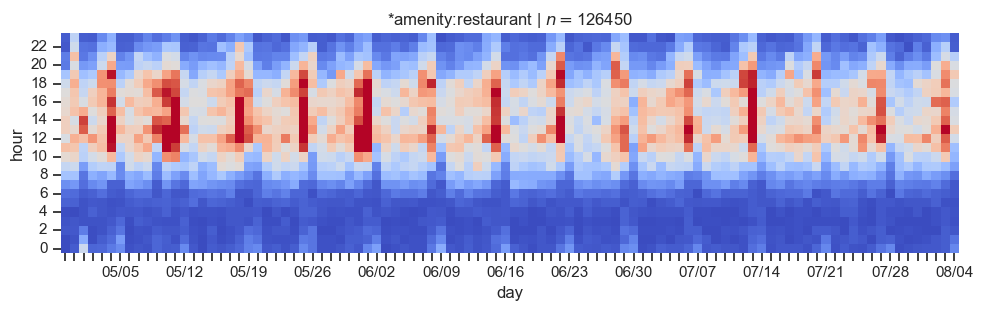

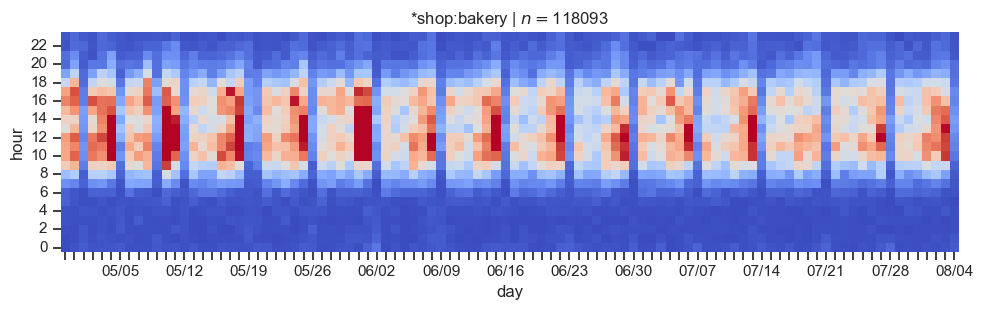

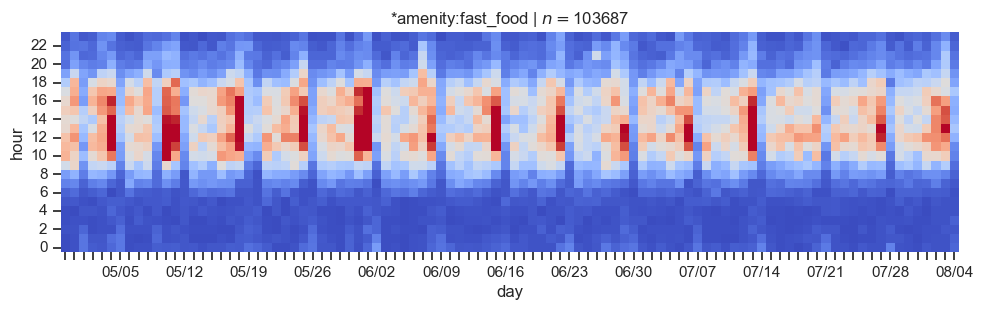

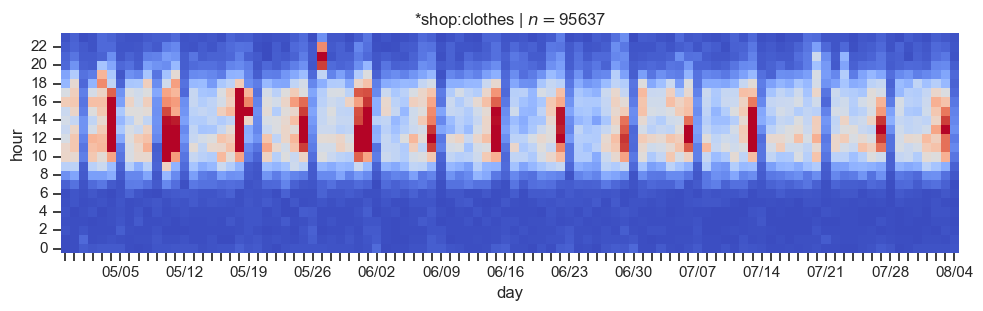

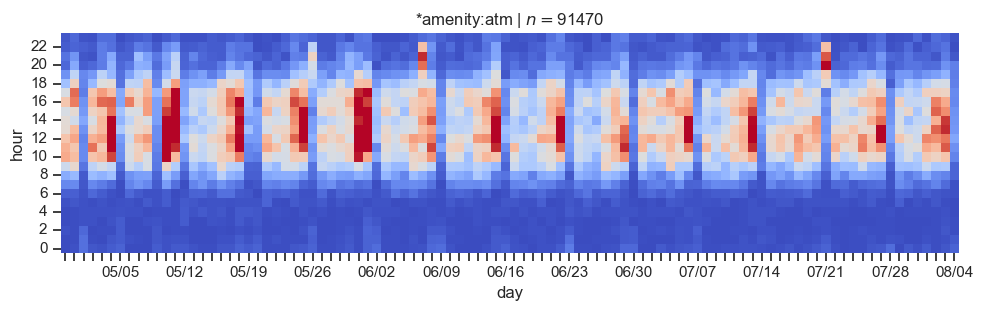

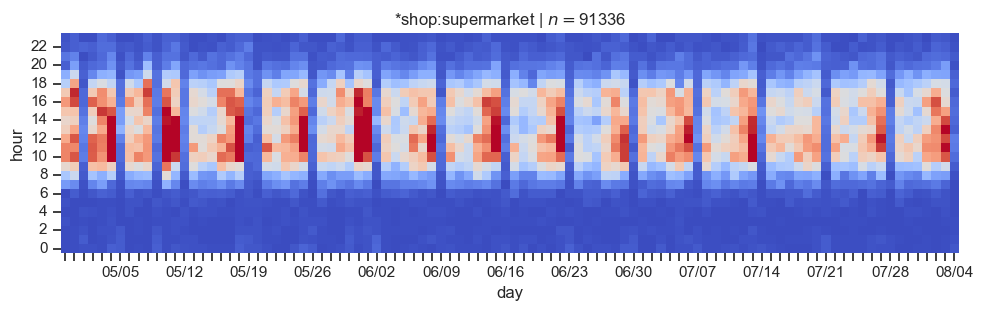

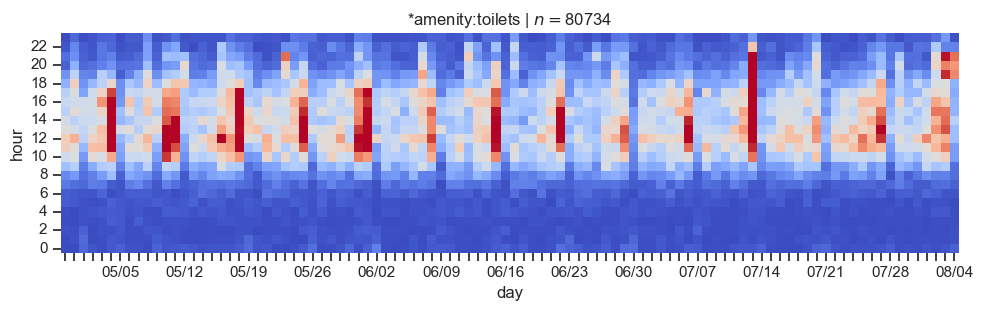

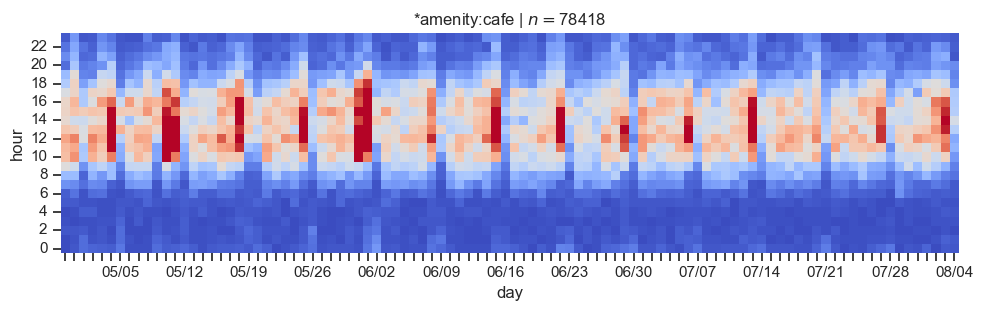

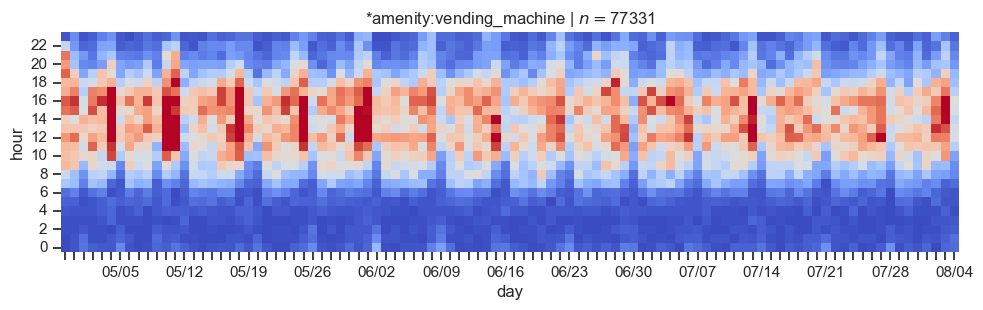

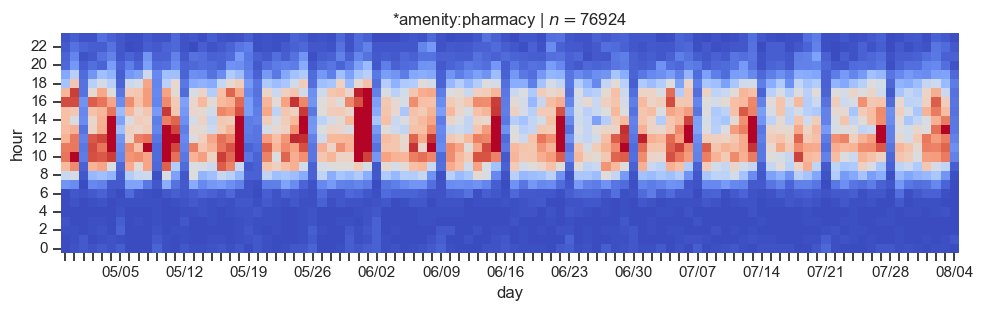

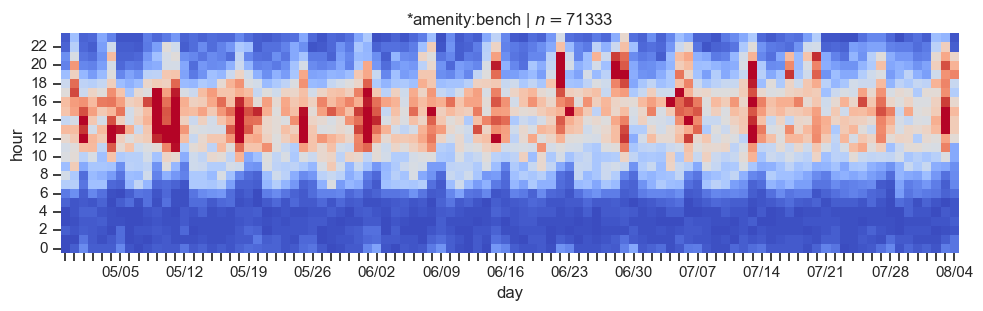

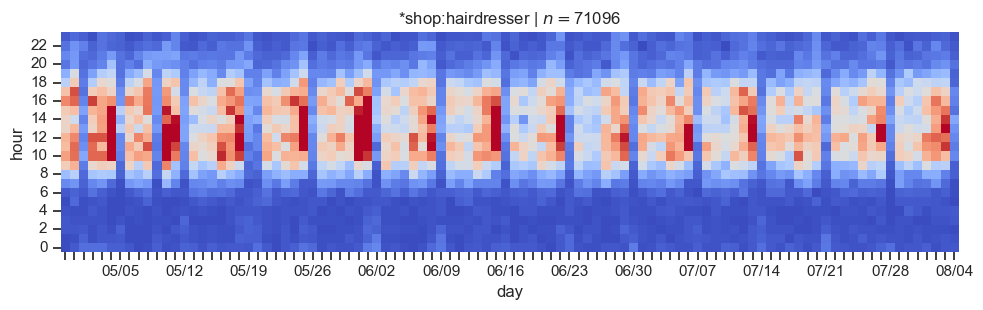

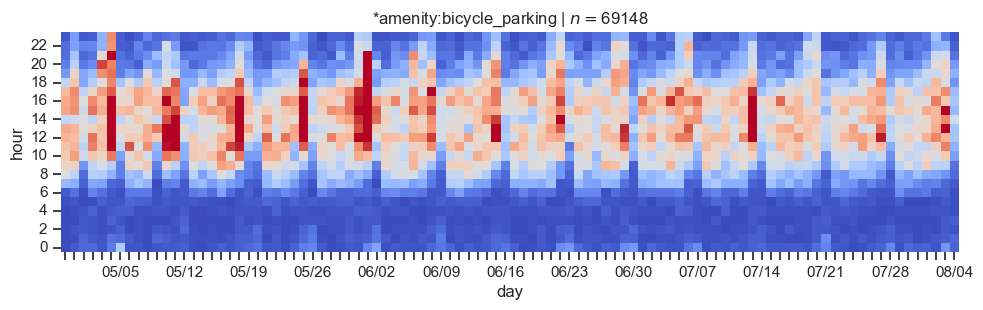

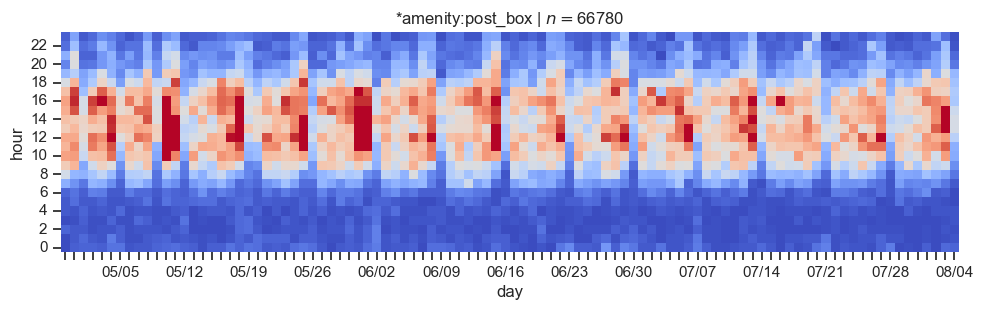

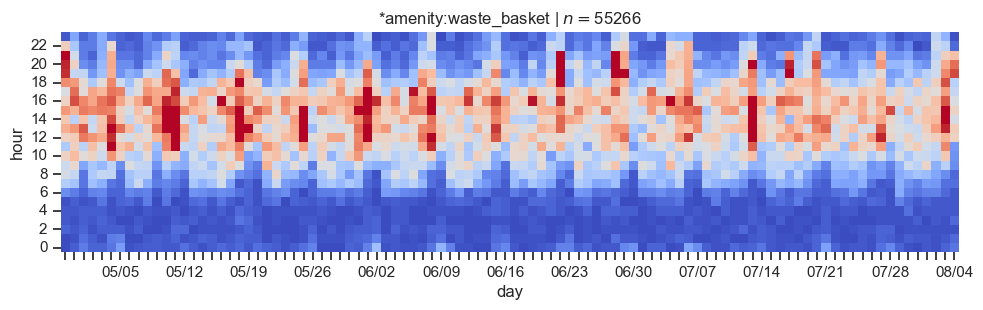

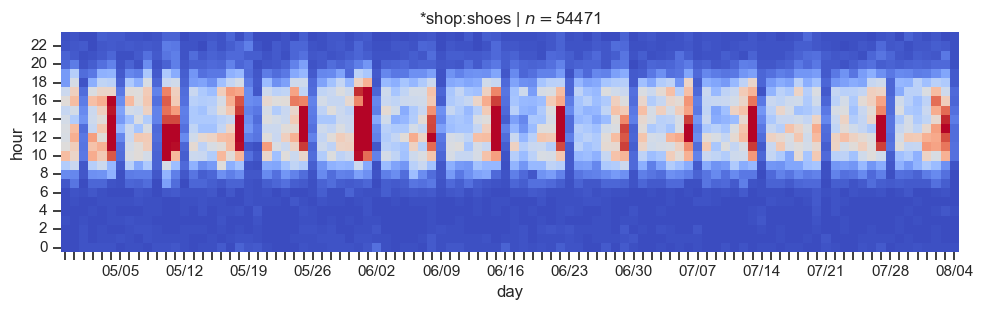

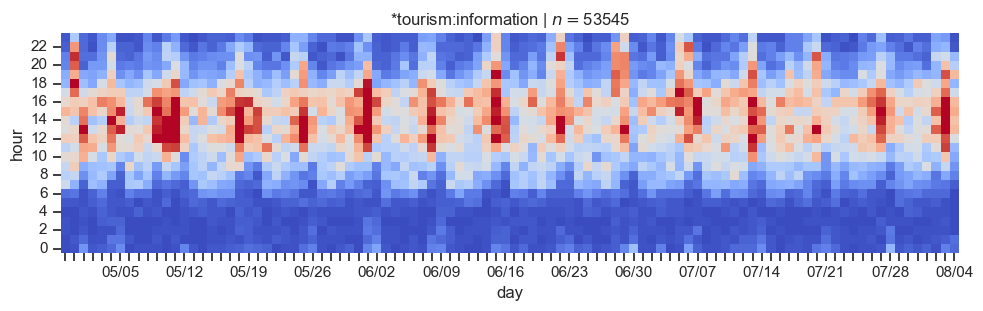

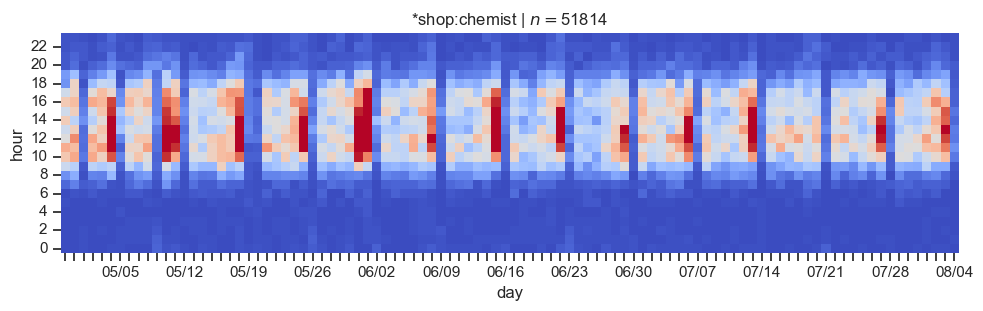

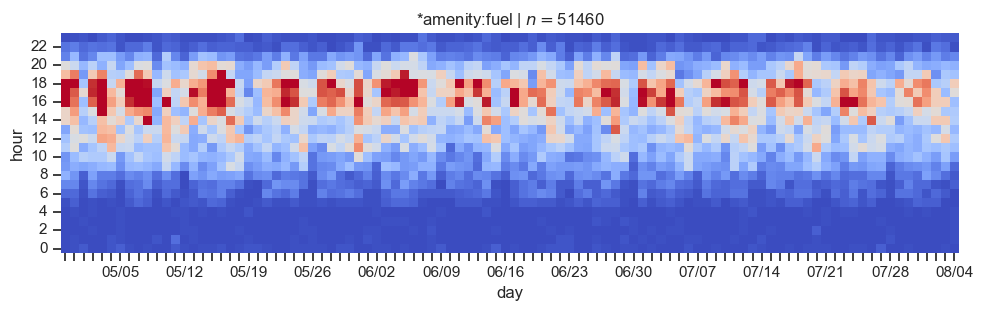

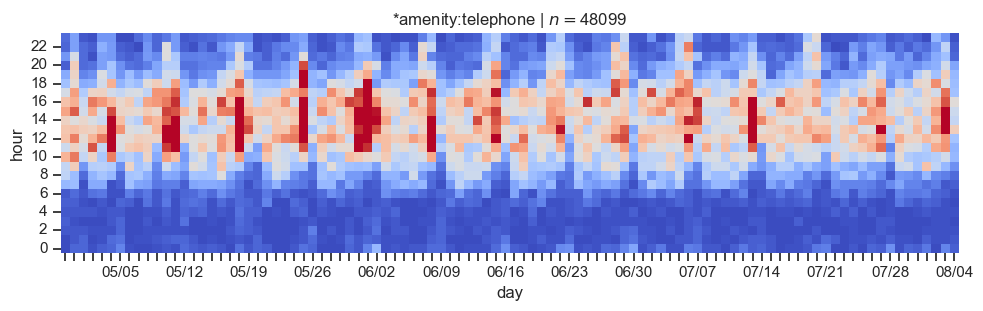

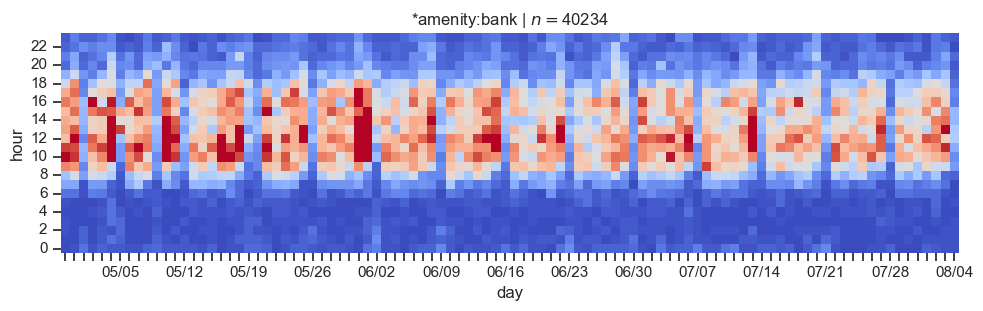

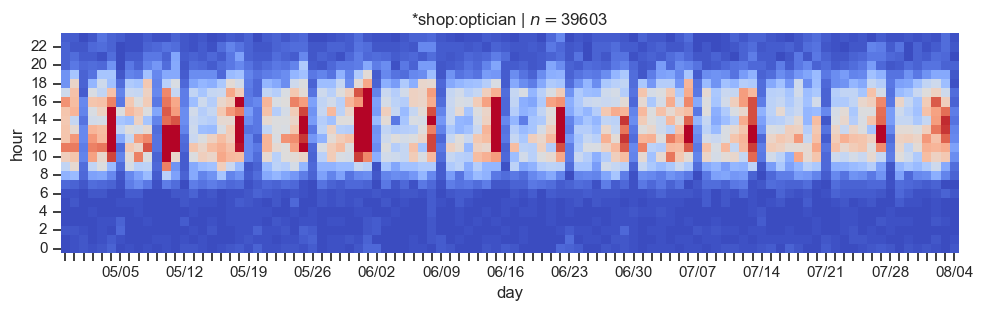

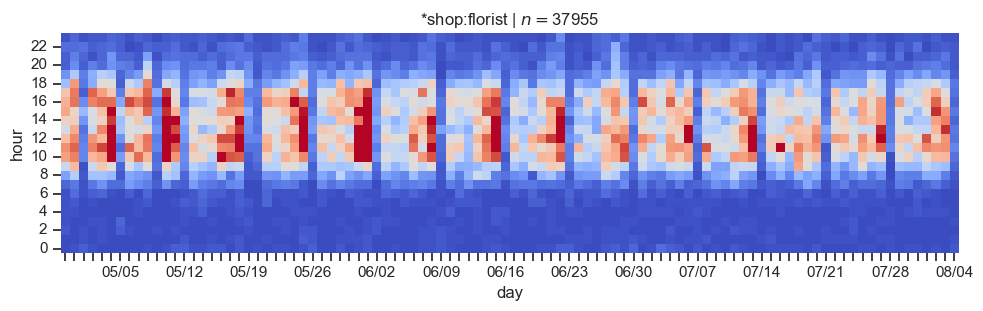

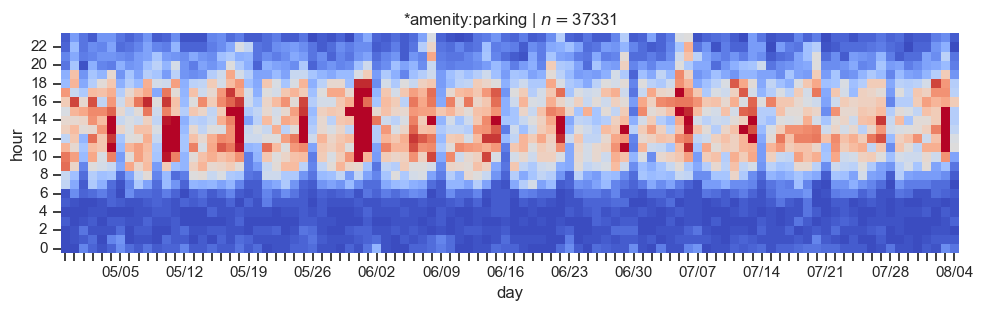

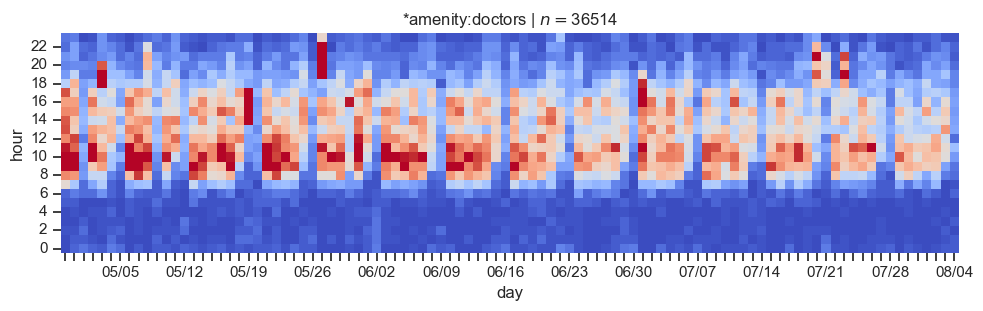

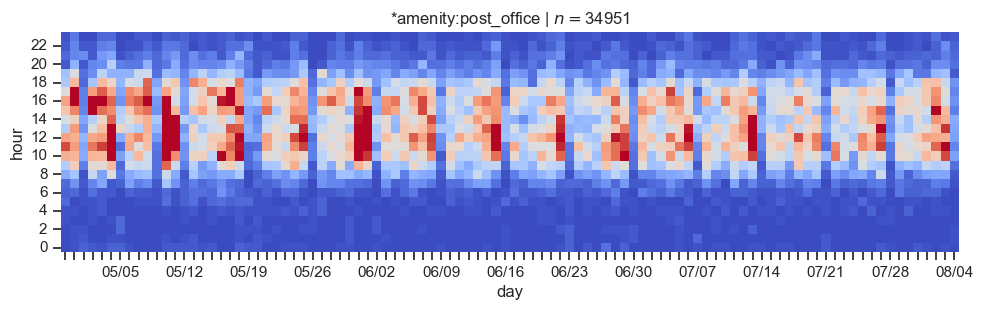

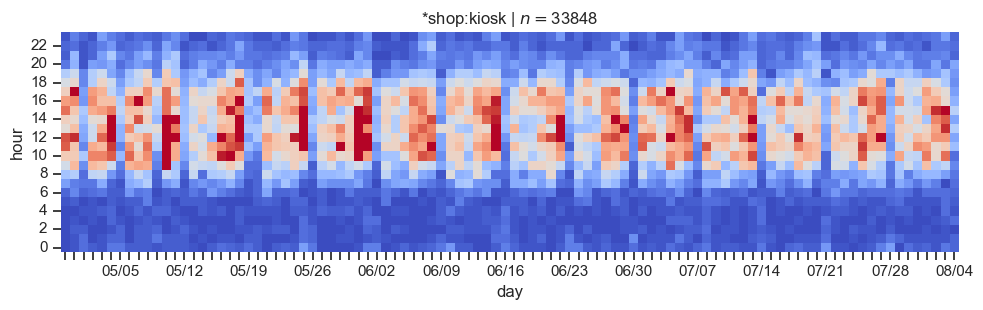

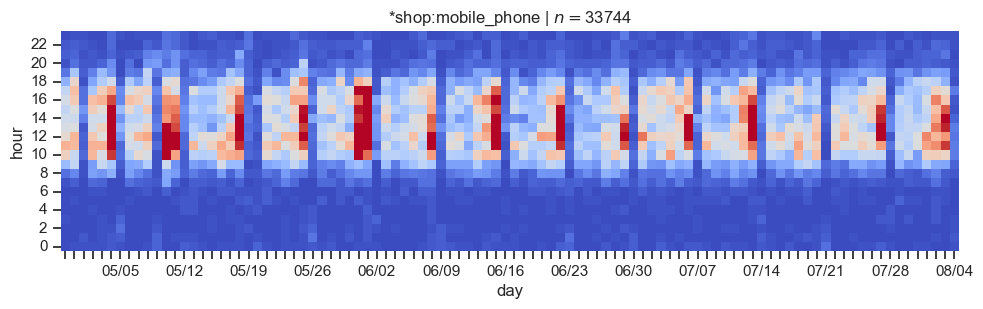

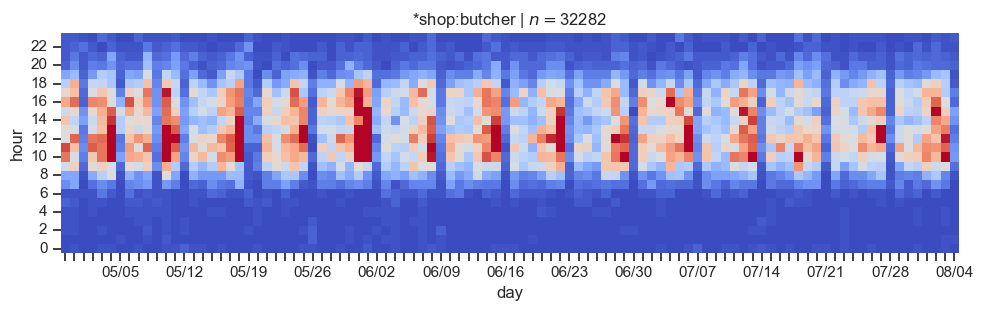

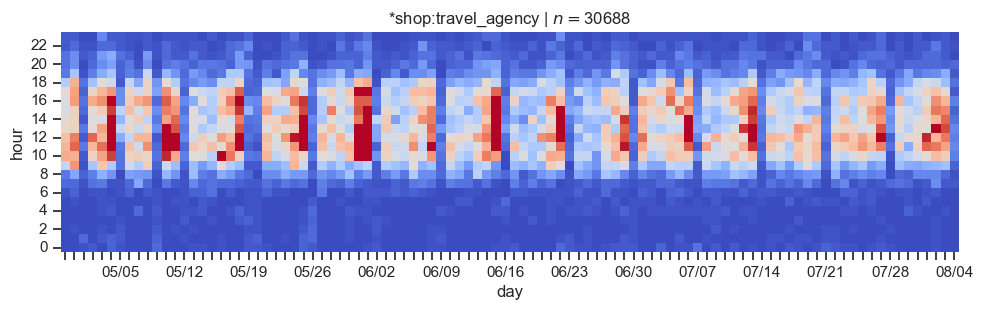

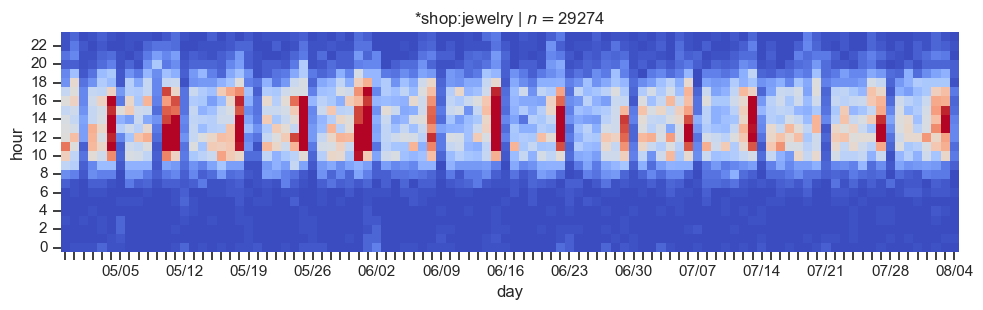

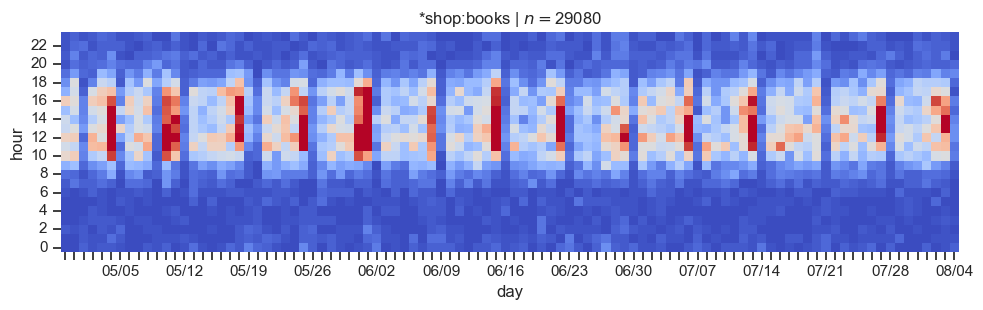

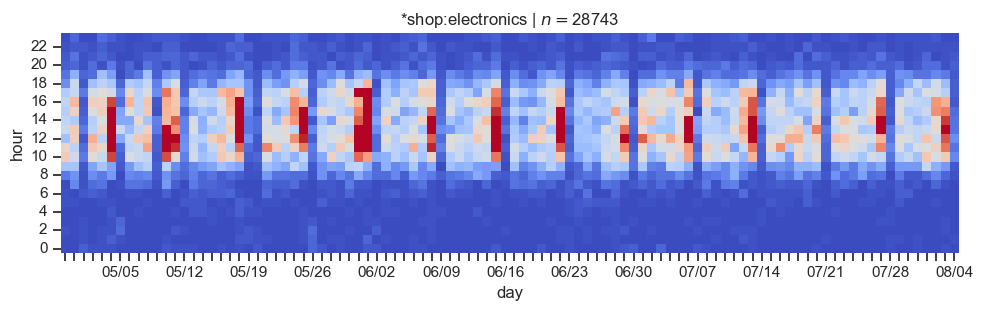

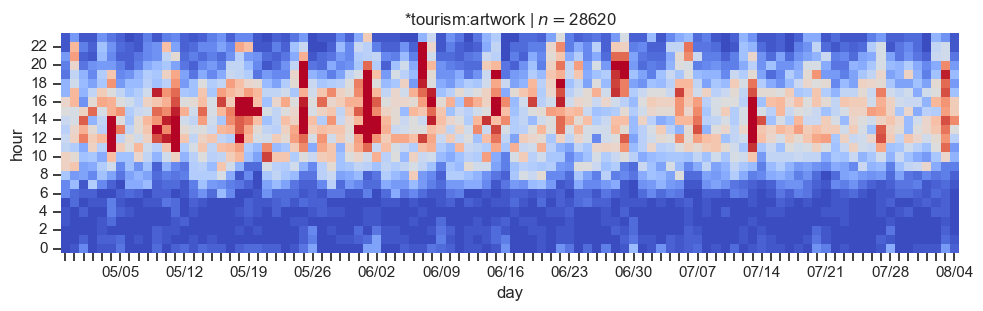

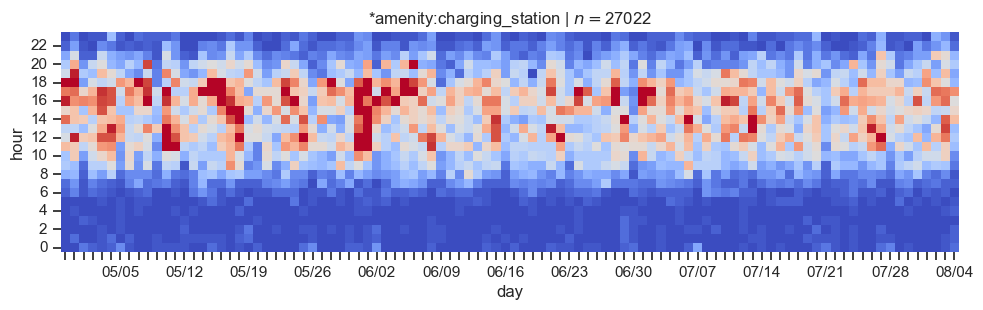

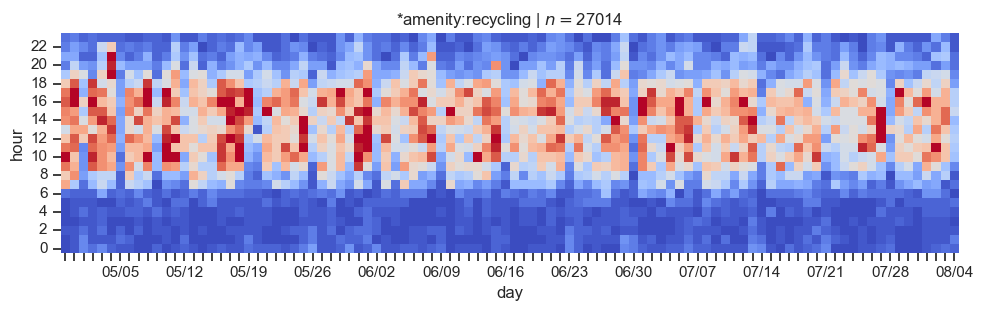

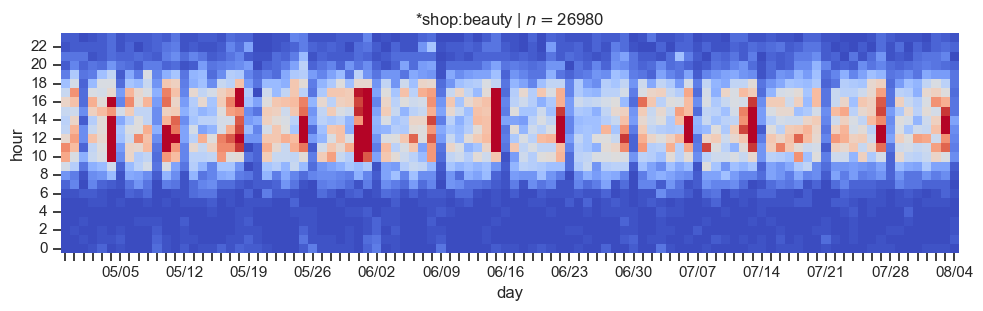

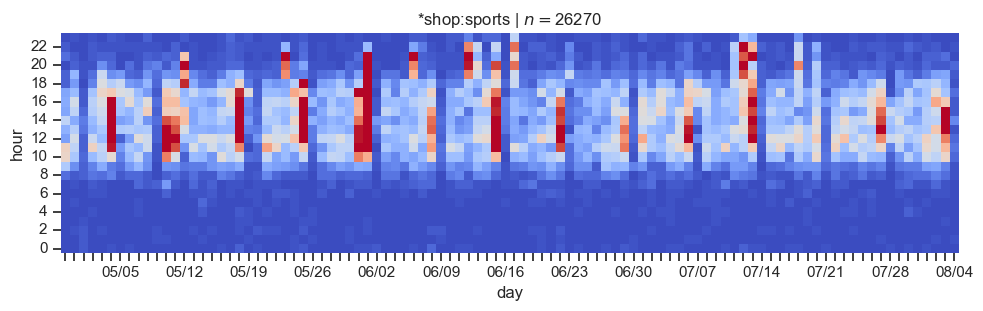

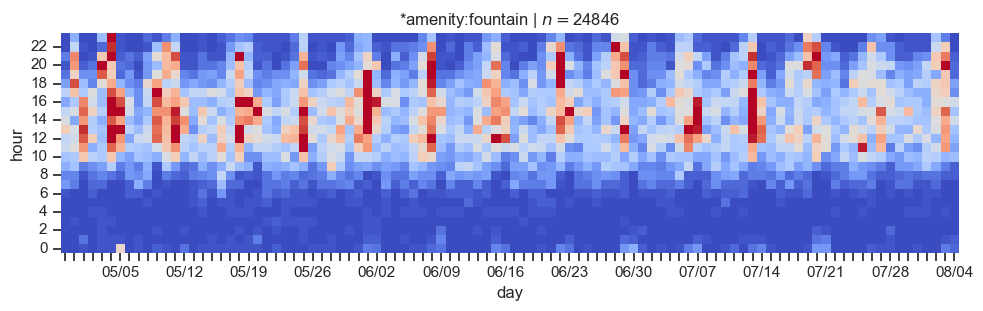

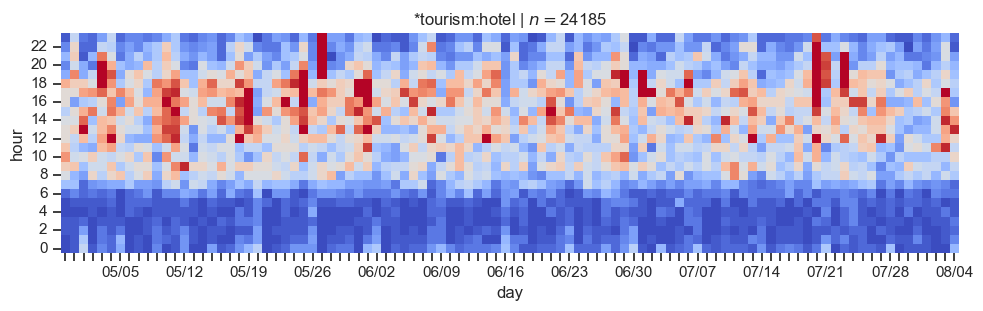

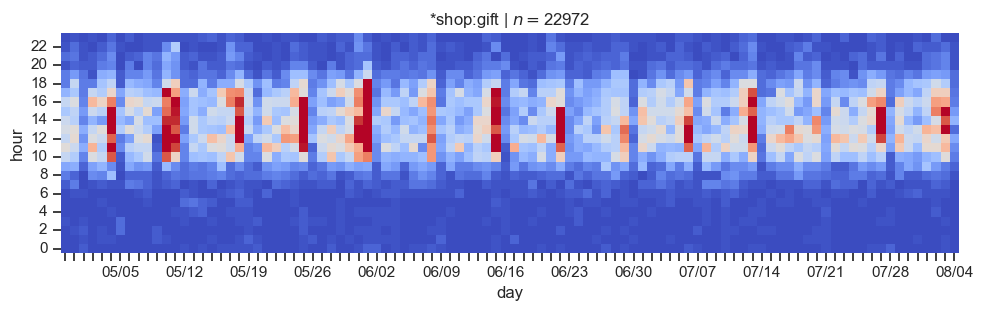

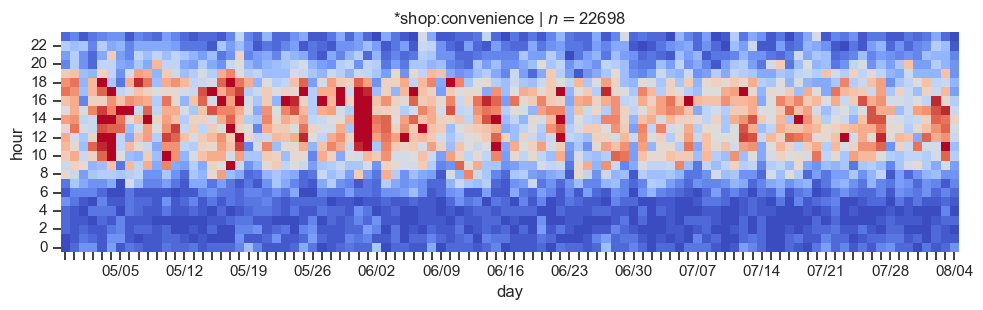

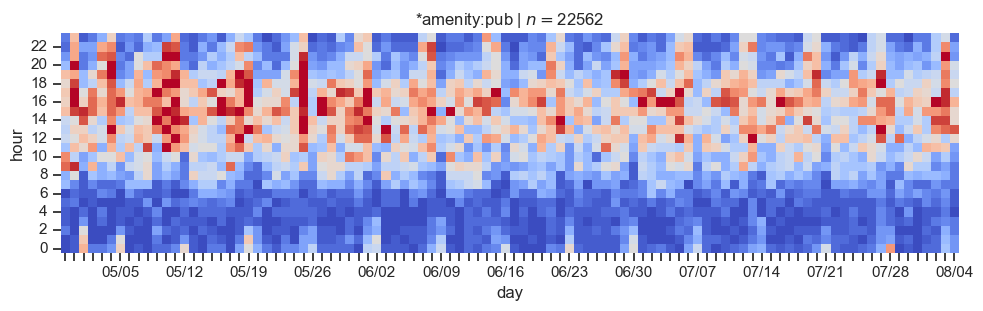

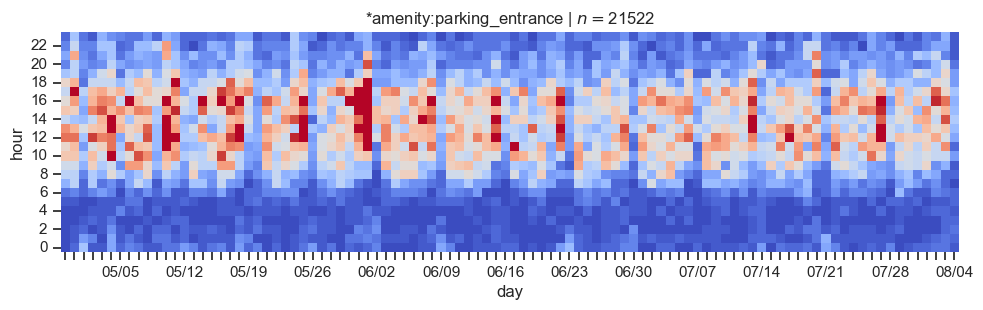

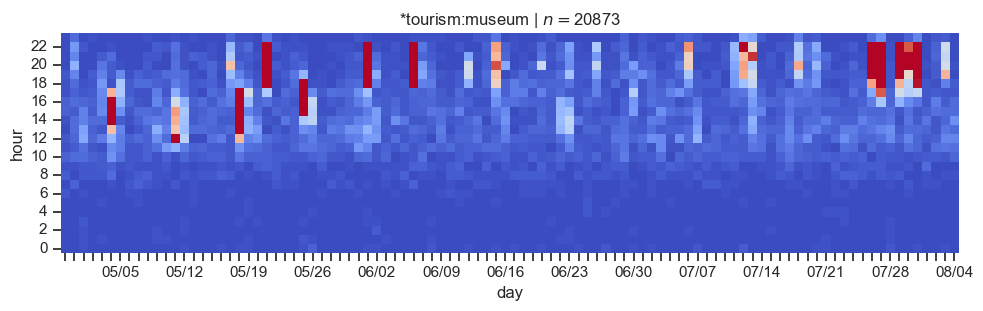

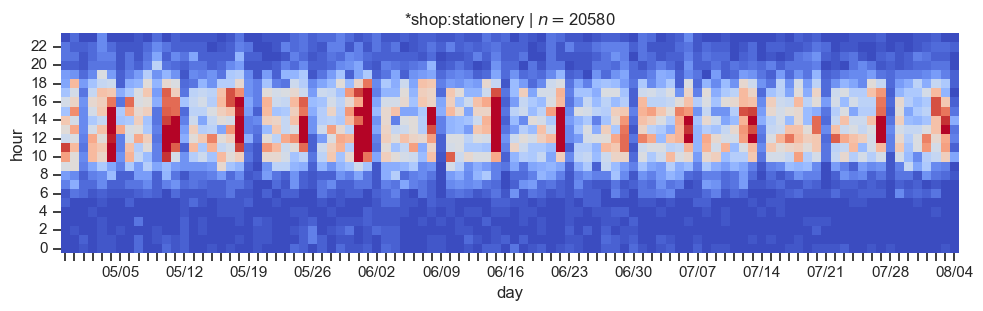

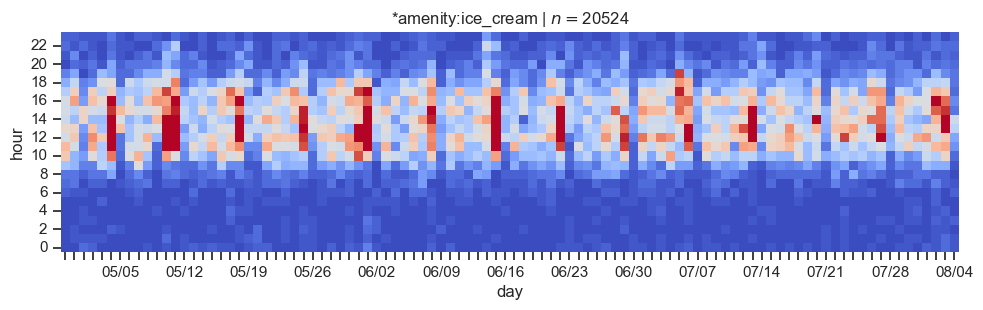

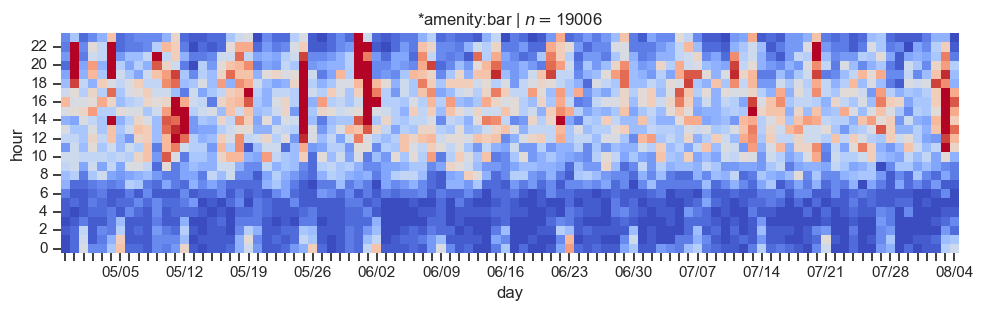

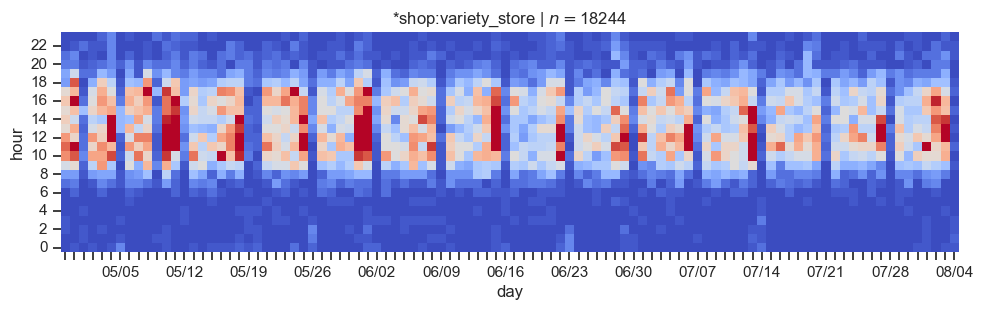

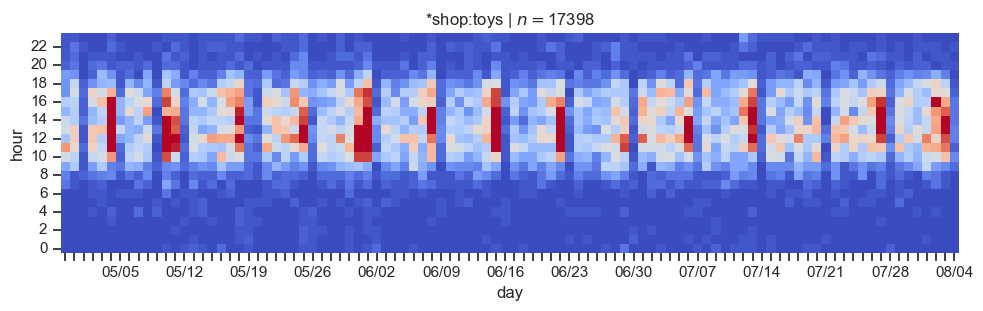

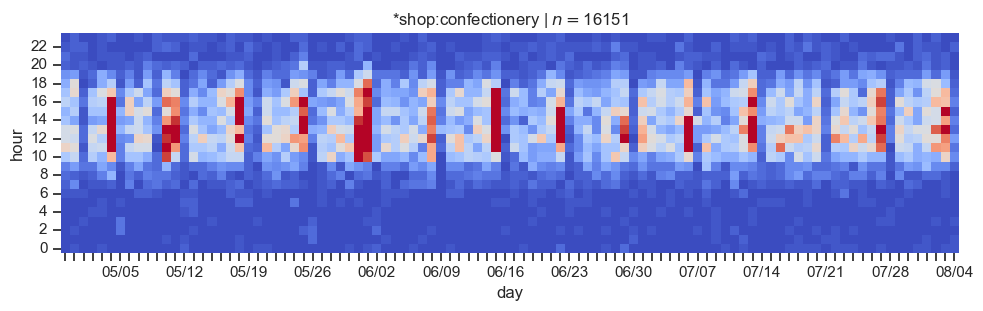

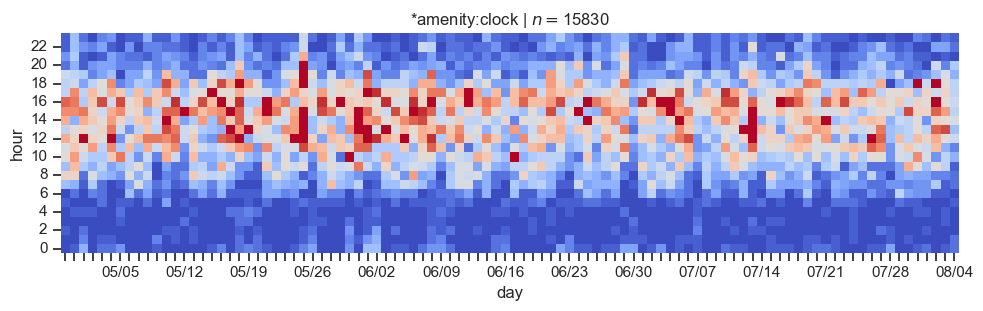

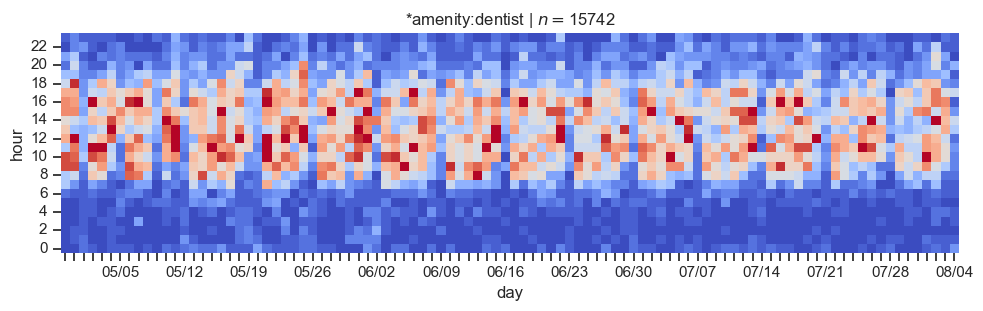

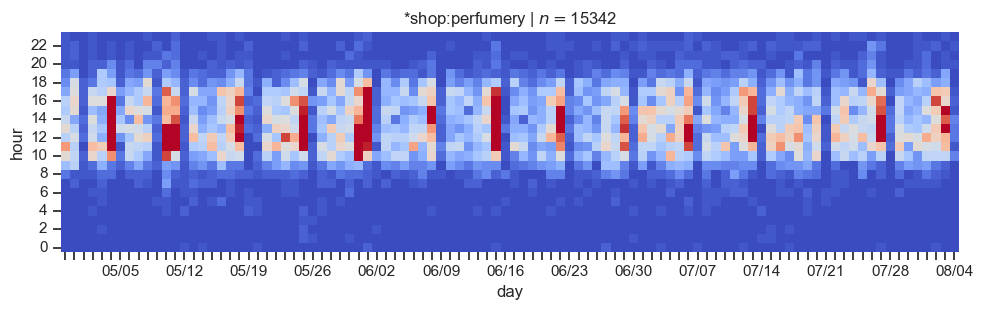

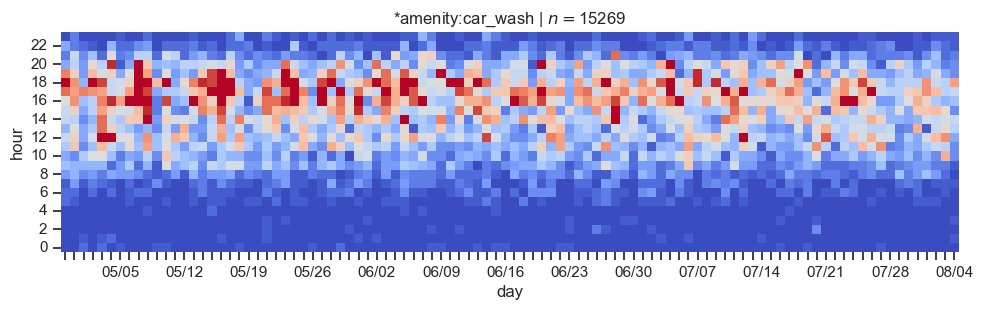

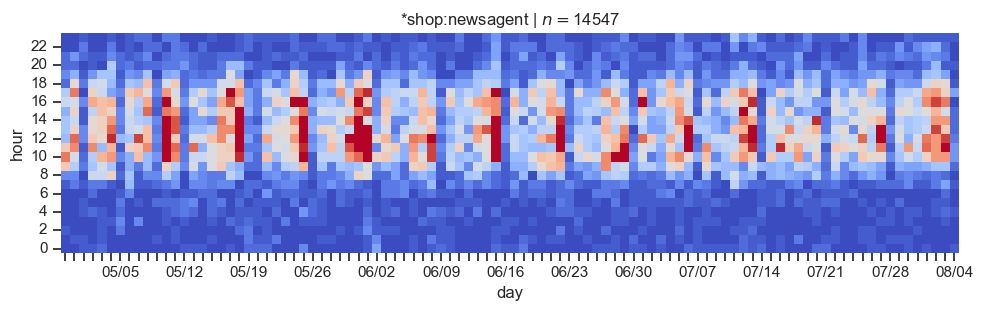

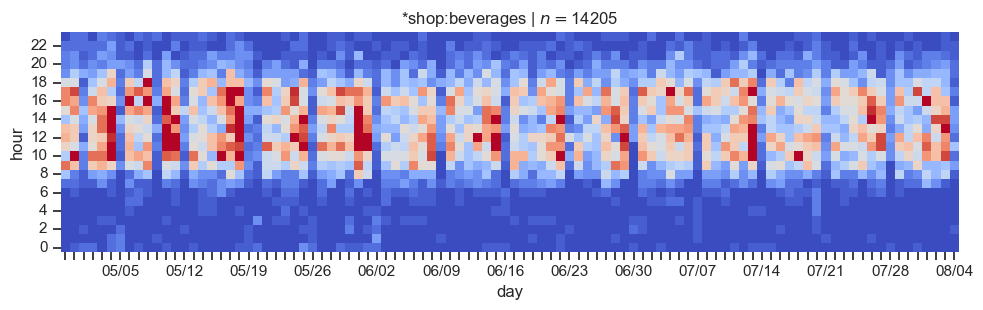

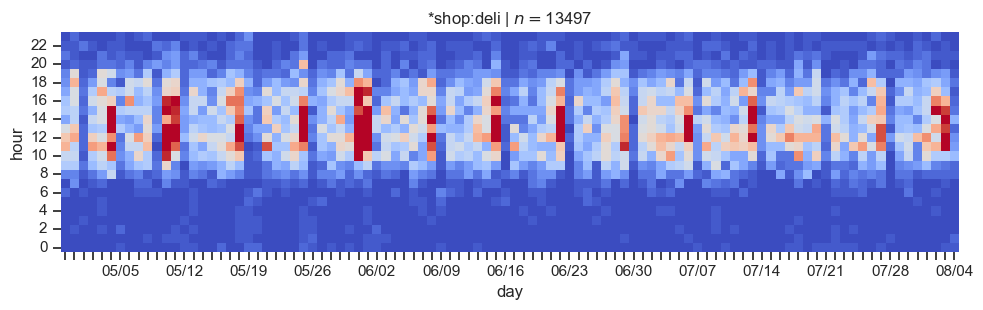

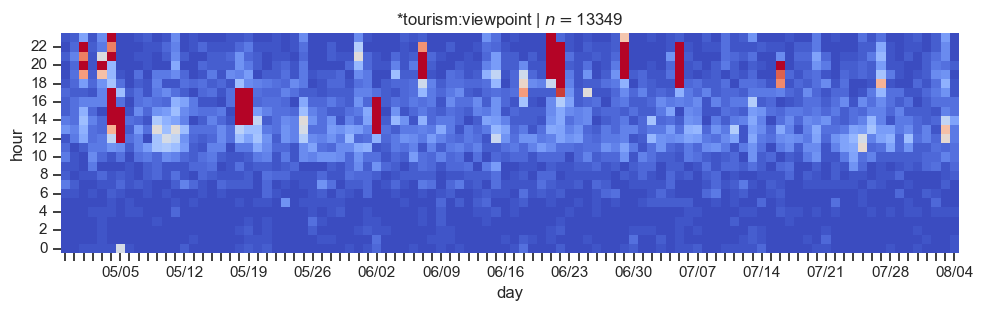

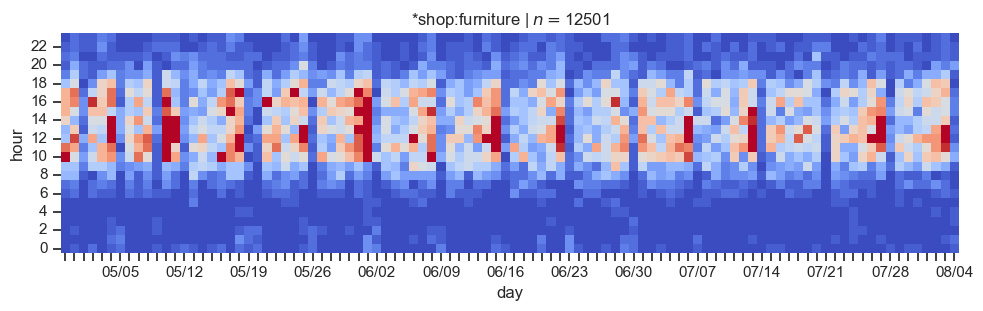

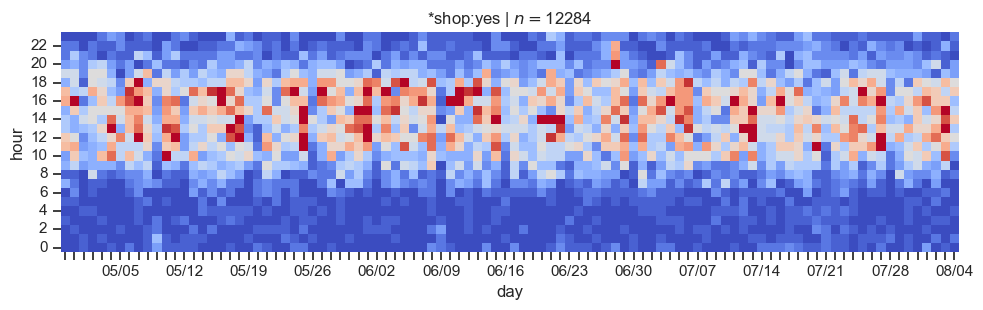

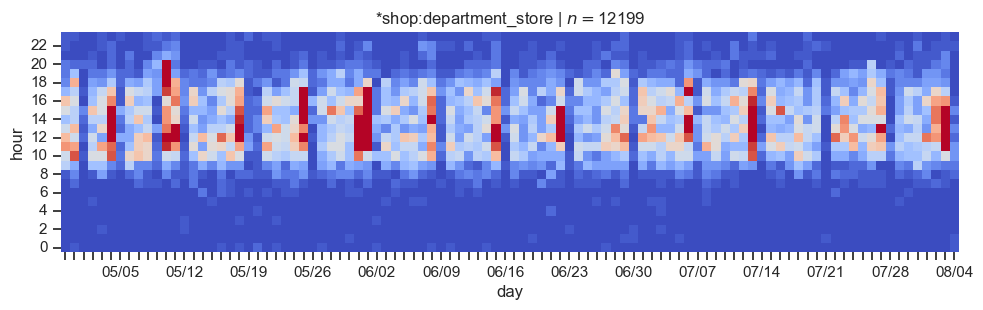

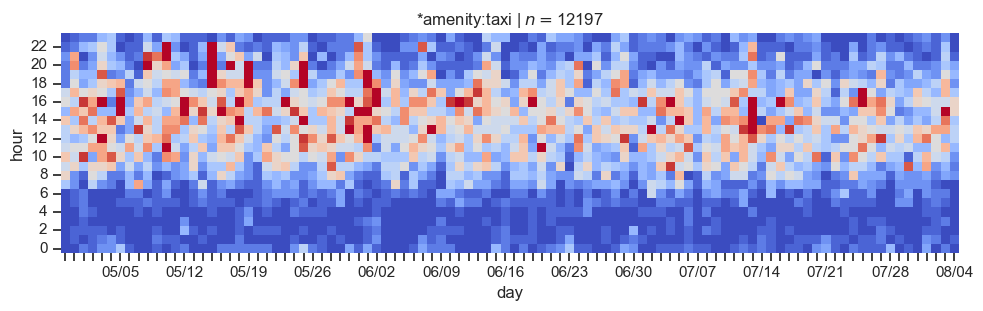

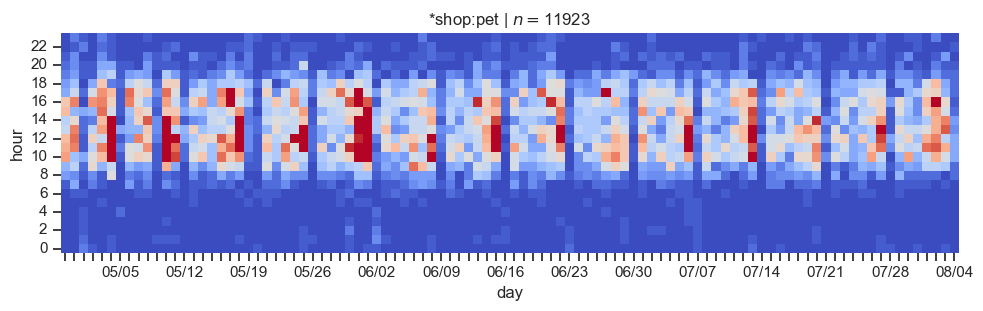

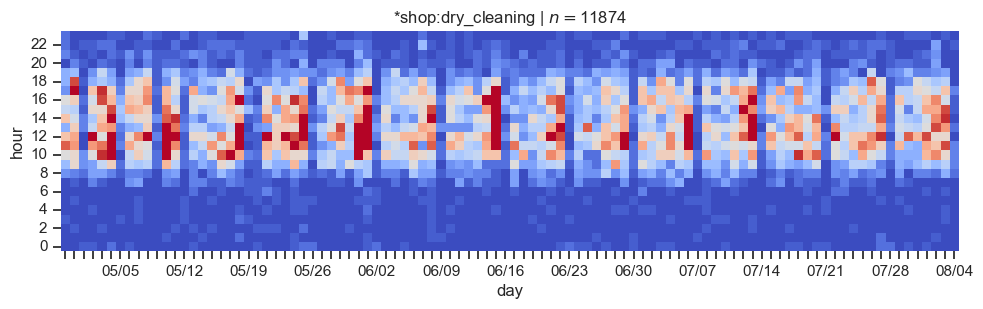

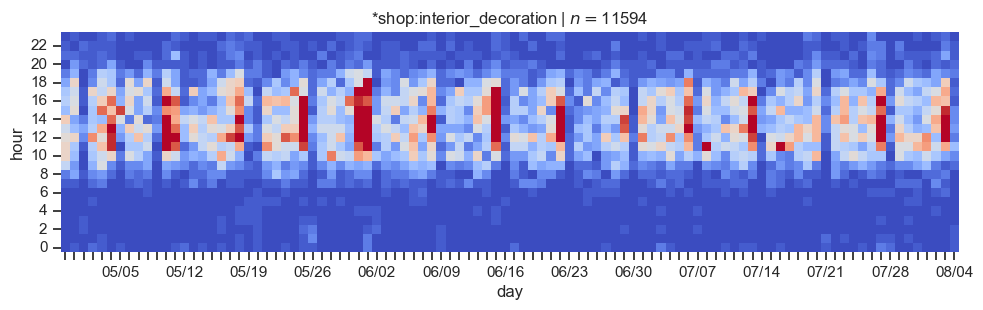

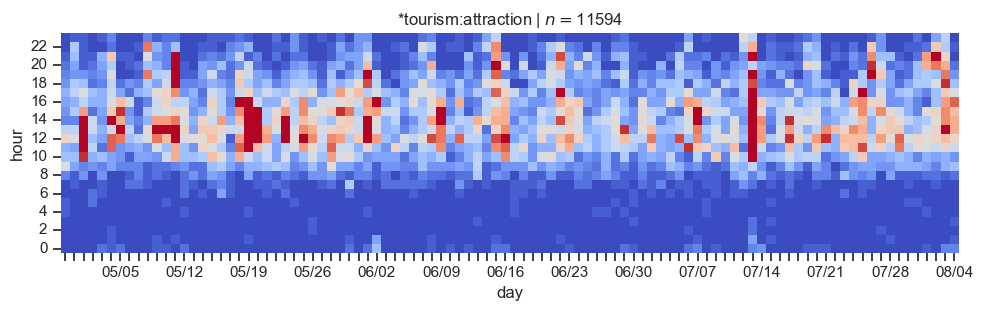

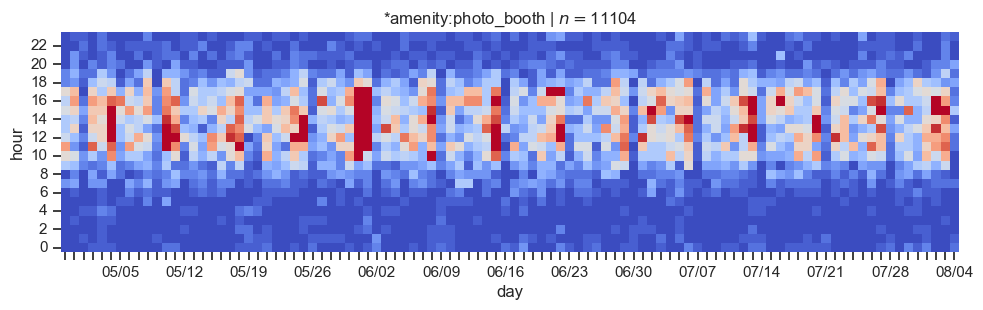

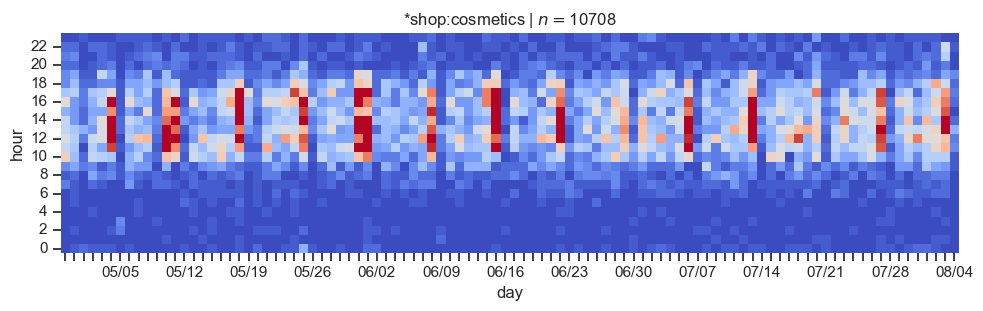

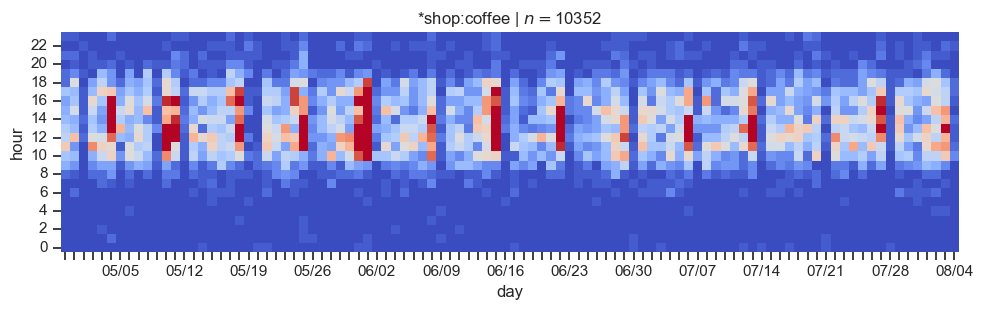

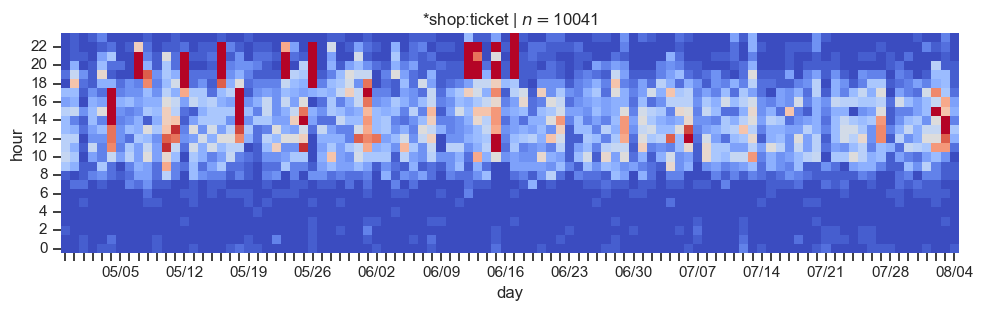

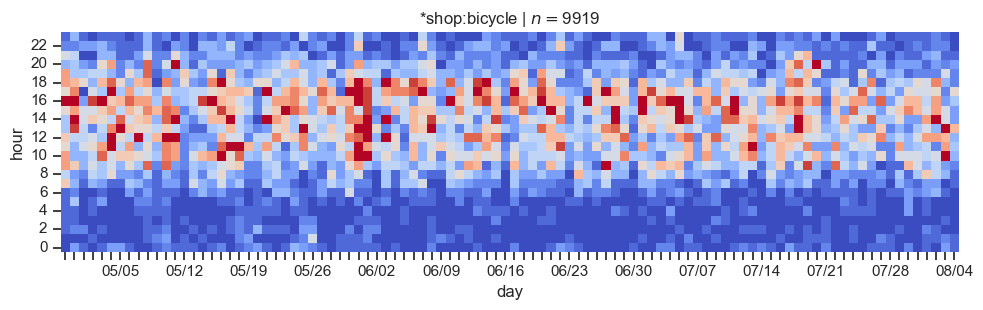

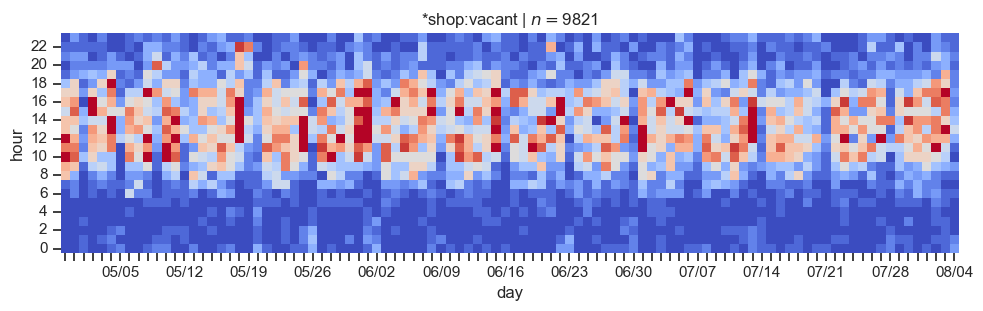

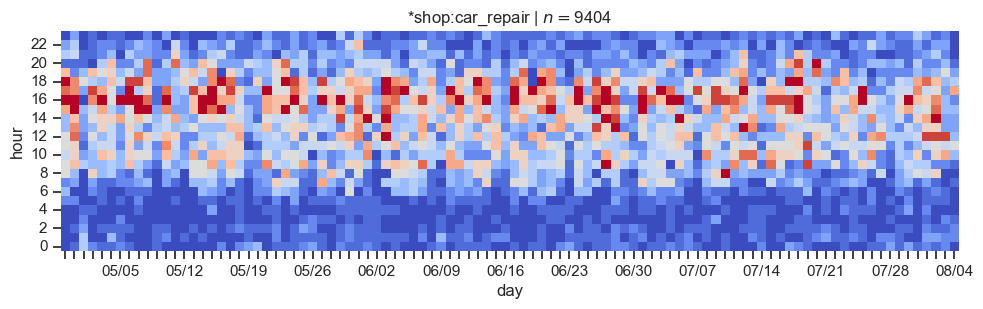

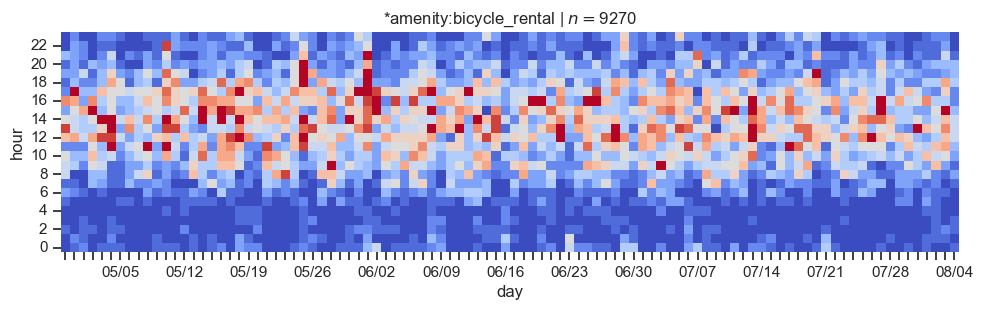

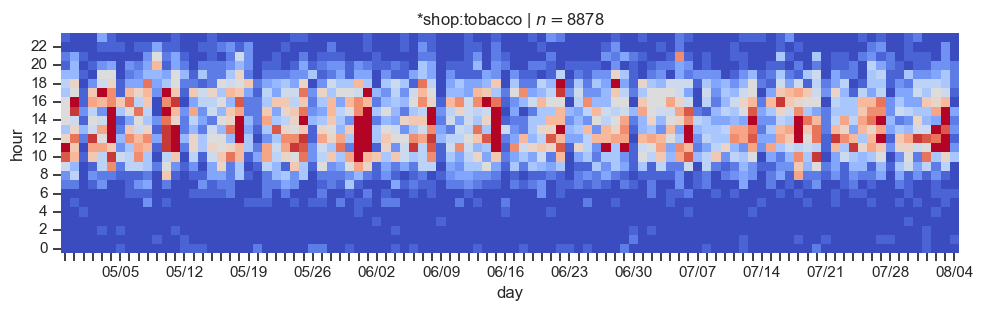

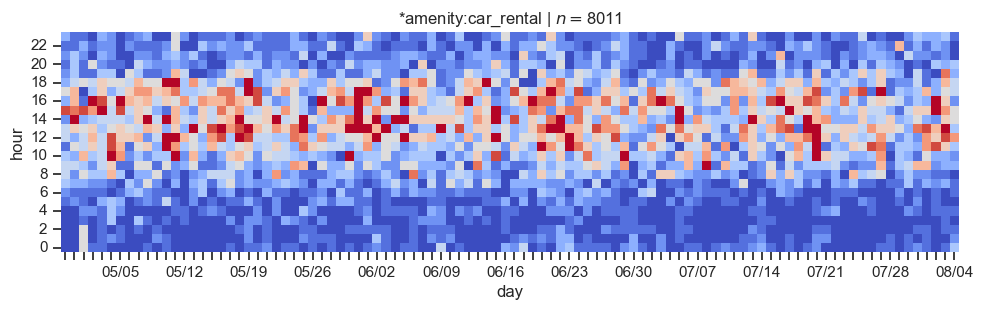

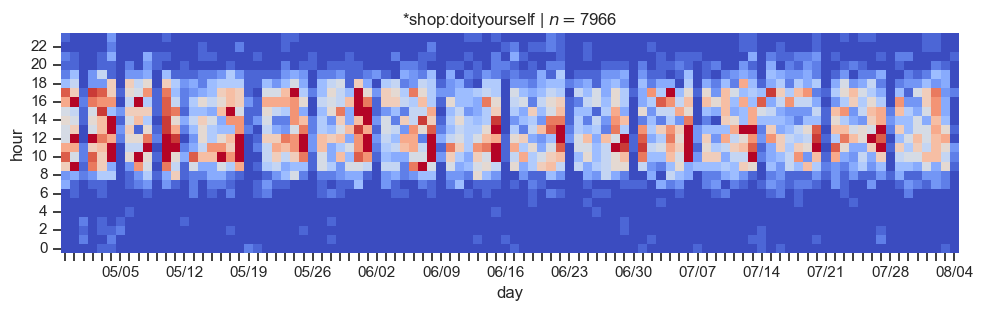

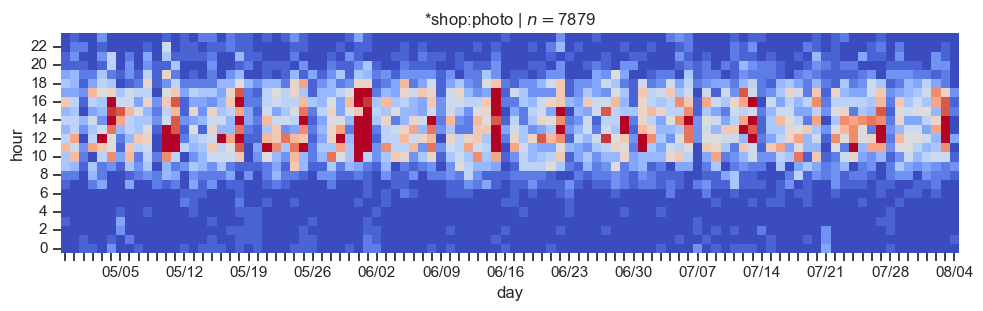

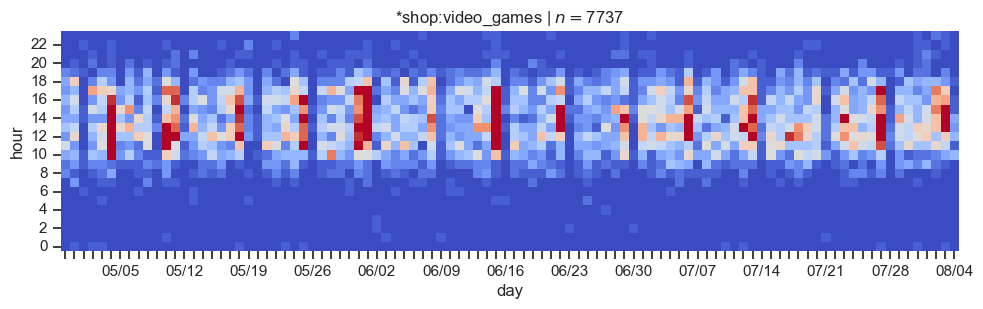

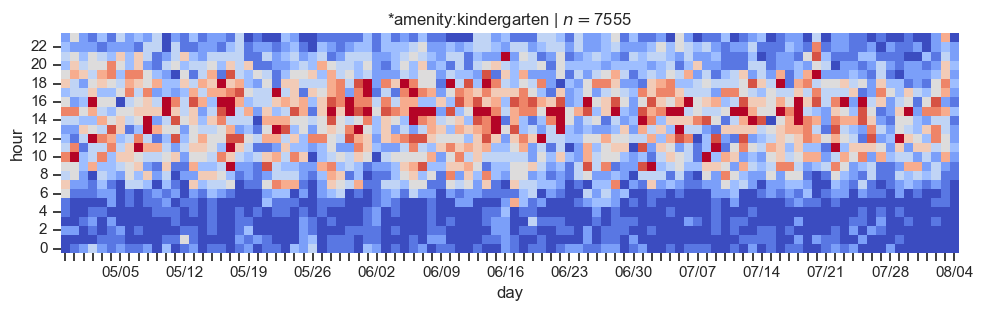

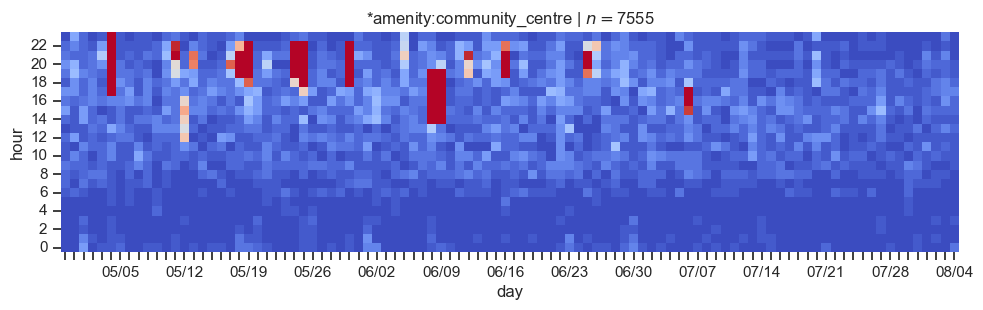

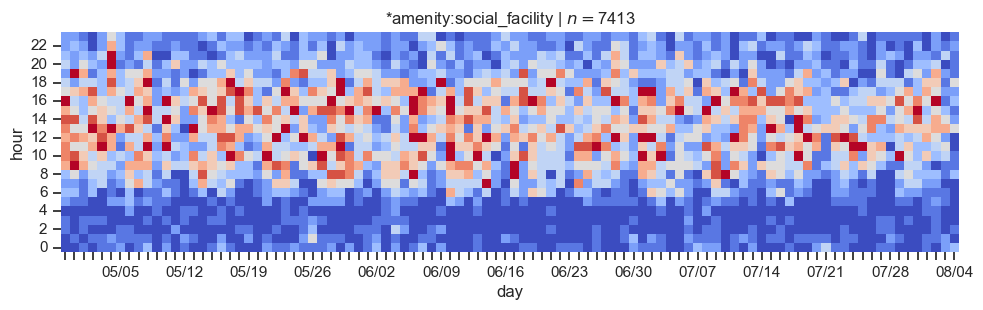

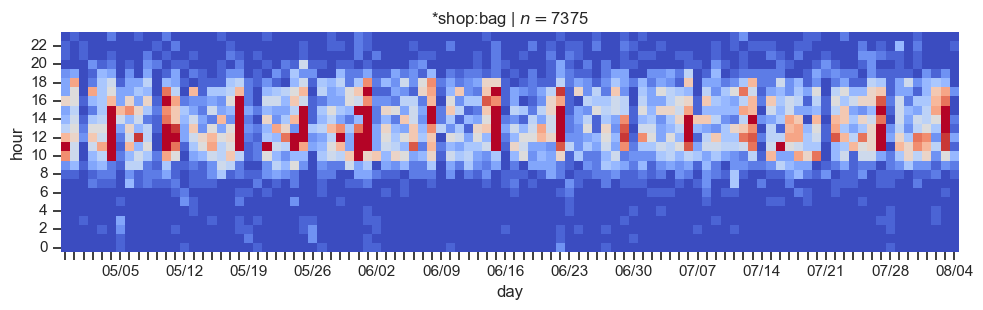

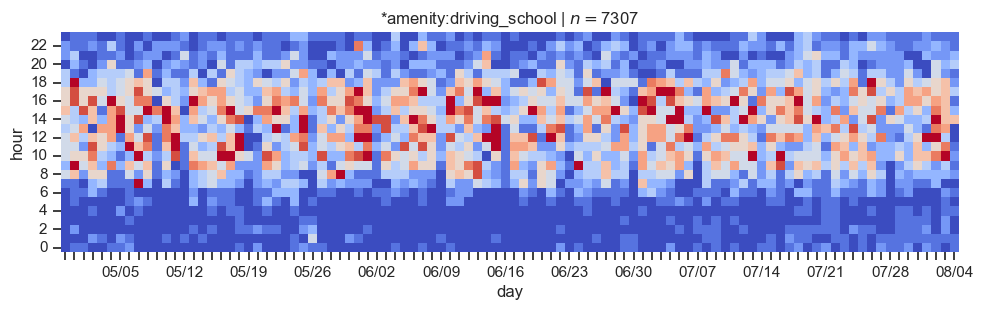

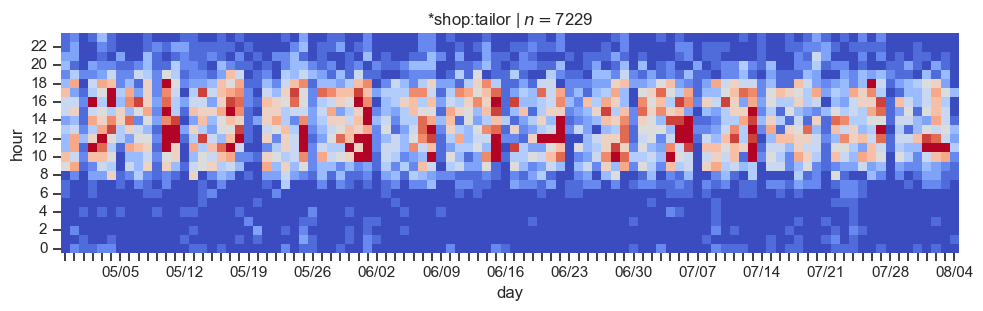

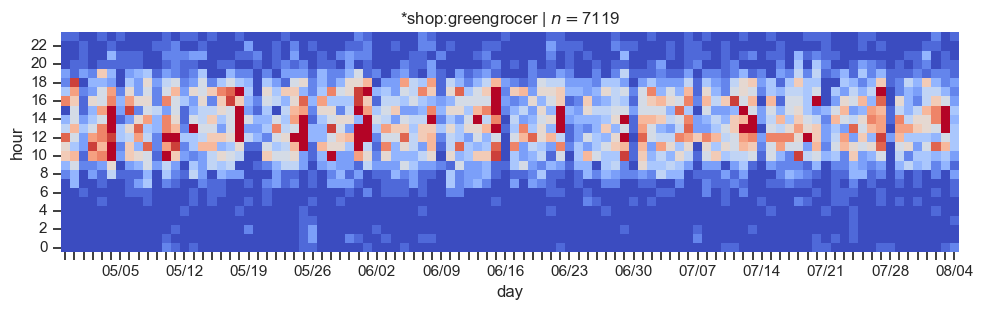

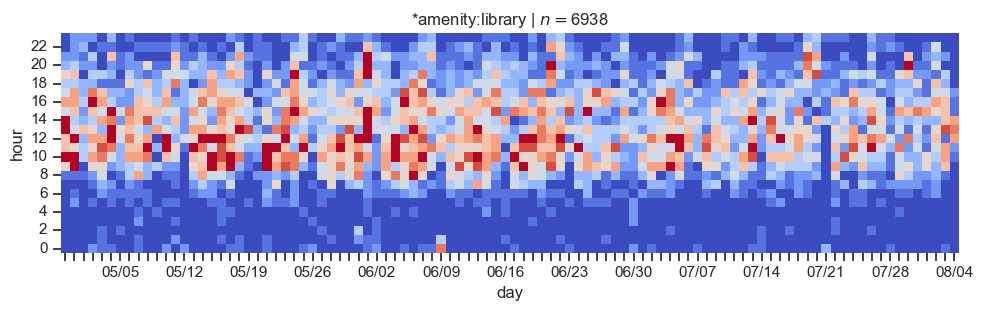

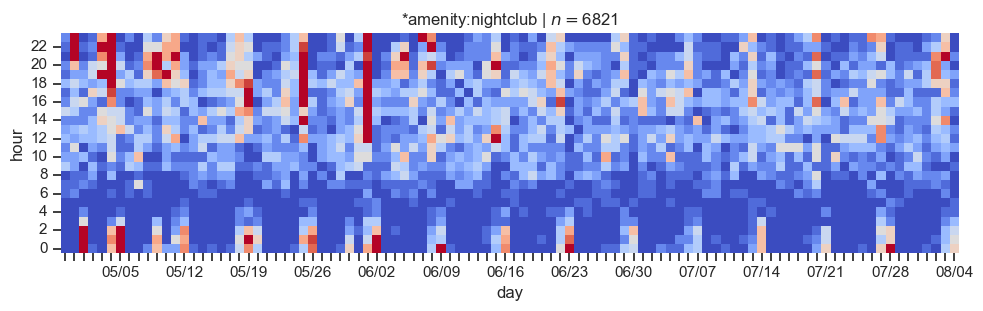

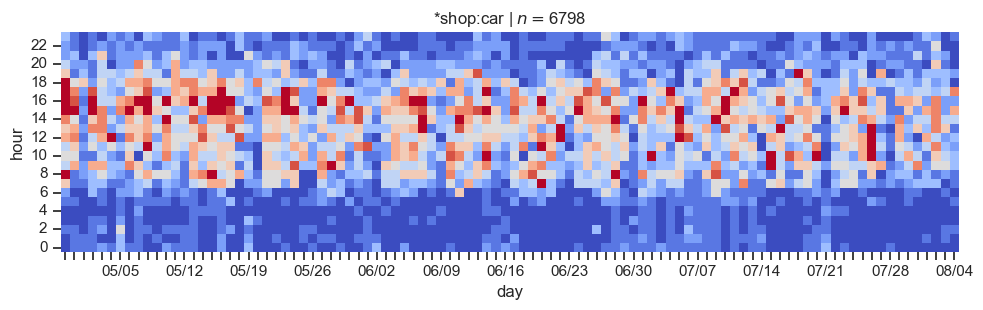

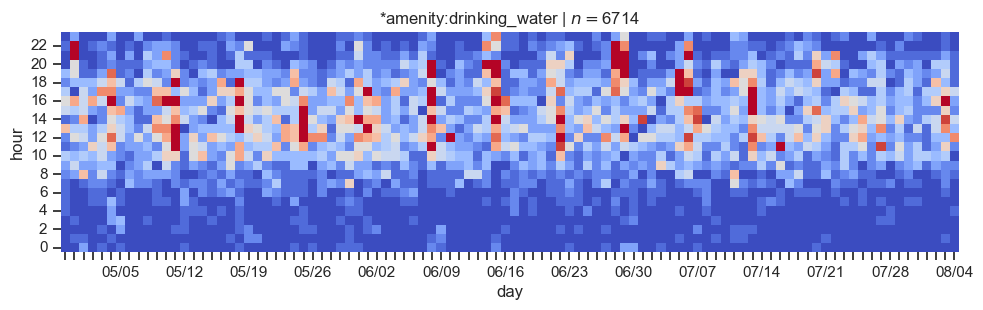

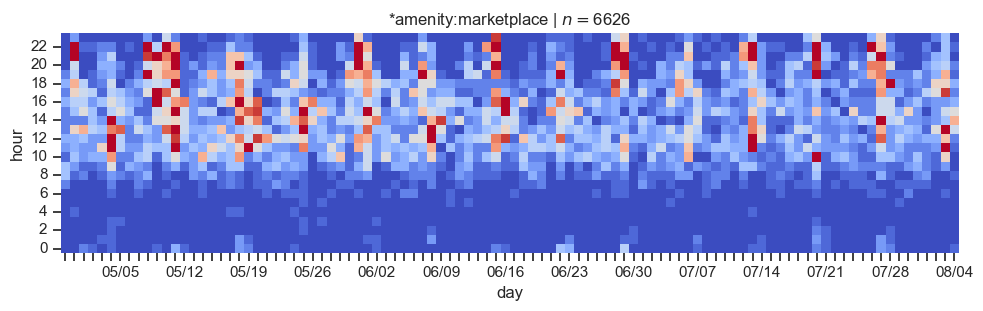

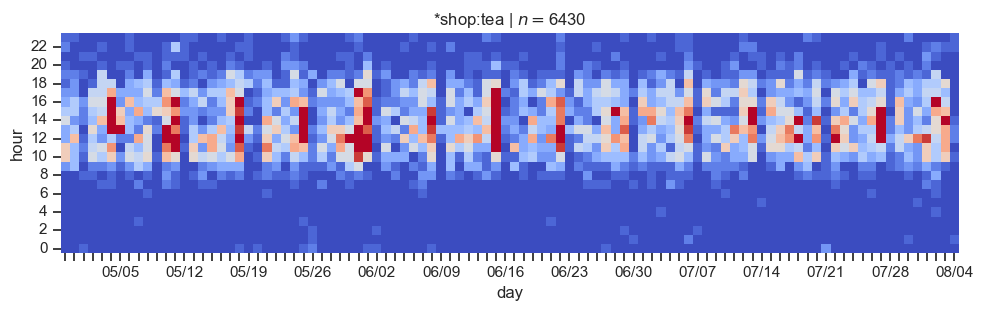

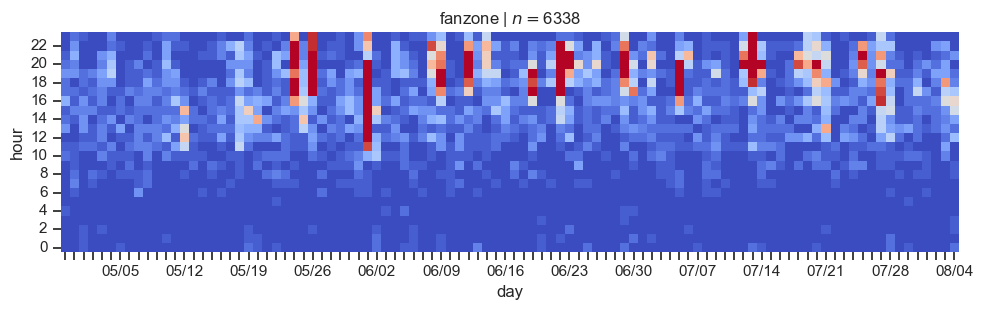

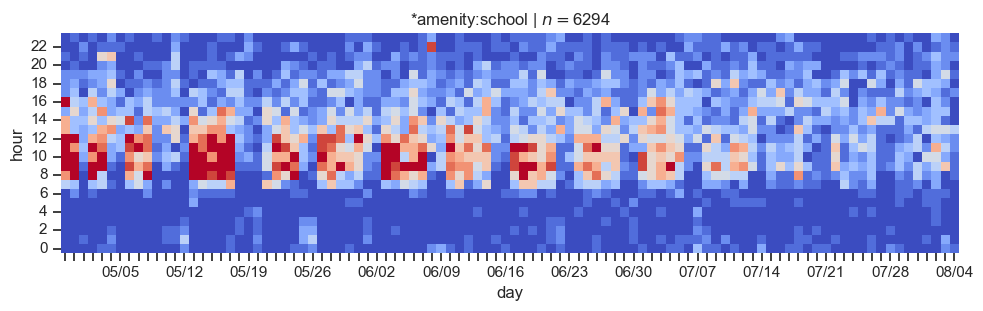

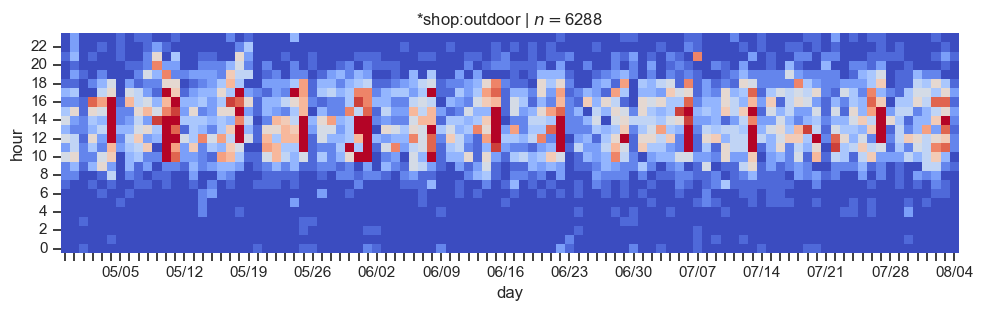

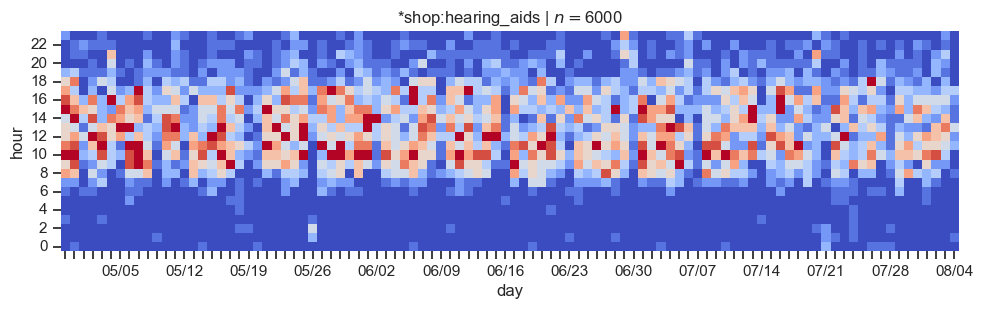

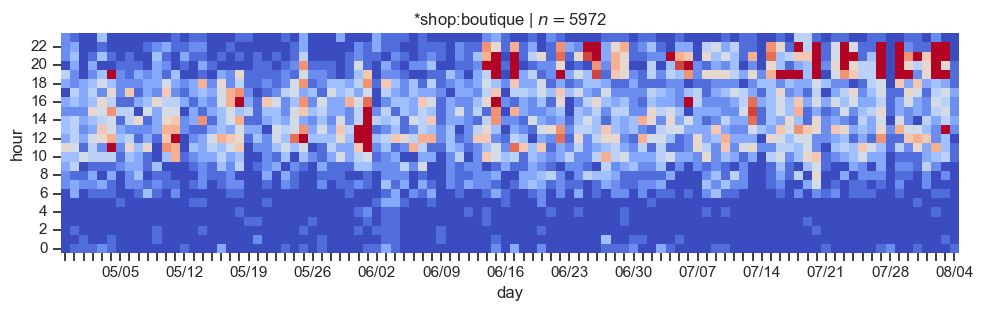

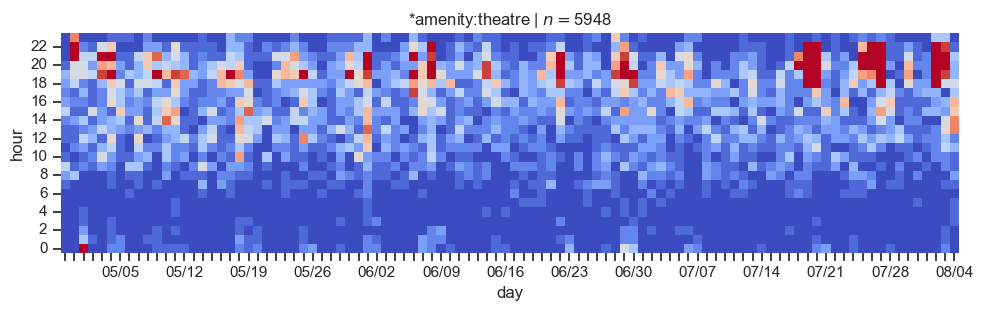

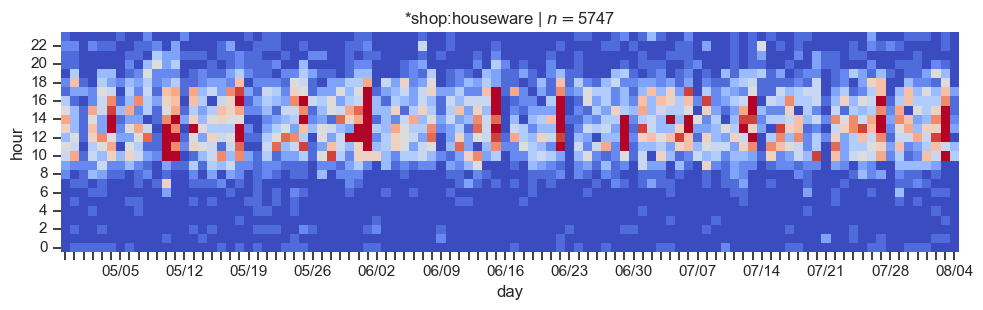

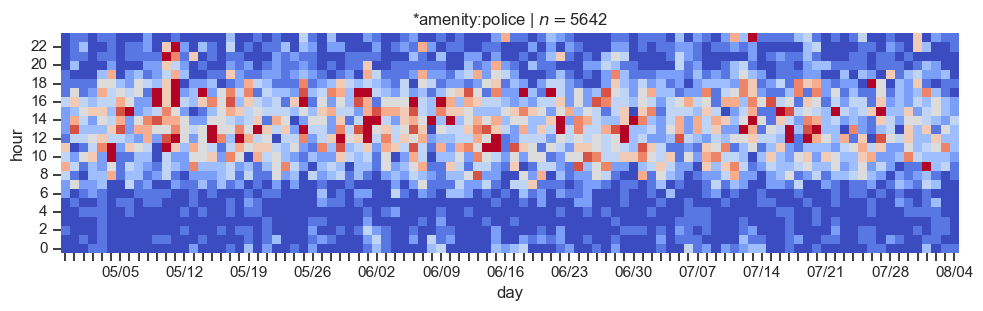

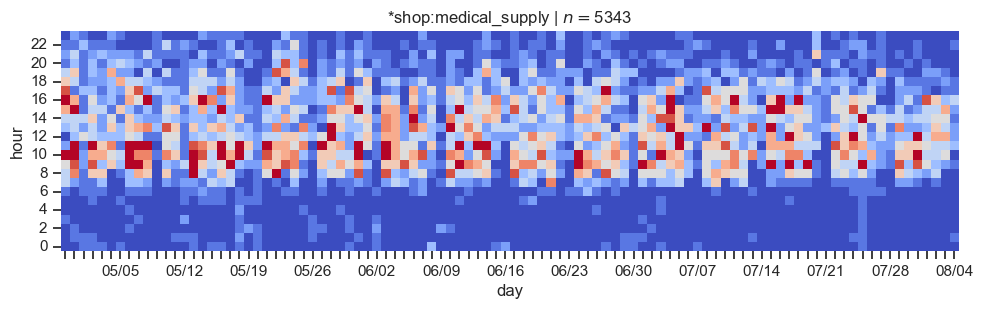

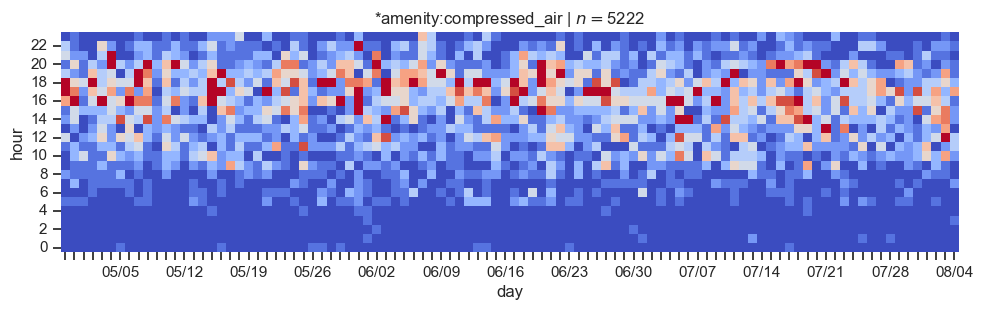

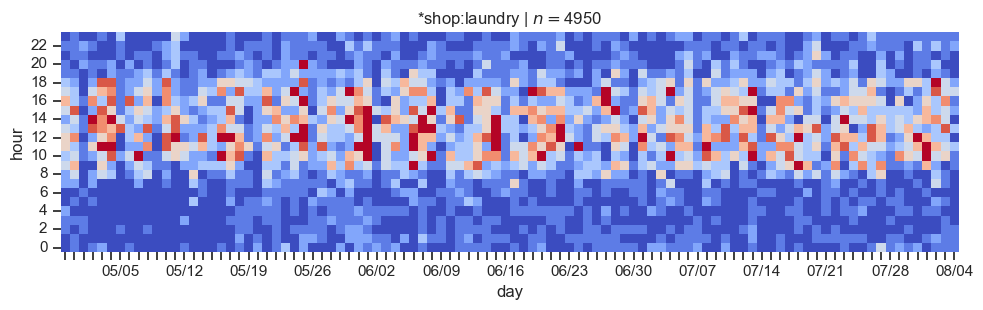

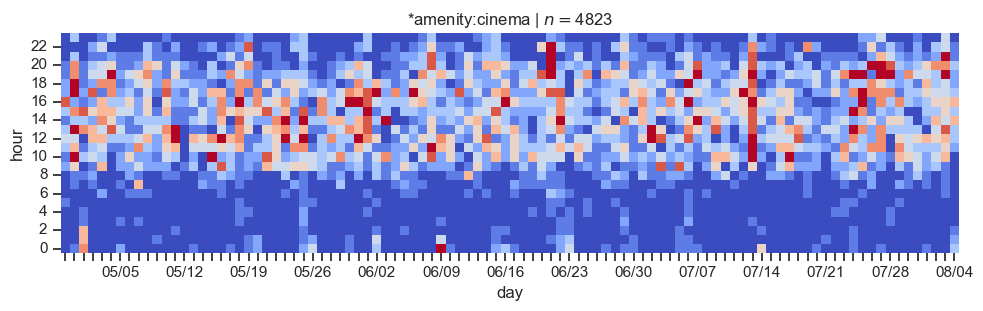

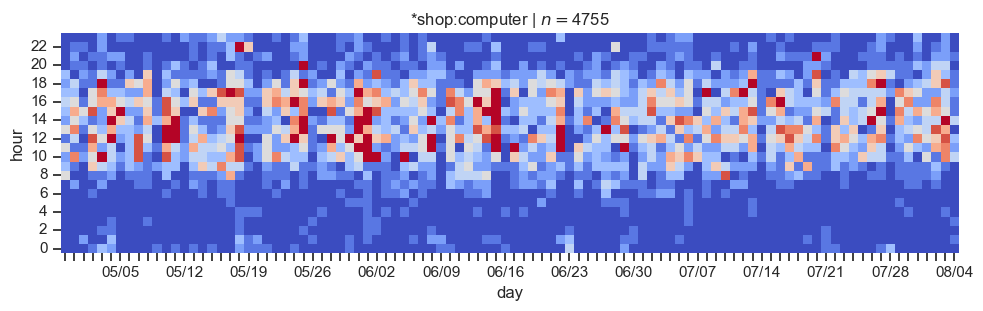

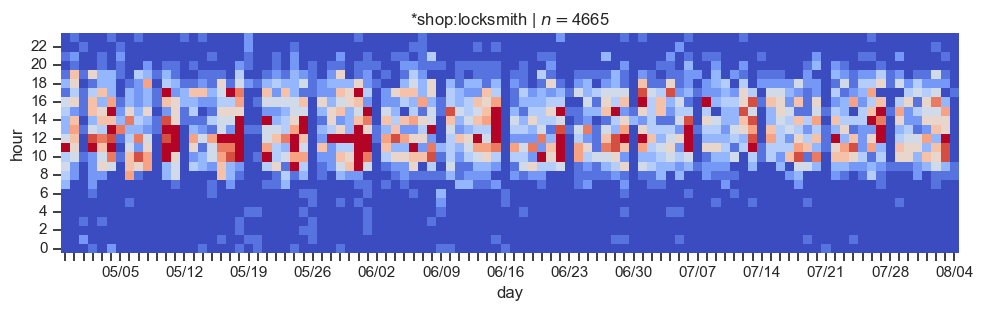

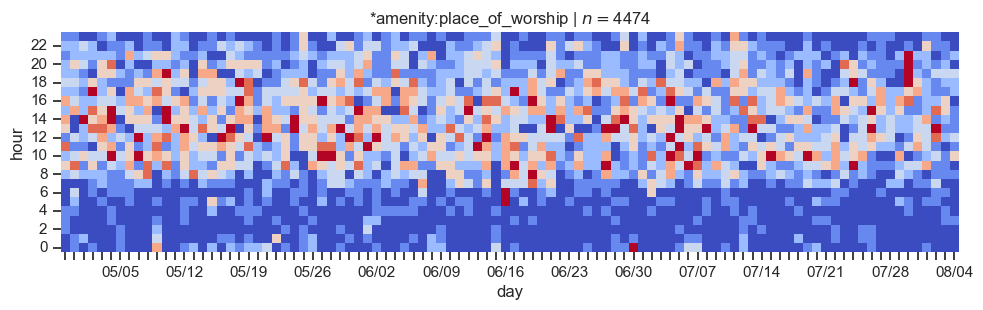

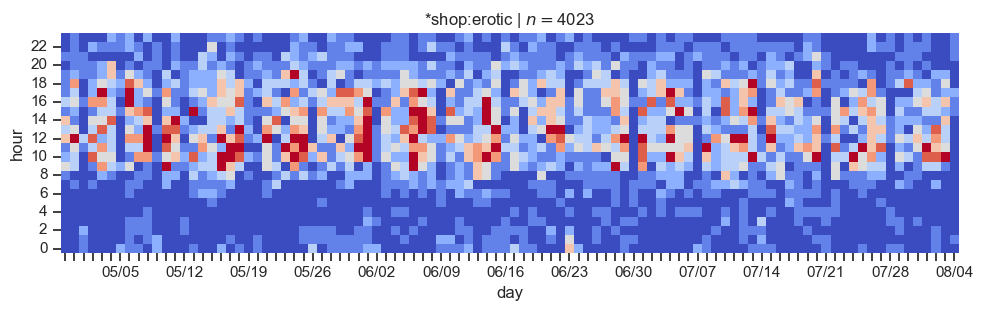

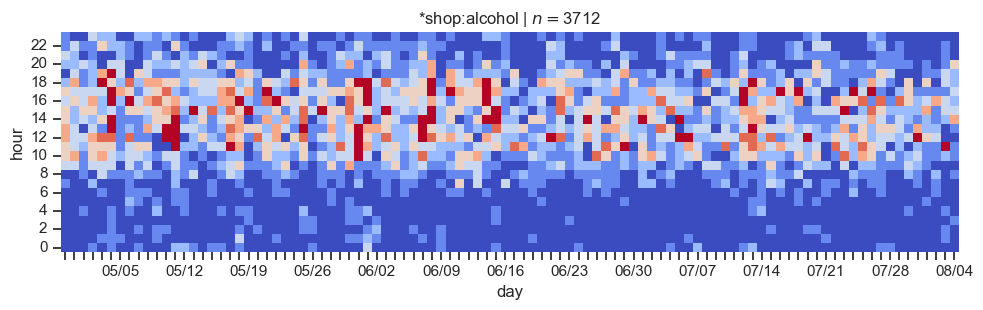

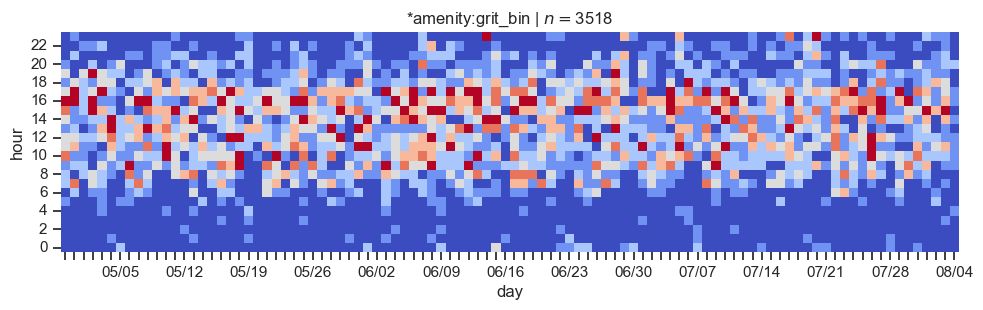

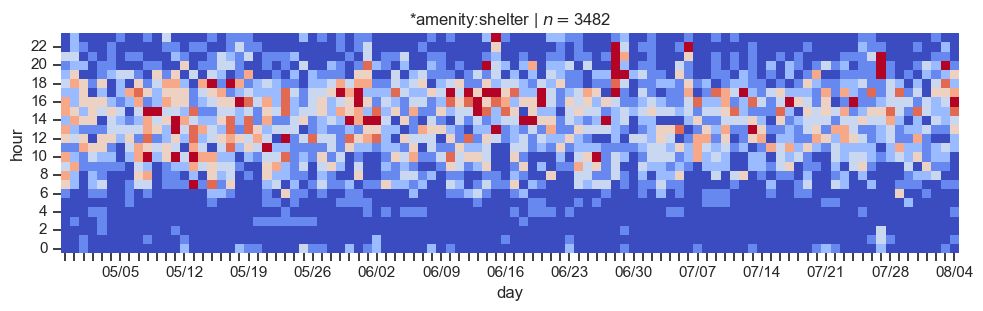

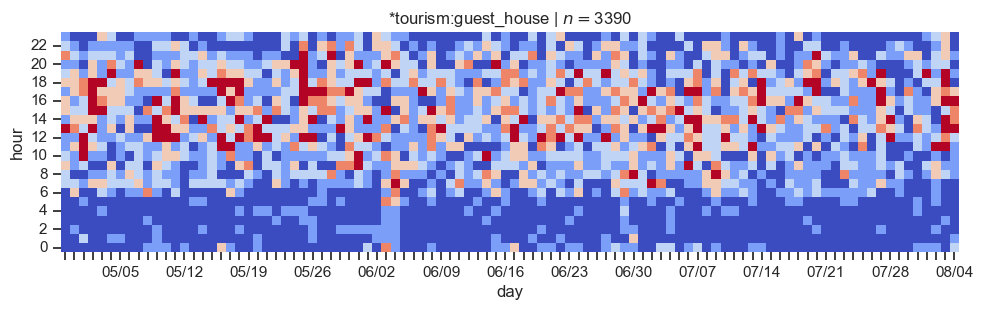

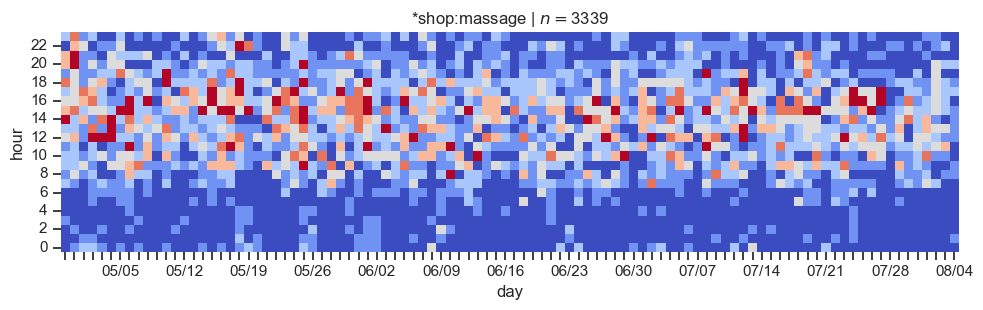

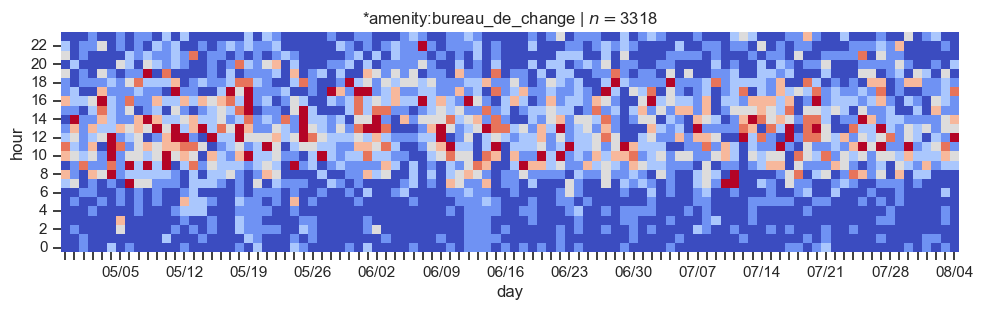

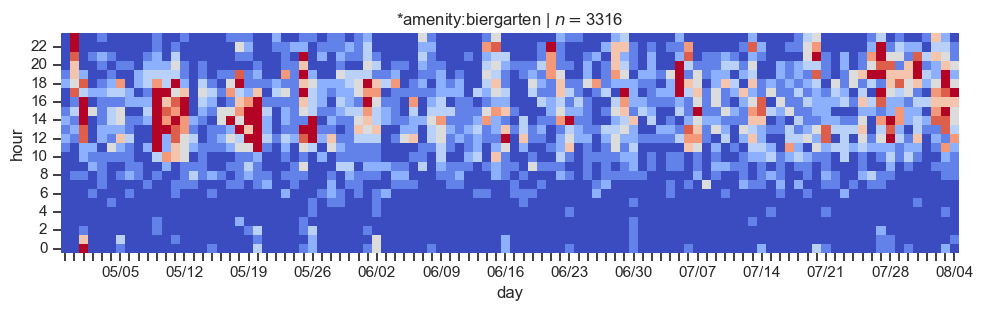

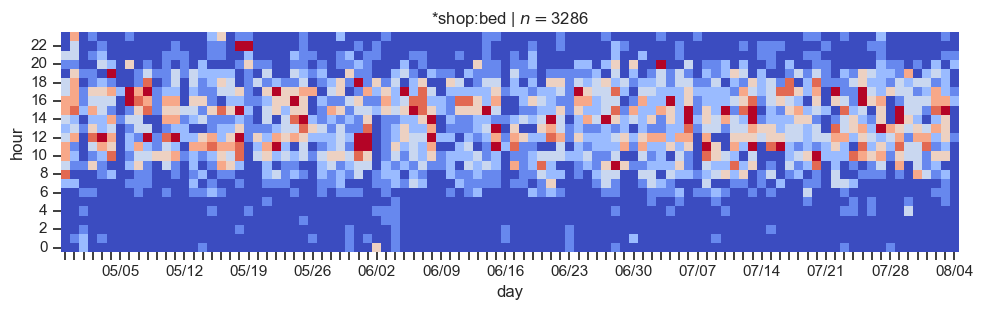

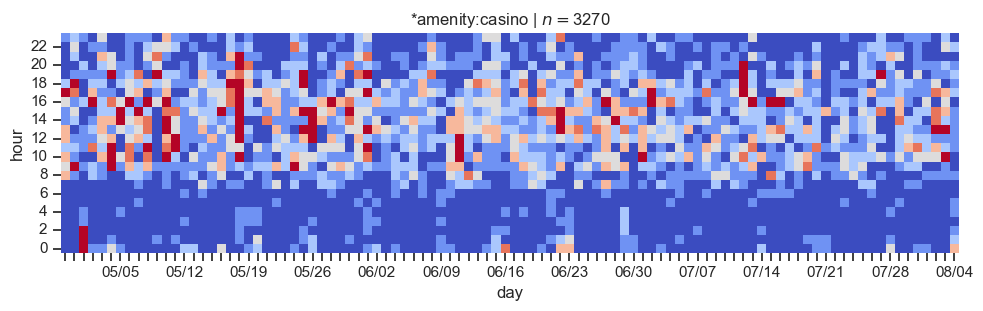

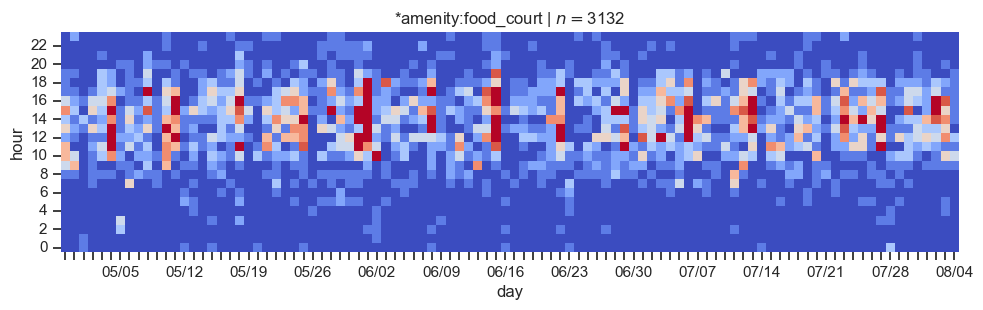

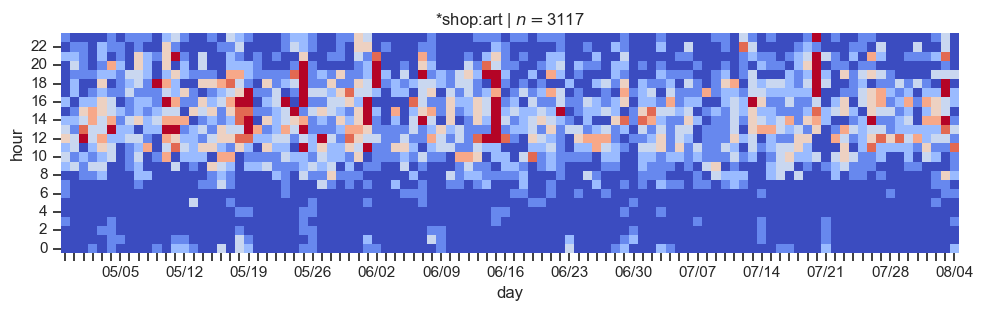

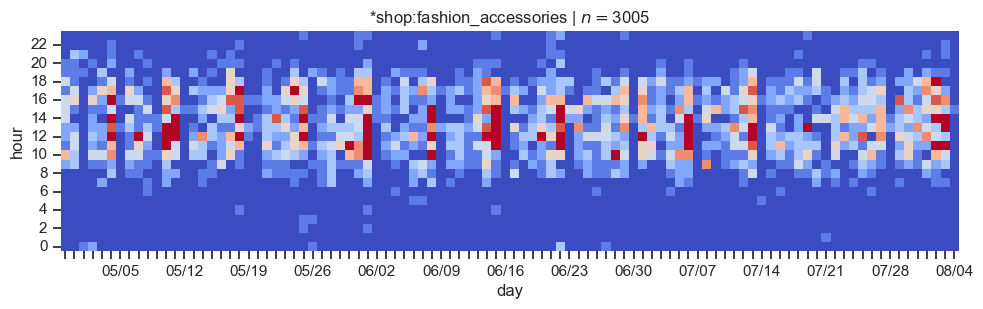

In [22]:
sns.set_theme(style="ticks")

for venue in mtypes_big[:]:
    
    fig, ax = plt.subplots(figsize=[10,3])
    
    pivoted = for_heatmap[for_heatmap.venue==venue].fillna(0).pivot(index="hour", columns="day", values="pair")  # Reshape
    g = sns.heatmap(pivoted.loc[::-1], cbar=False, robust=True, ax=ax, square=True, cmap='coolwarm')#, norm=norm, 
    
    # Set yticks for all subplots
    ncnt = pivoted.sum().sum()
    g.set(title=venue+f' | $n=${int(ncnt)}', yticks=[24-x-.5 for x in range(0,24,2)], xticks=[x+.5 for x in range(len(set(data.day)))])
    g.set_yticklabels(list(range(0,24,2)), rotation=0)
    g.set_xticklabels([str(d.month).zfill(2)+'/'+str(d.day).zfill(2) if d.weekday()==6 else '' for d in sorted(set(data.day))], rotation=0)
    
    plt.tight_layout()
    plt.show()

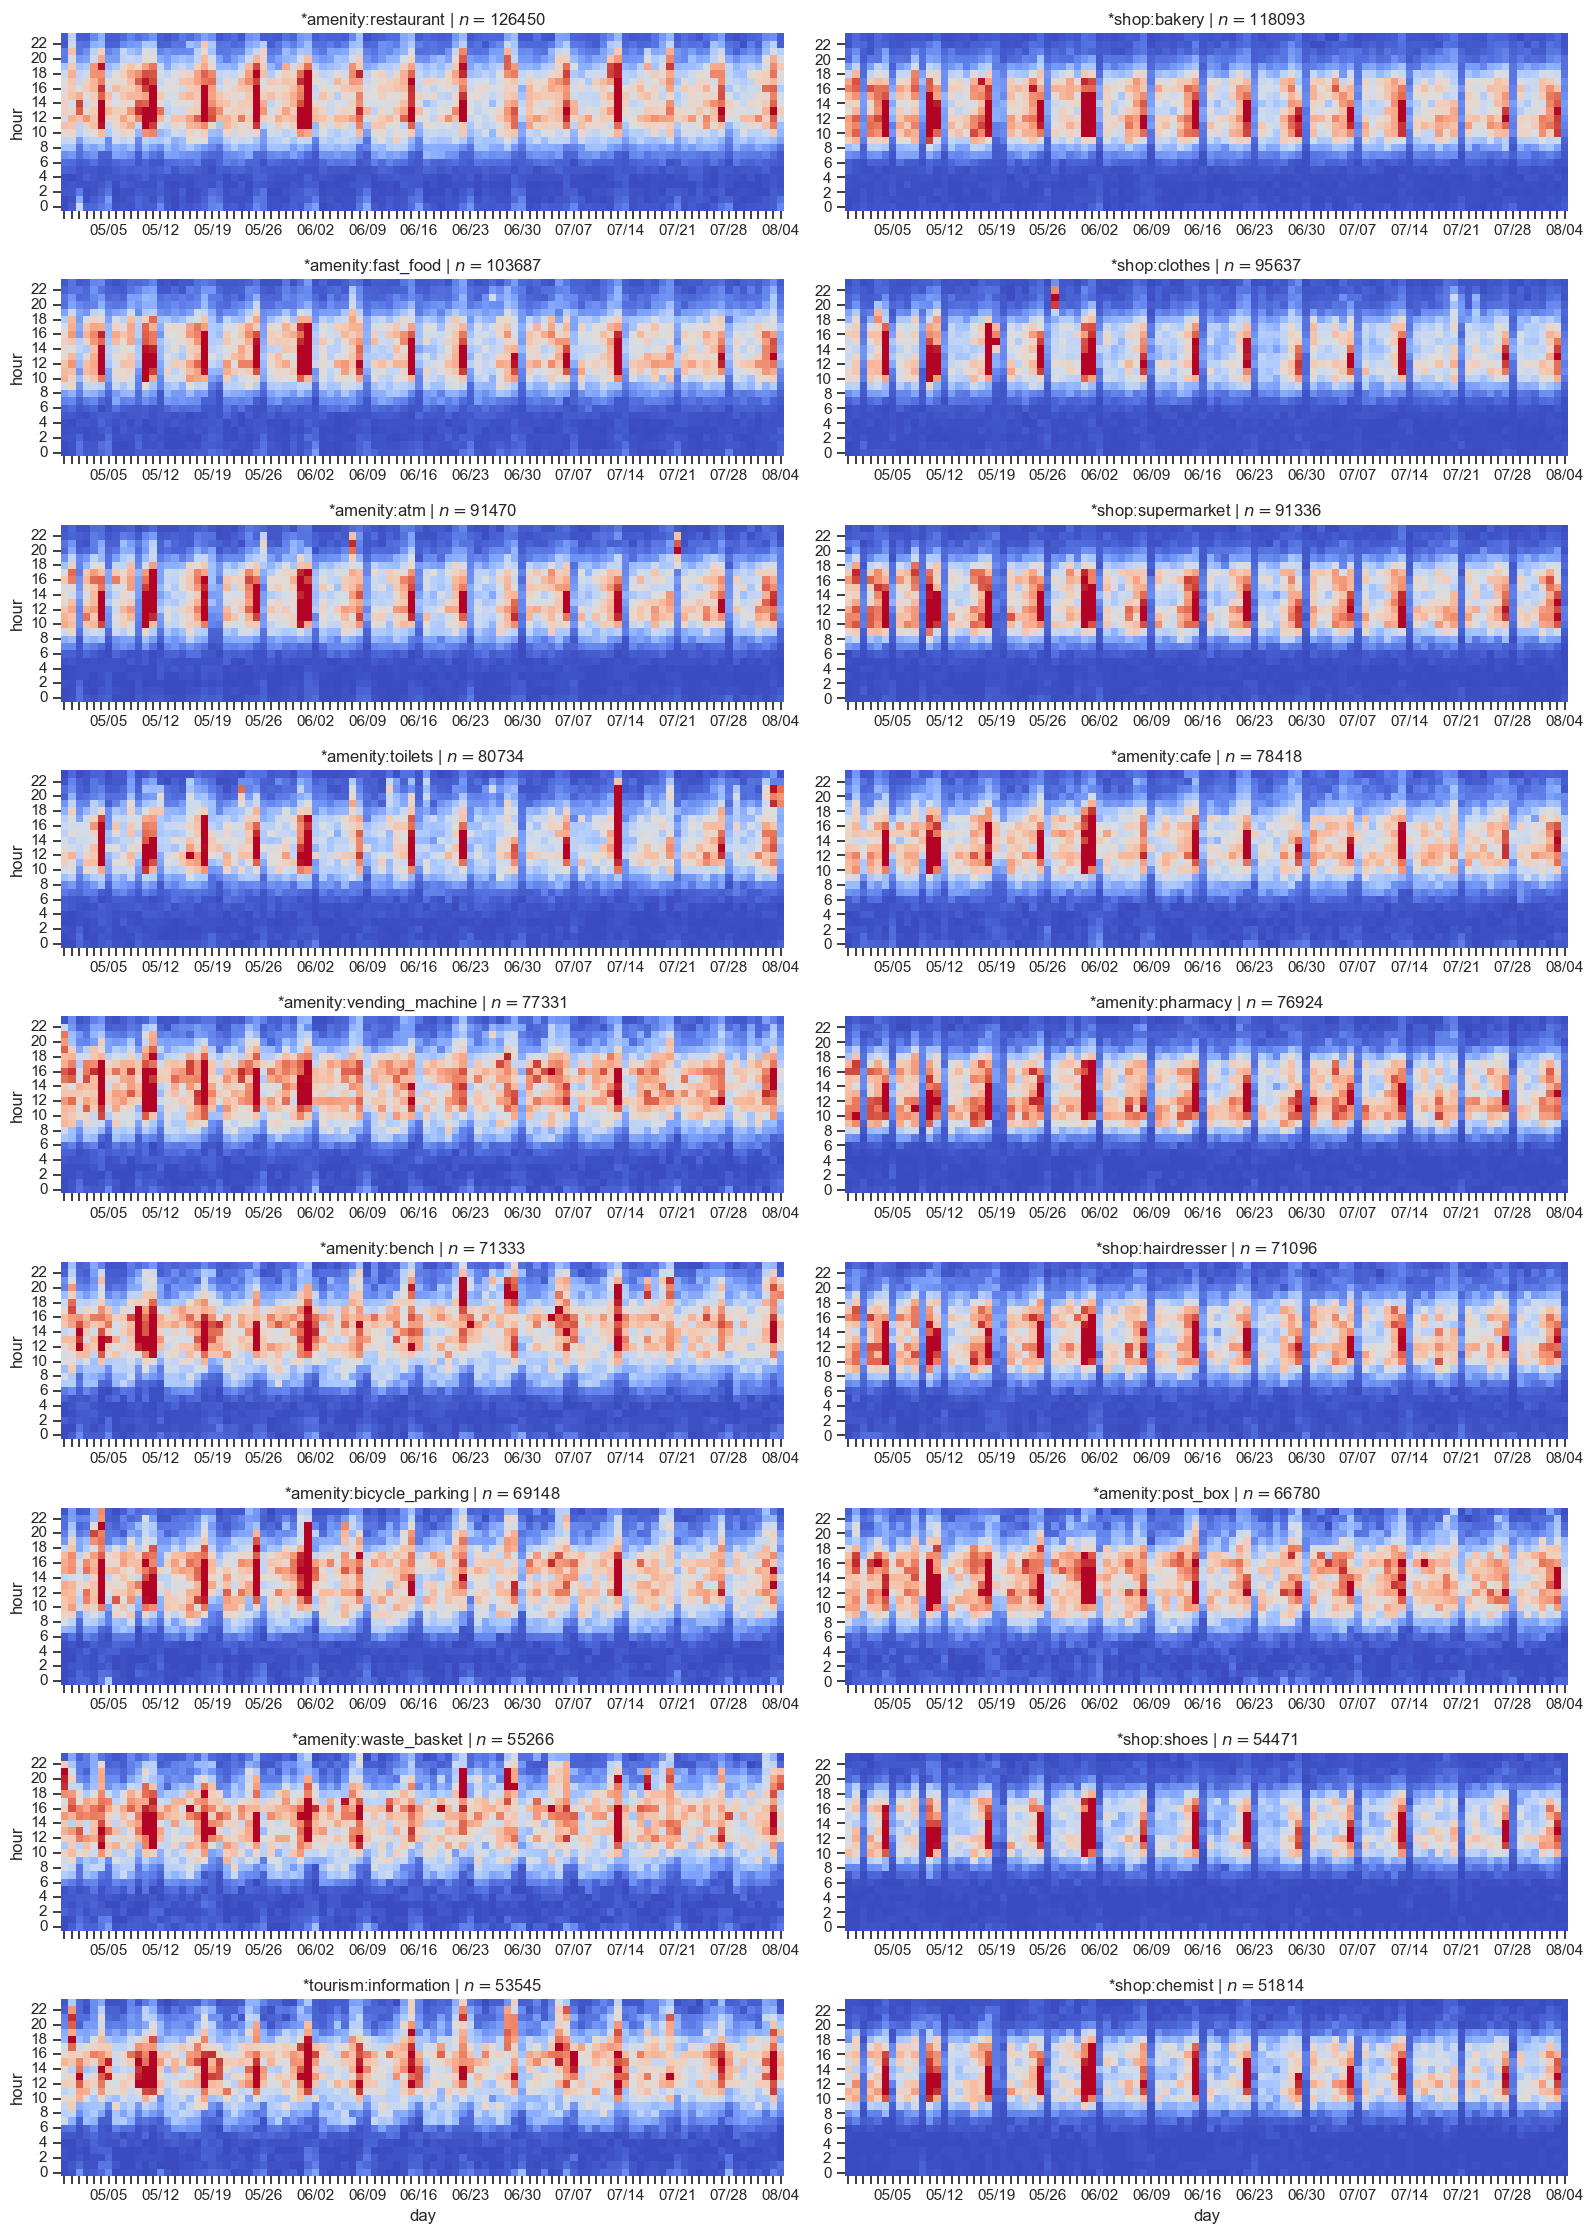

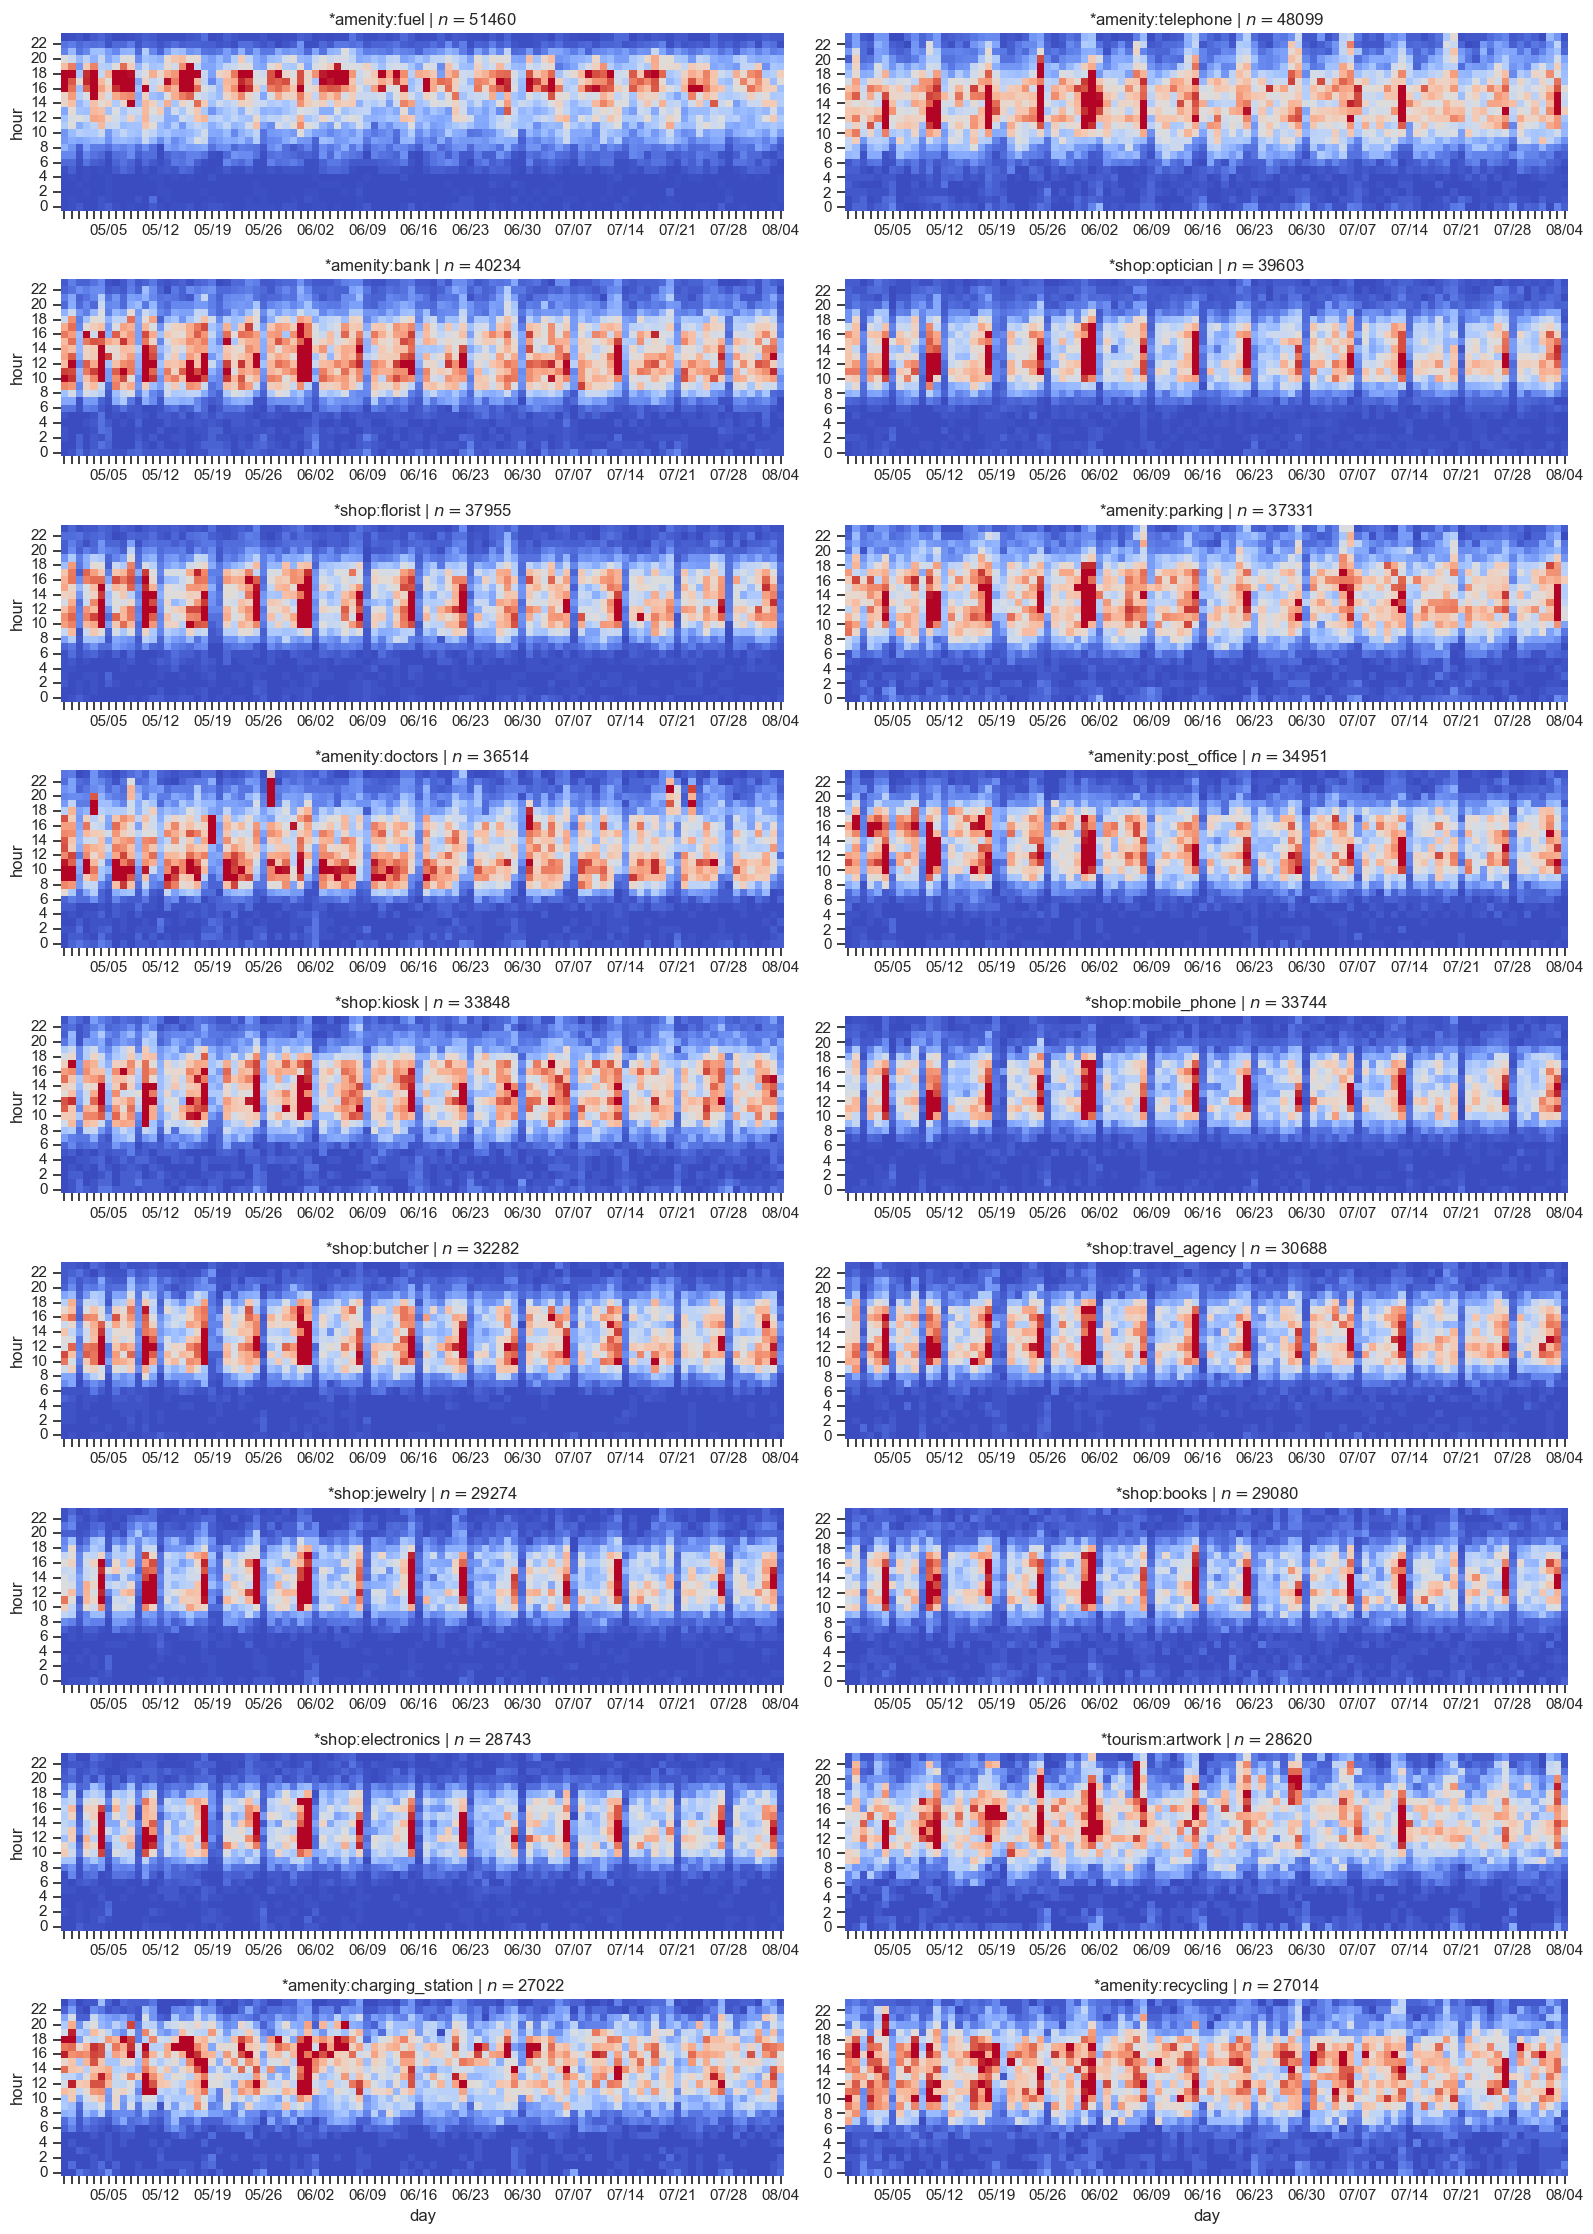

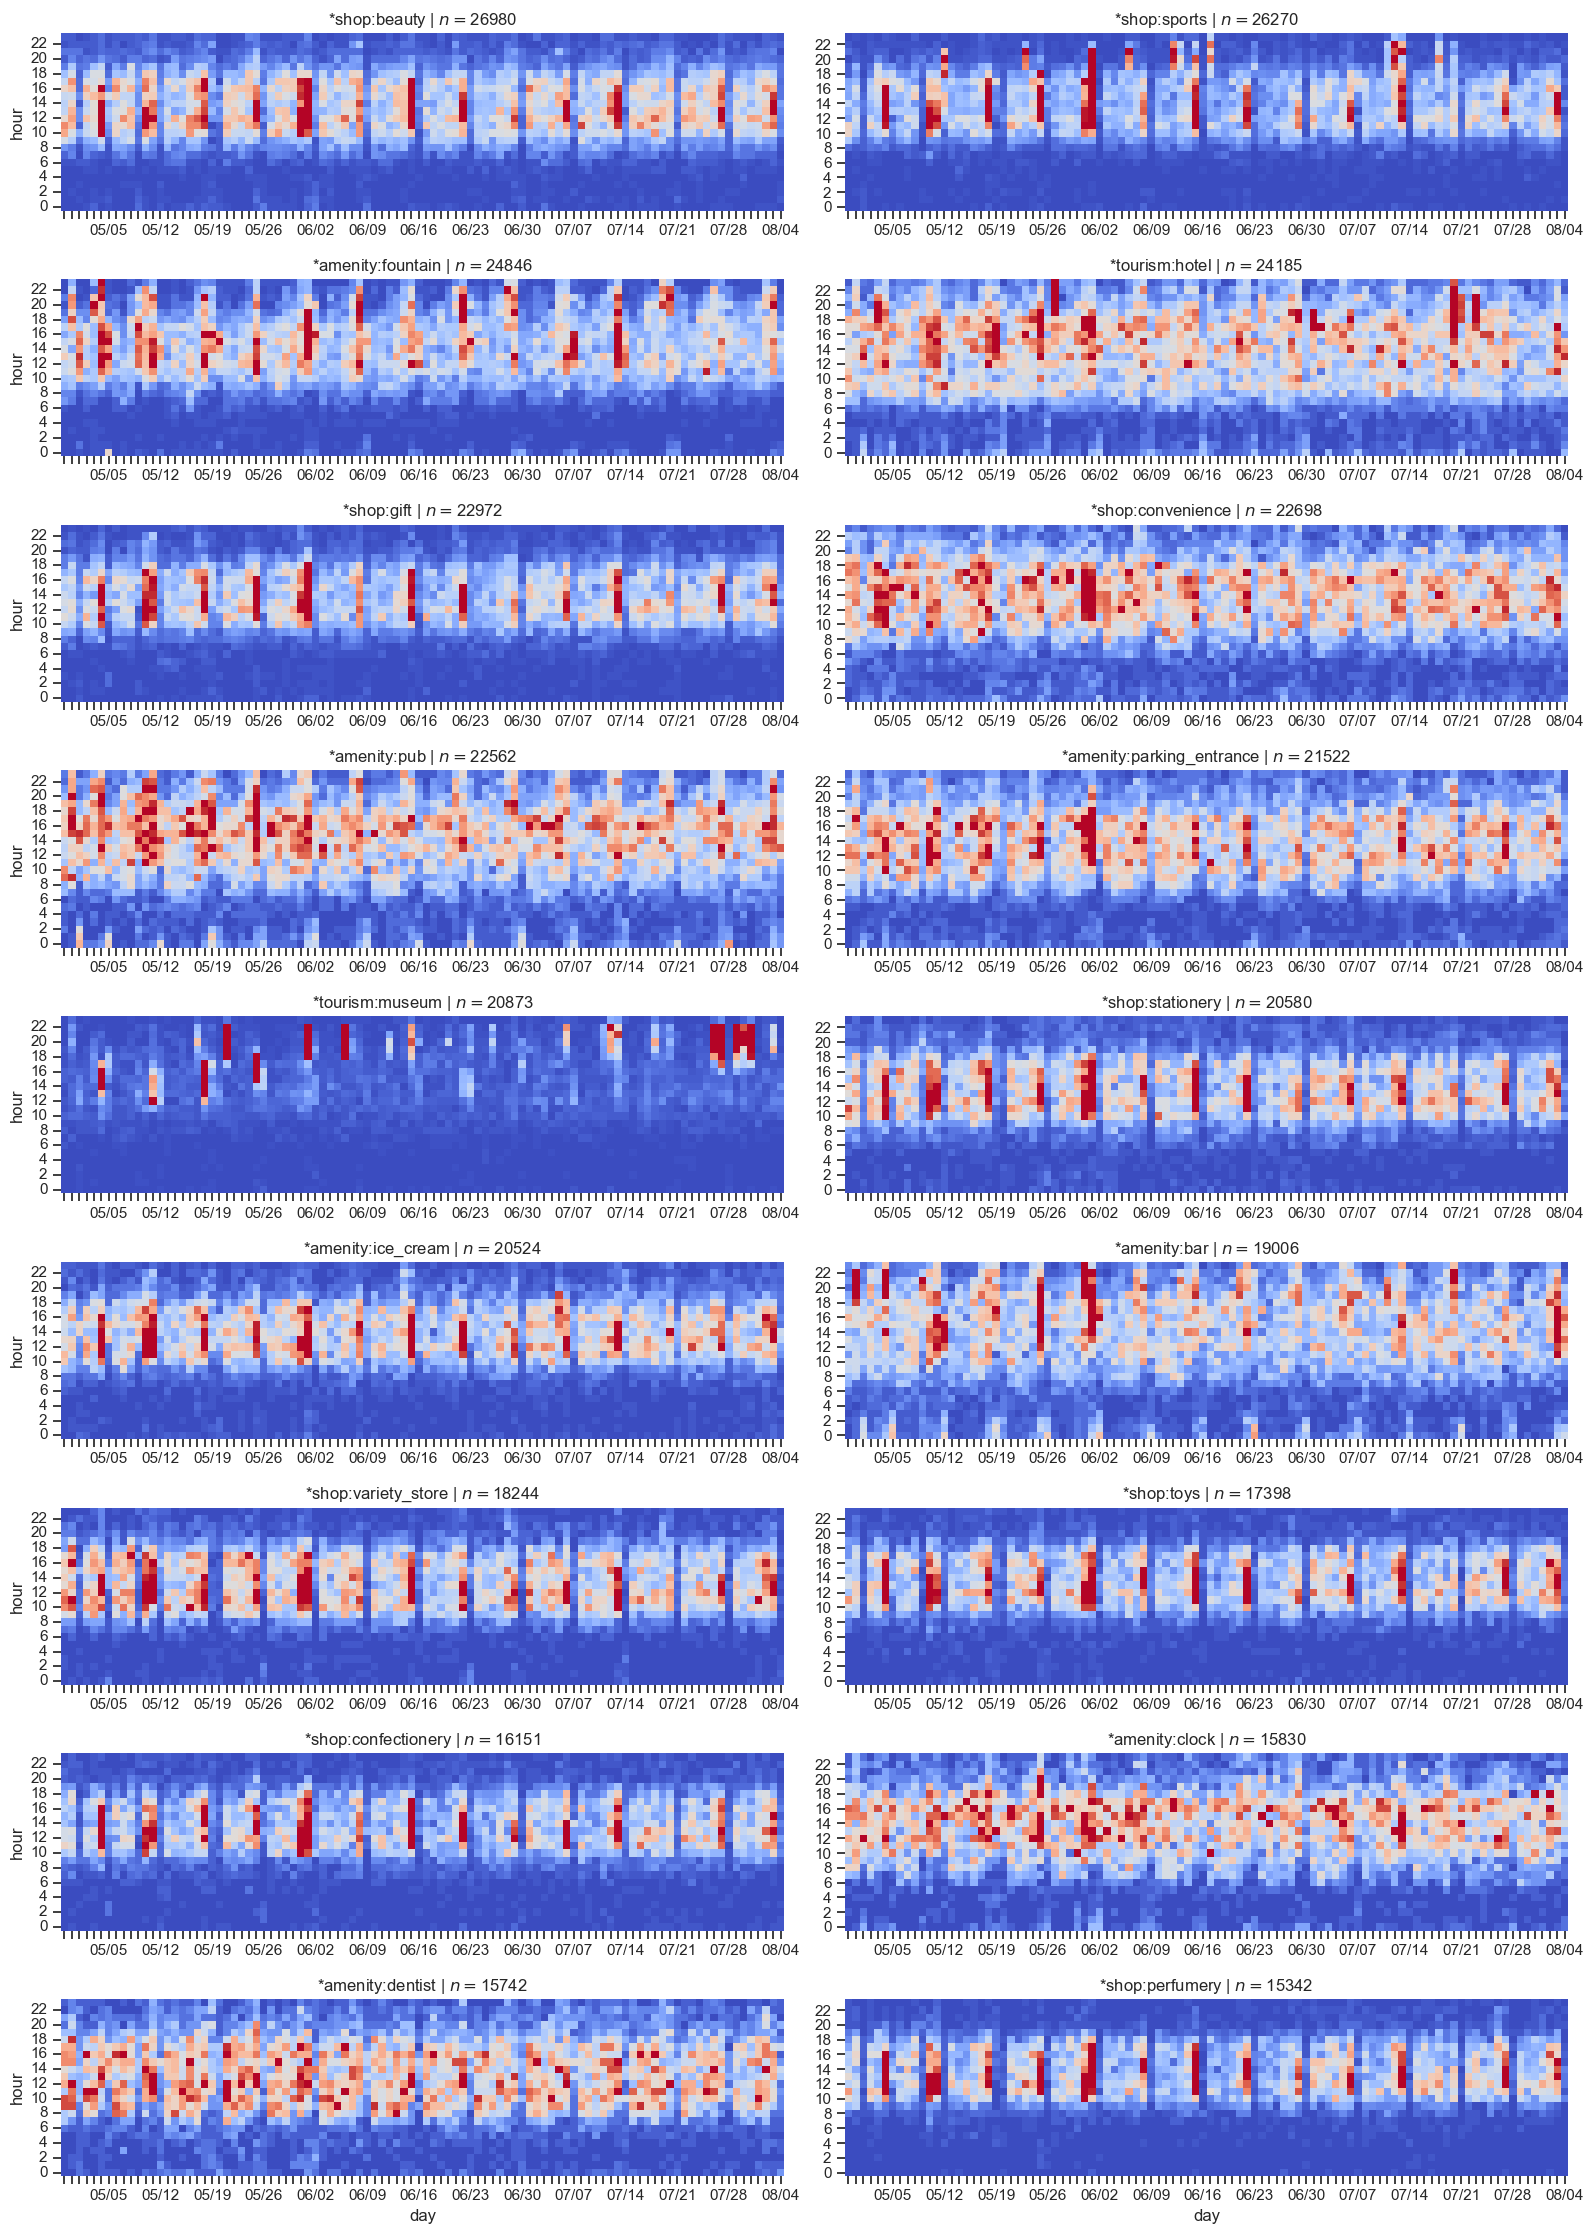

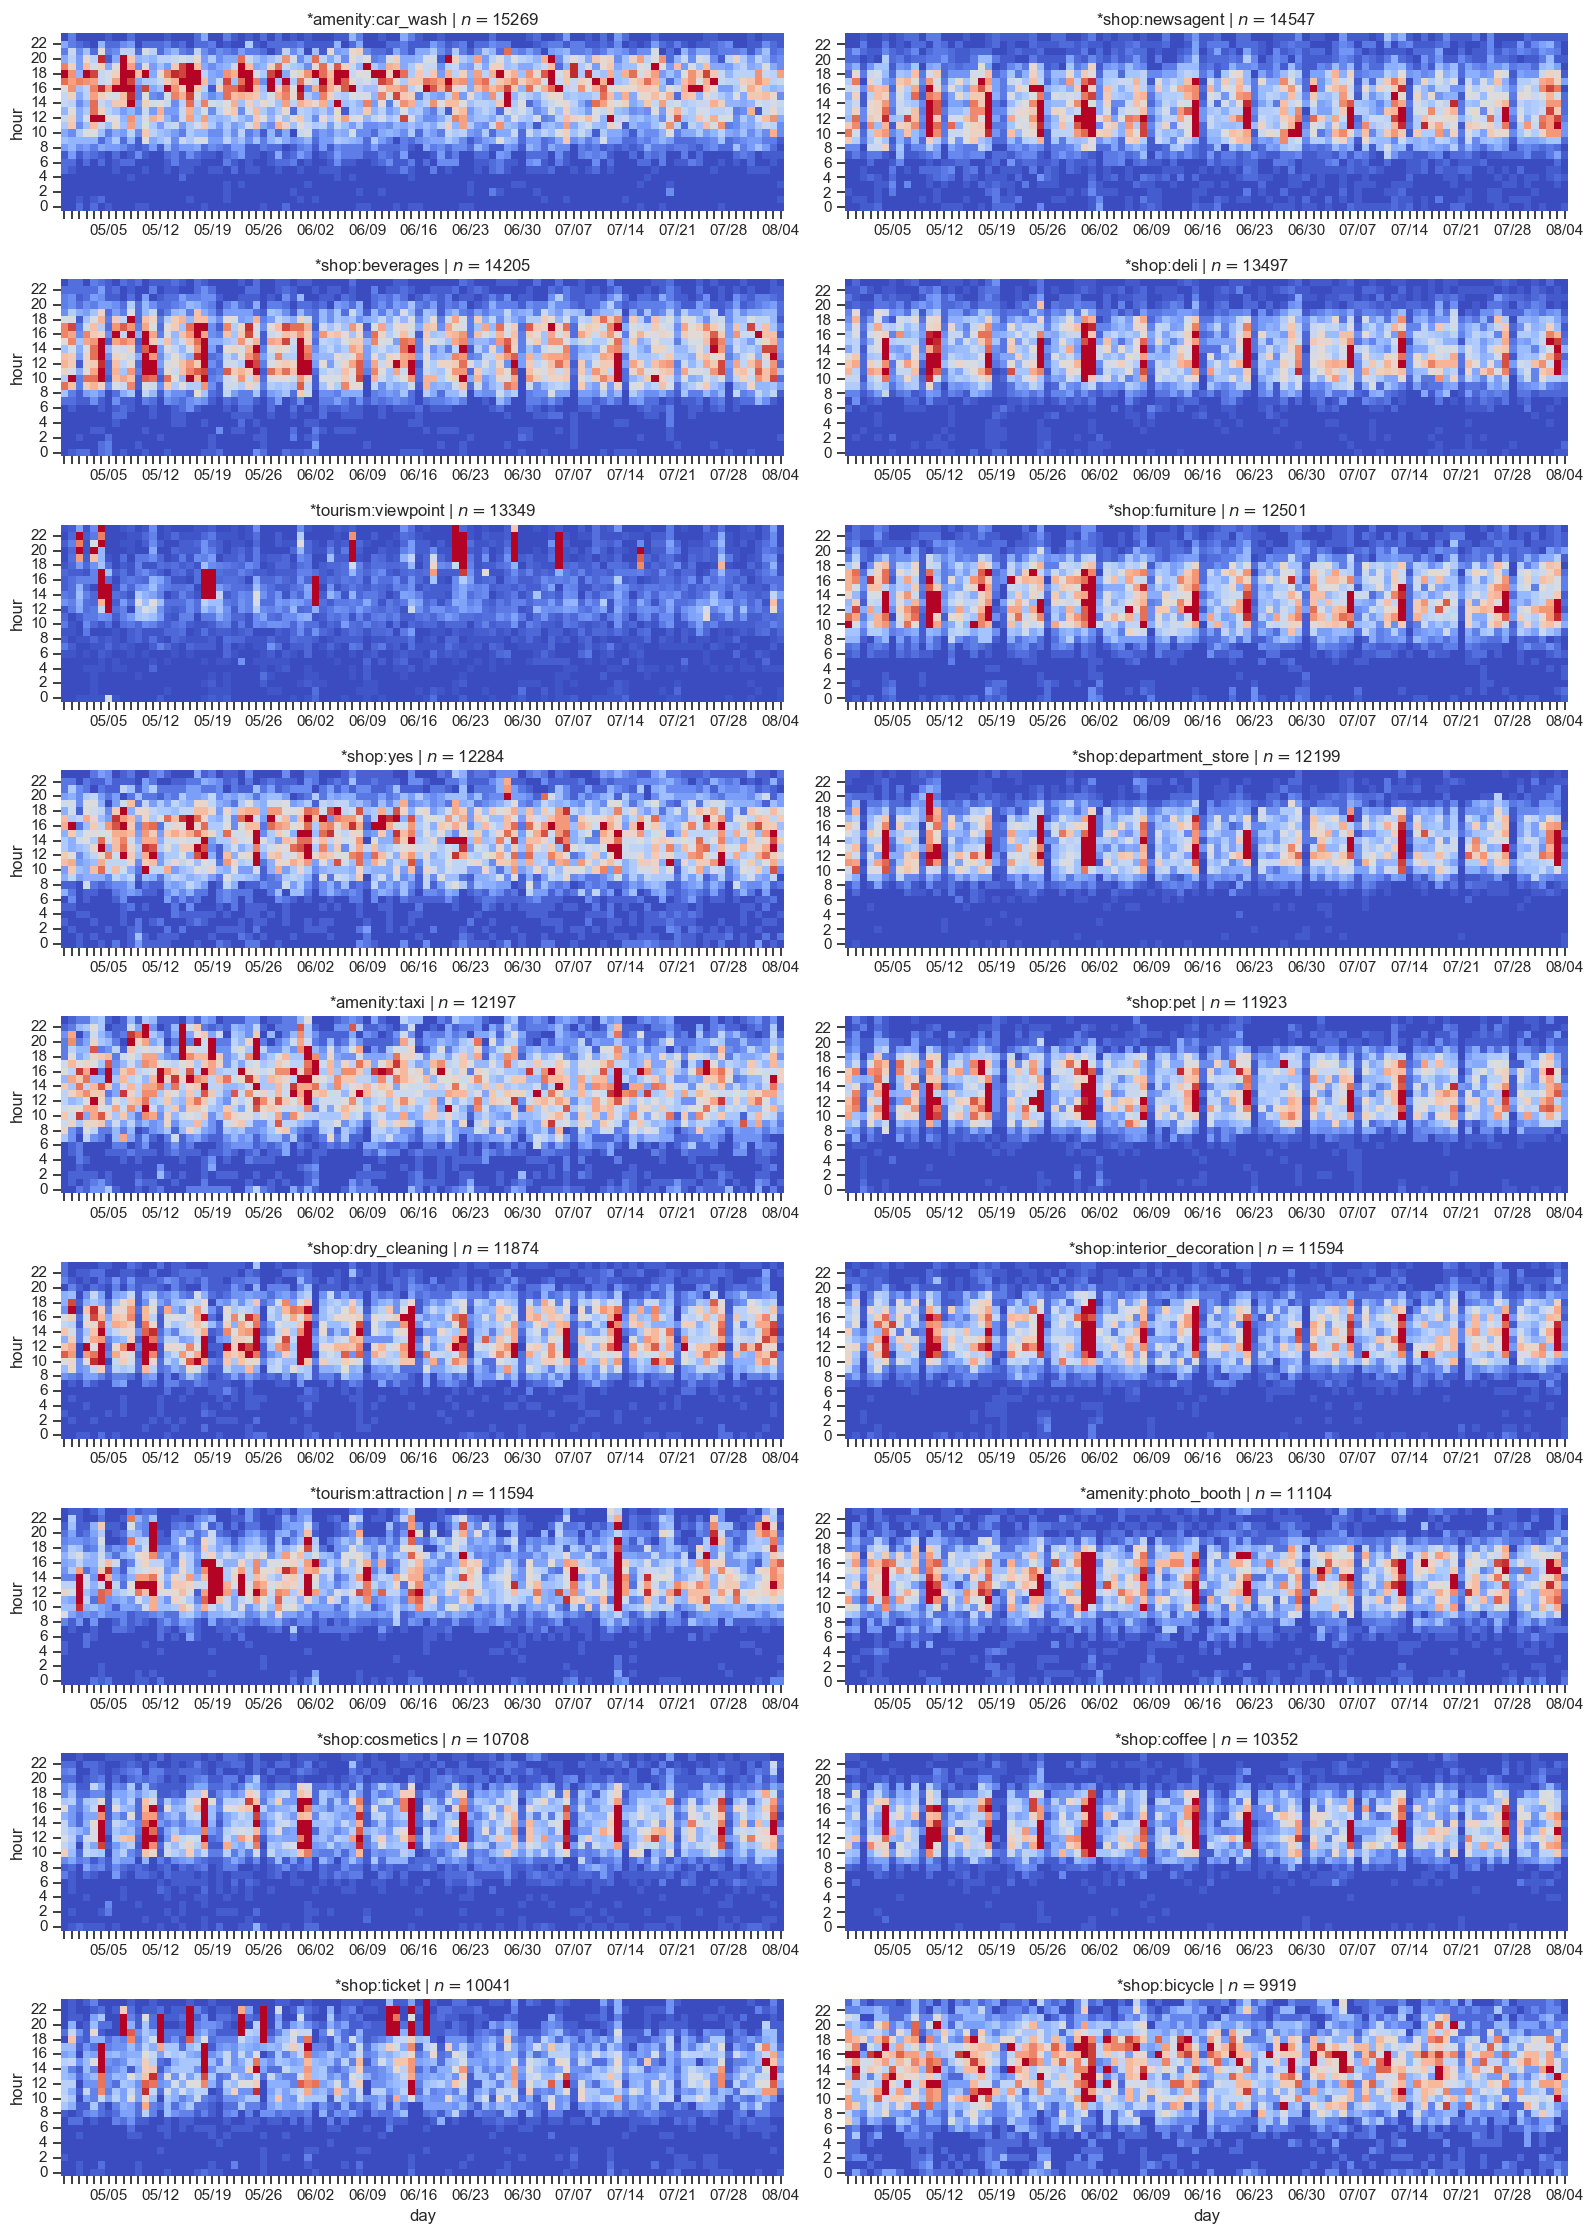

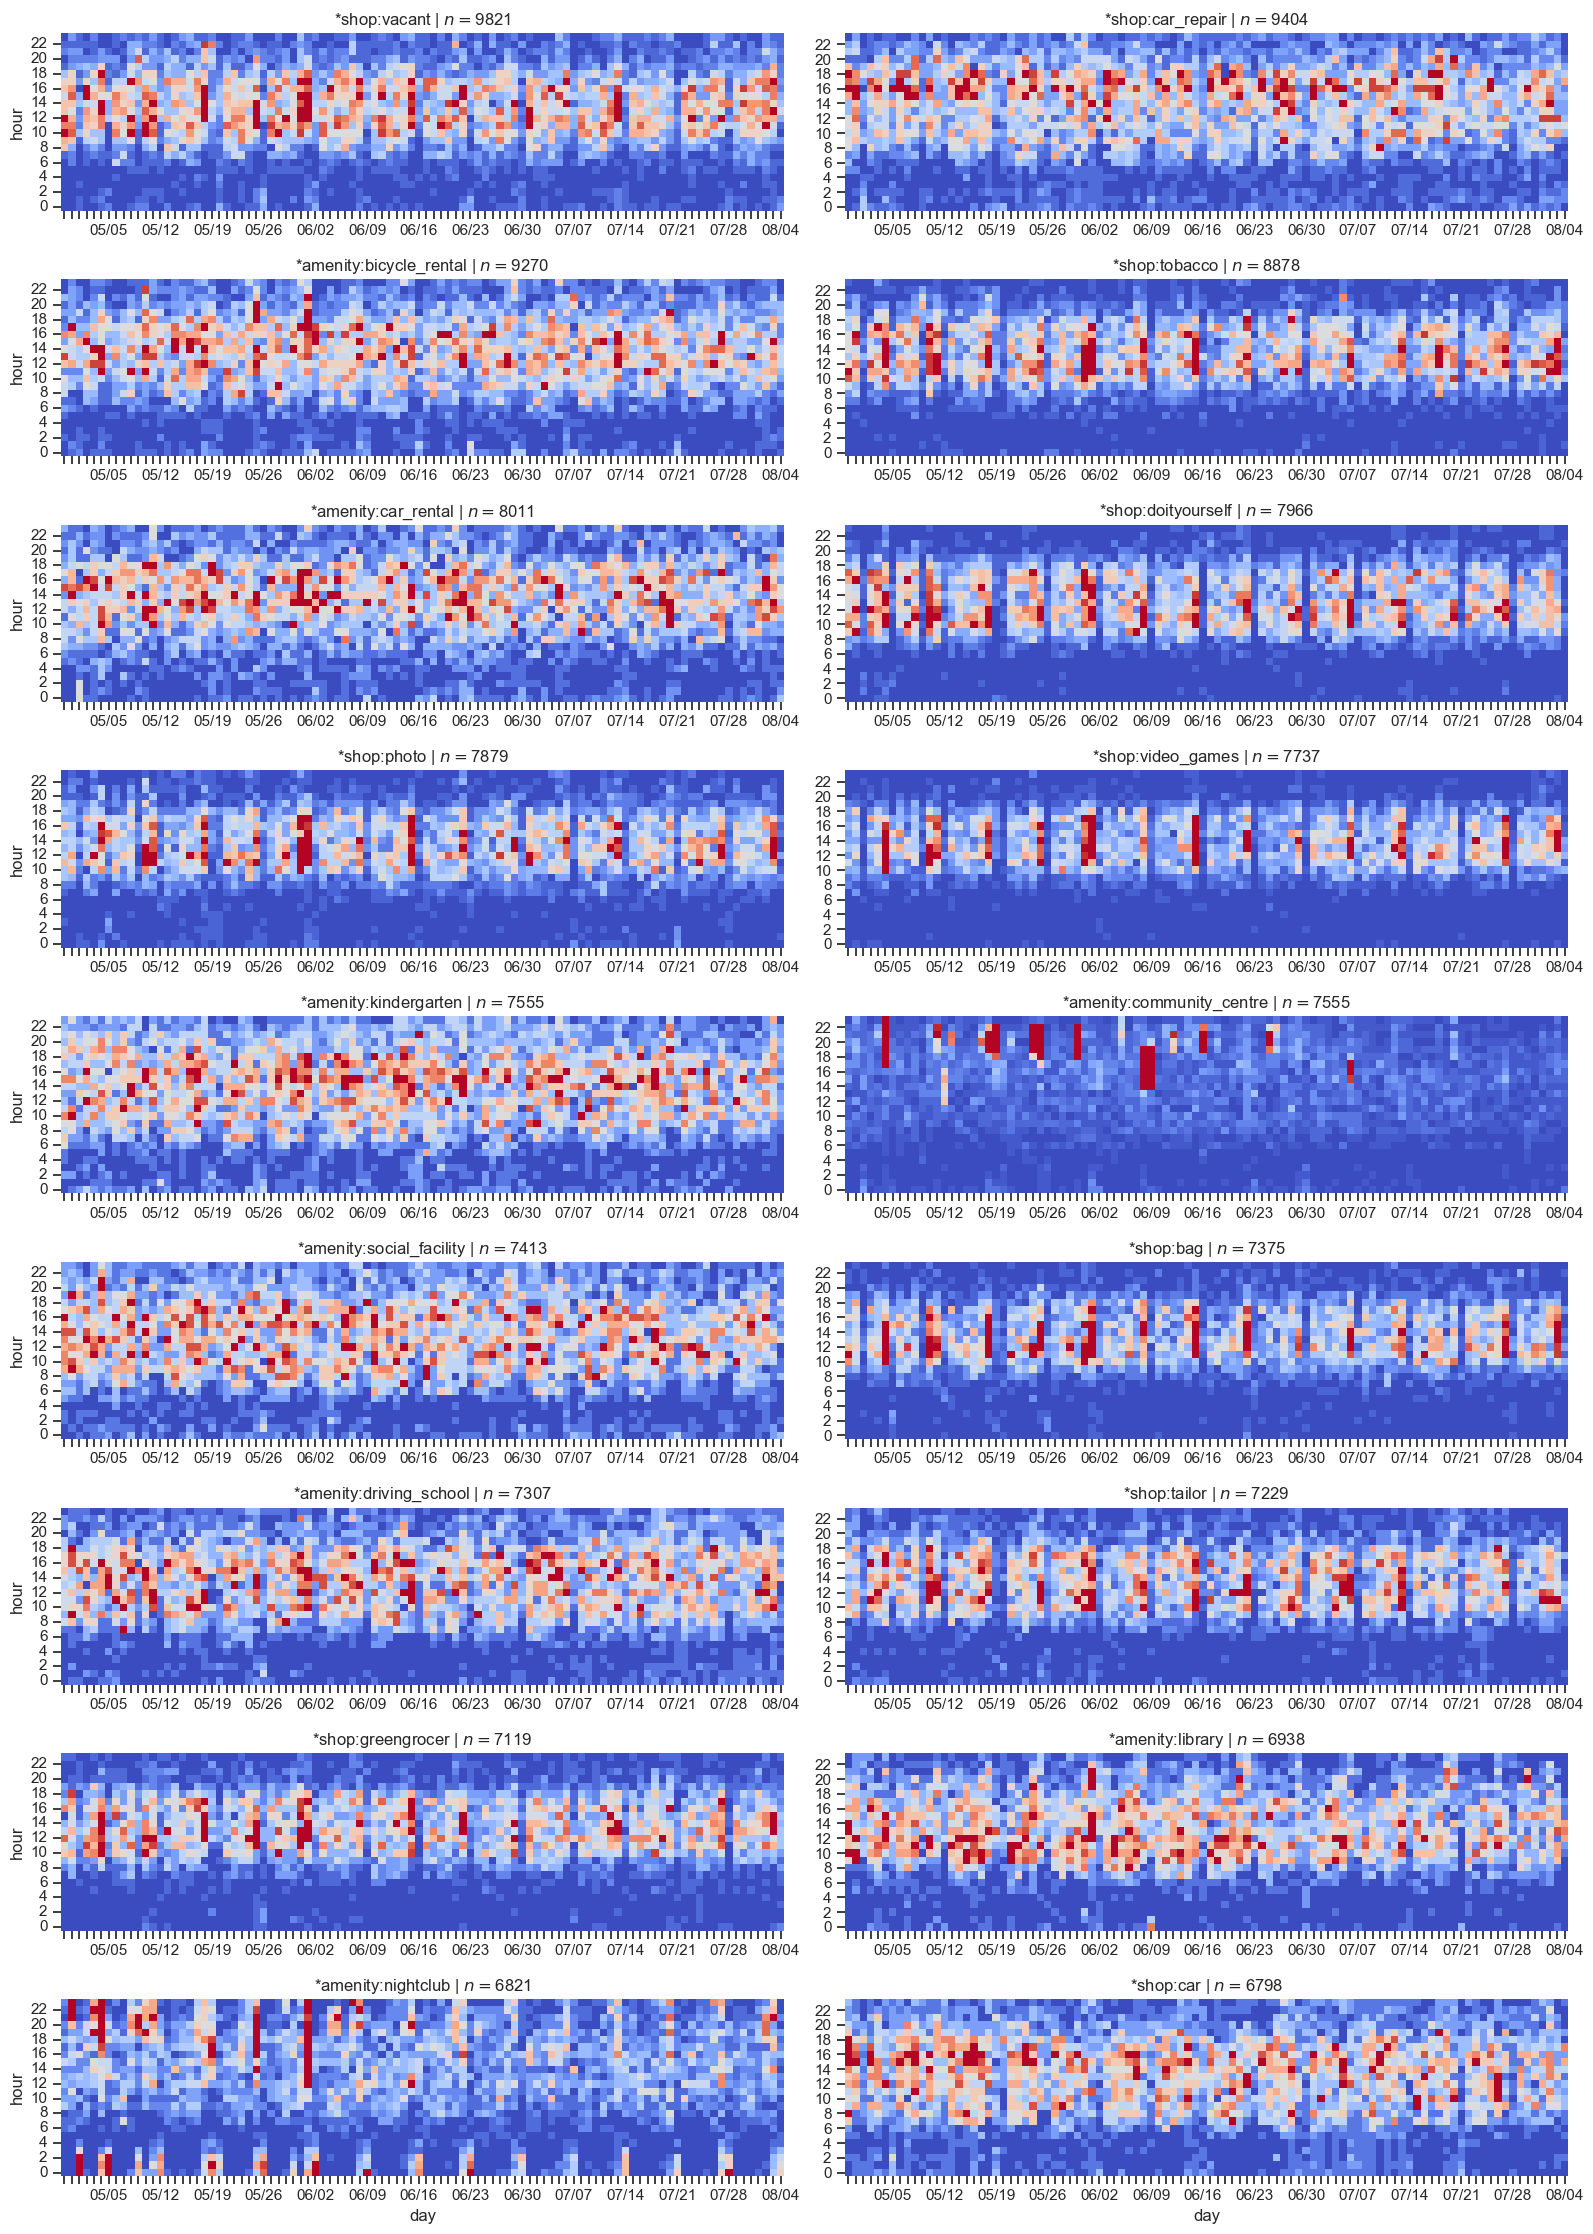

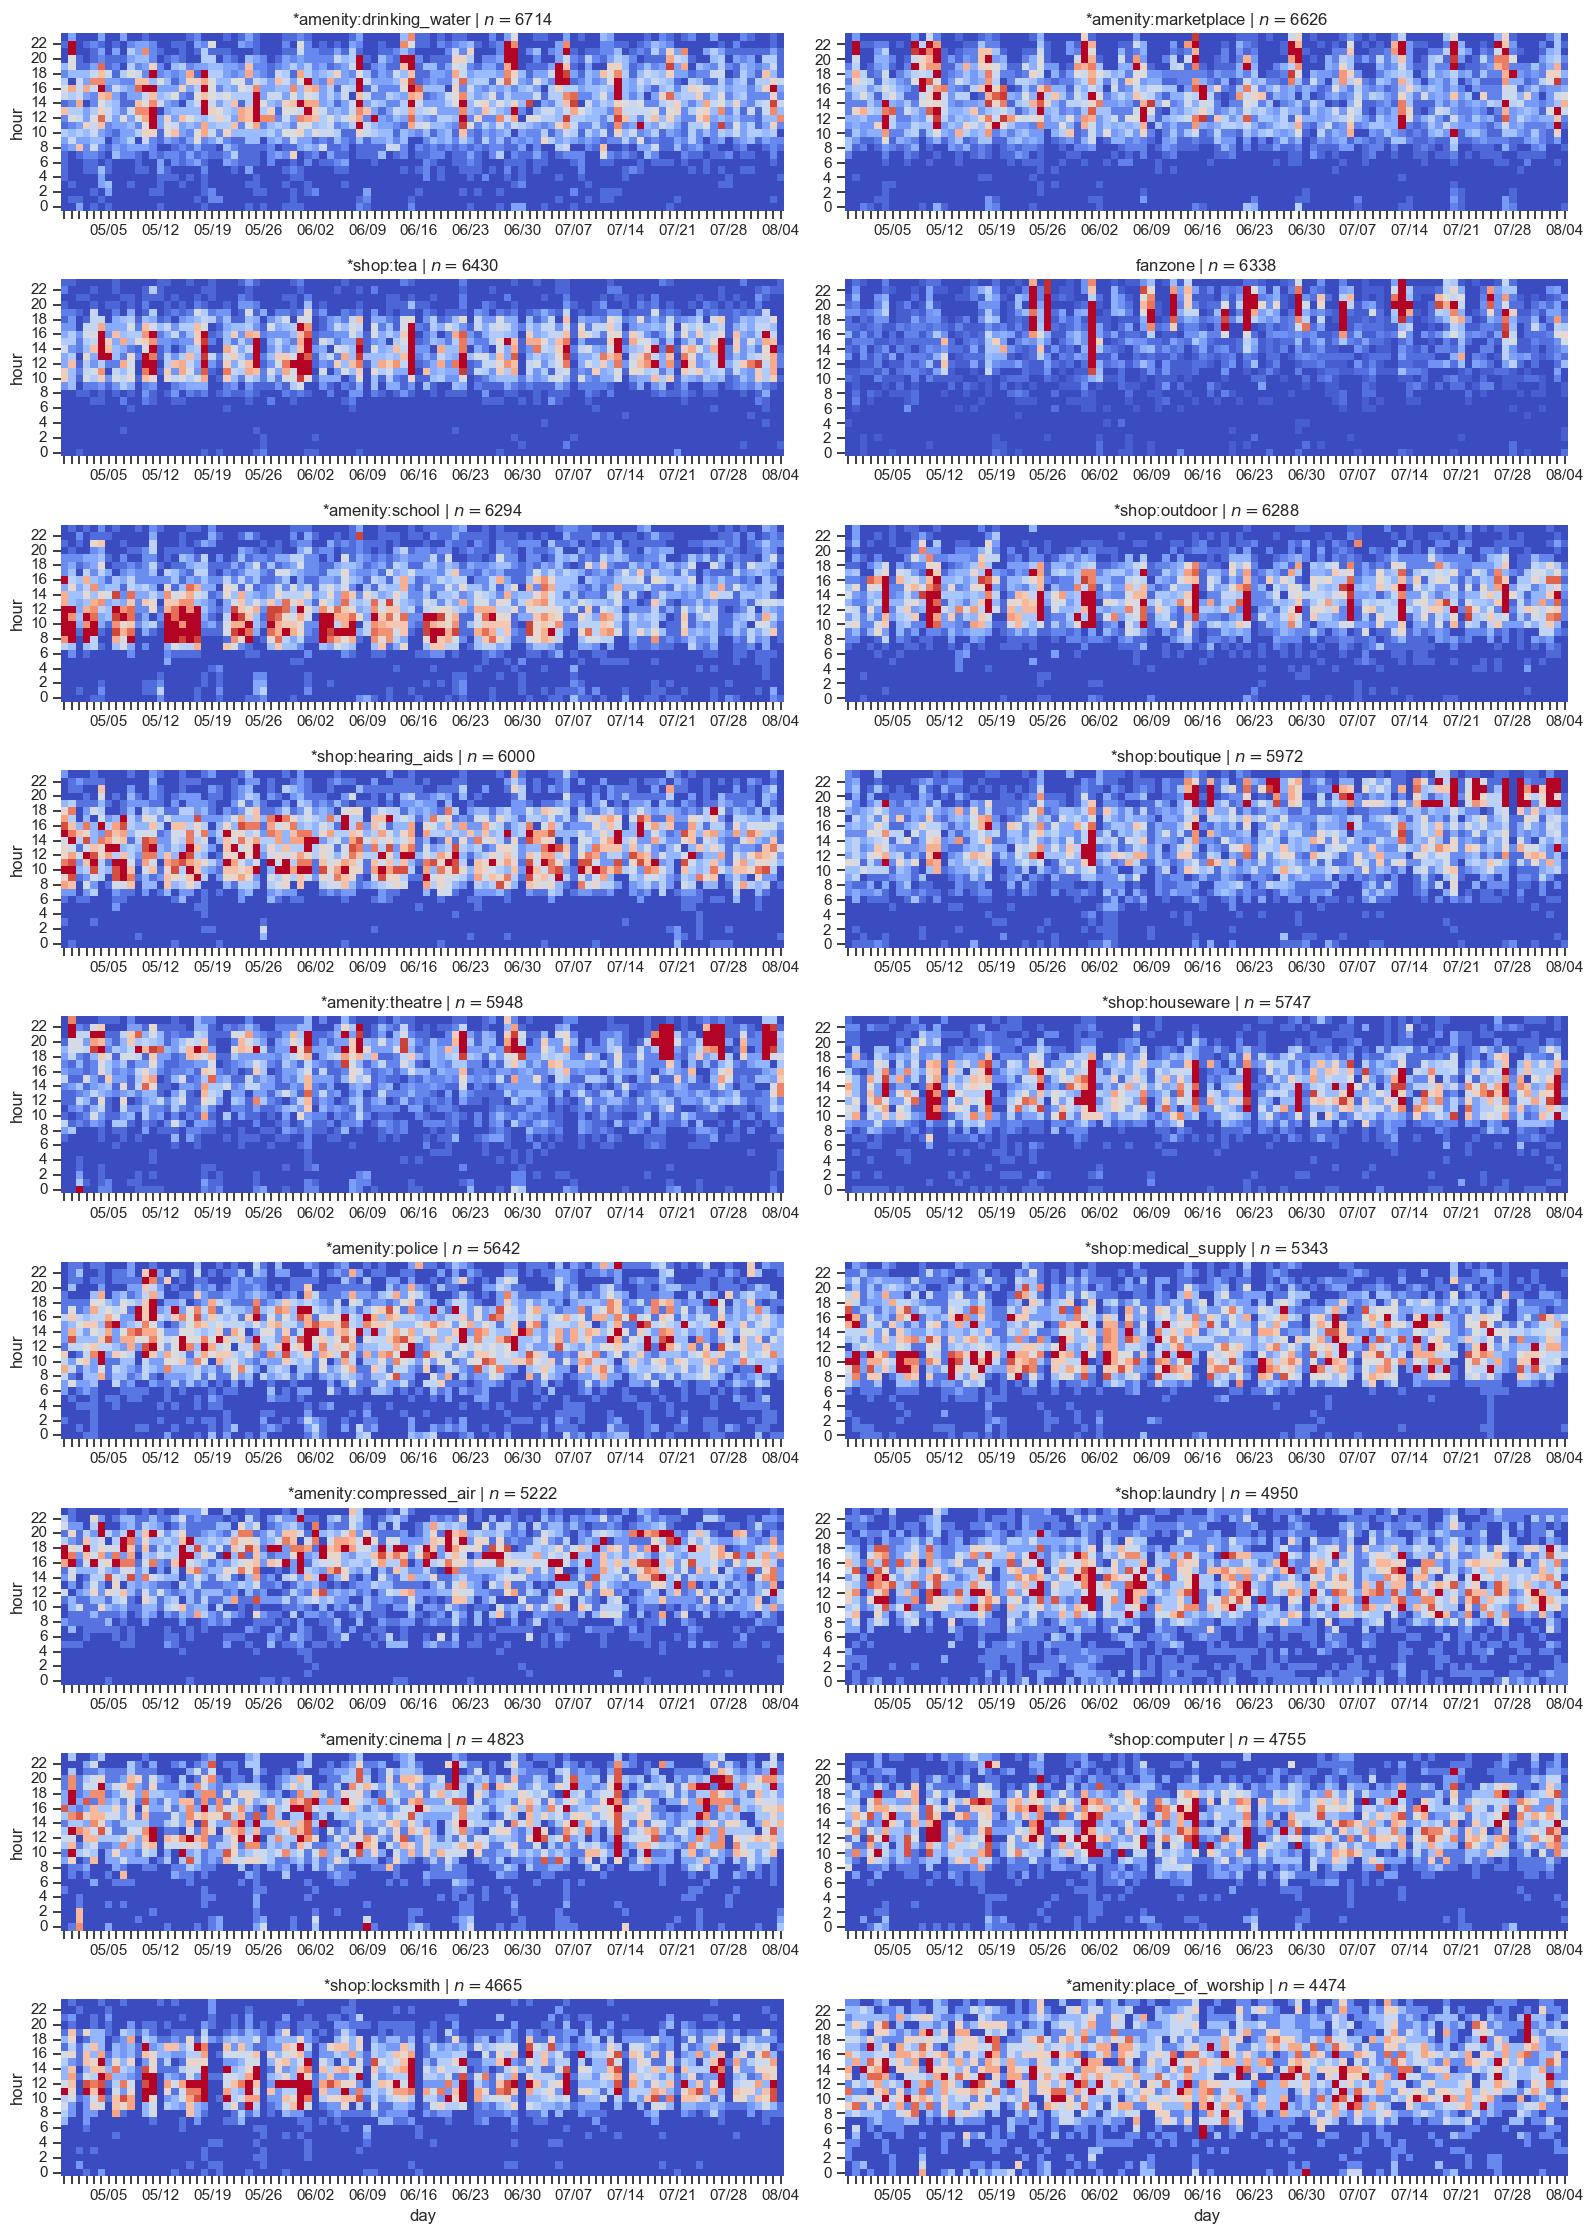

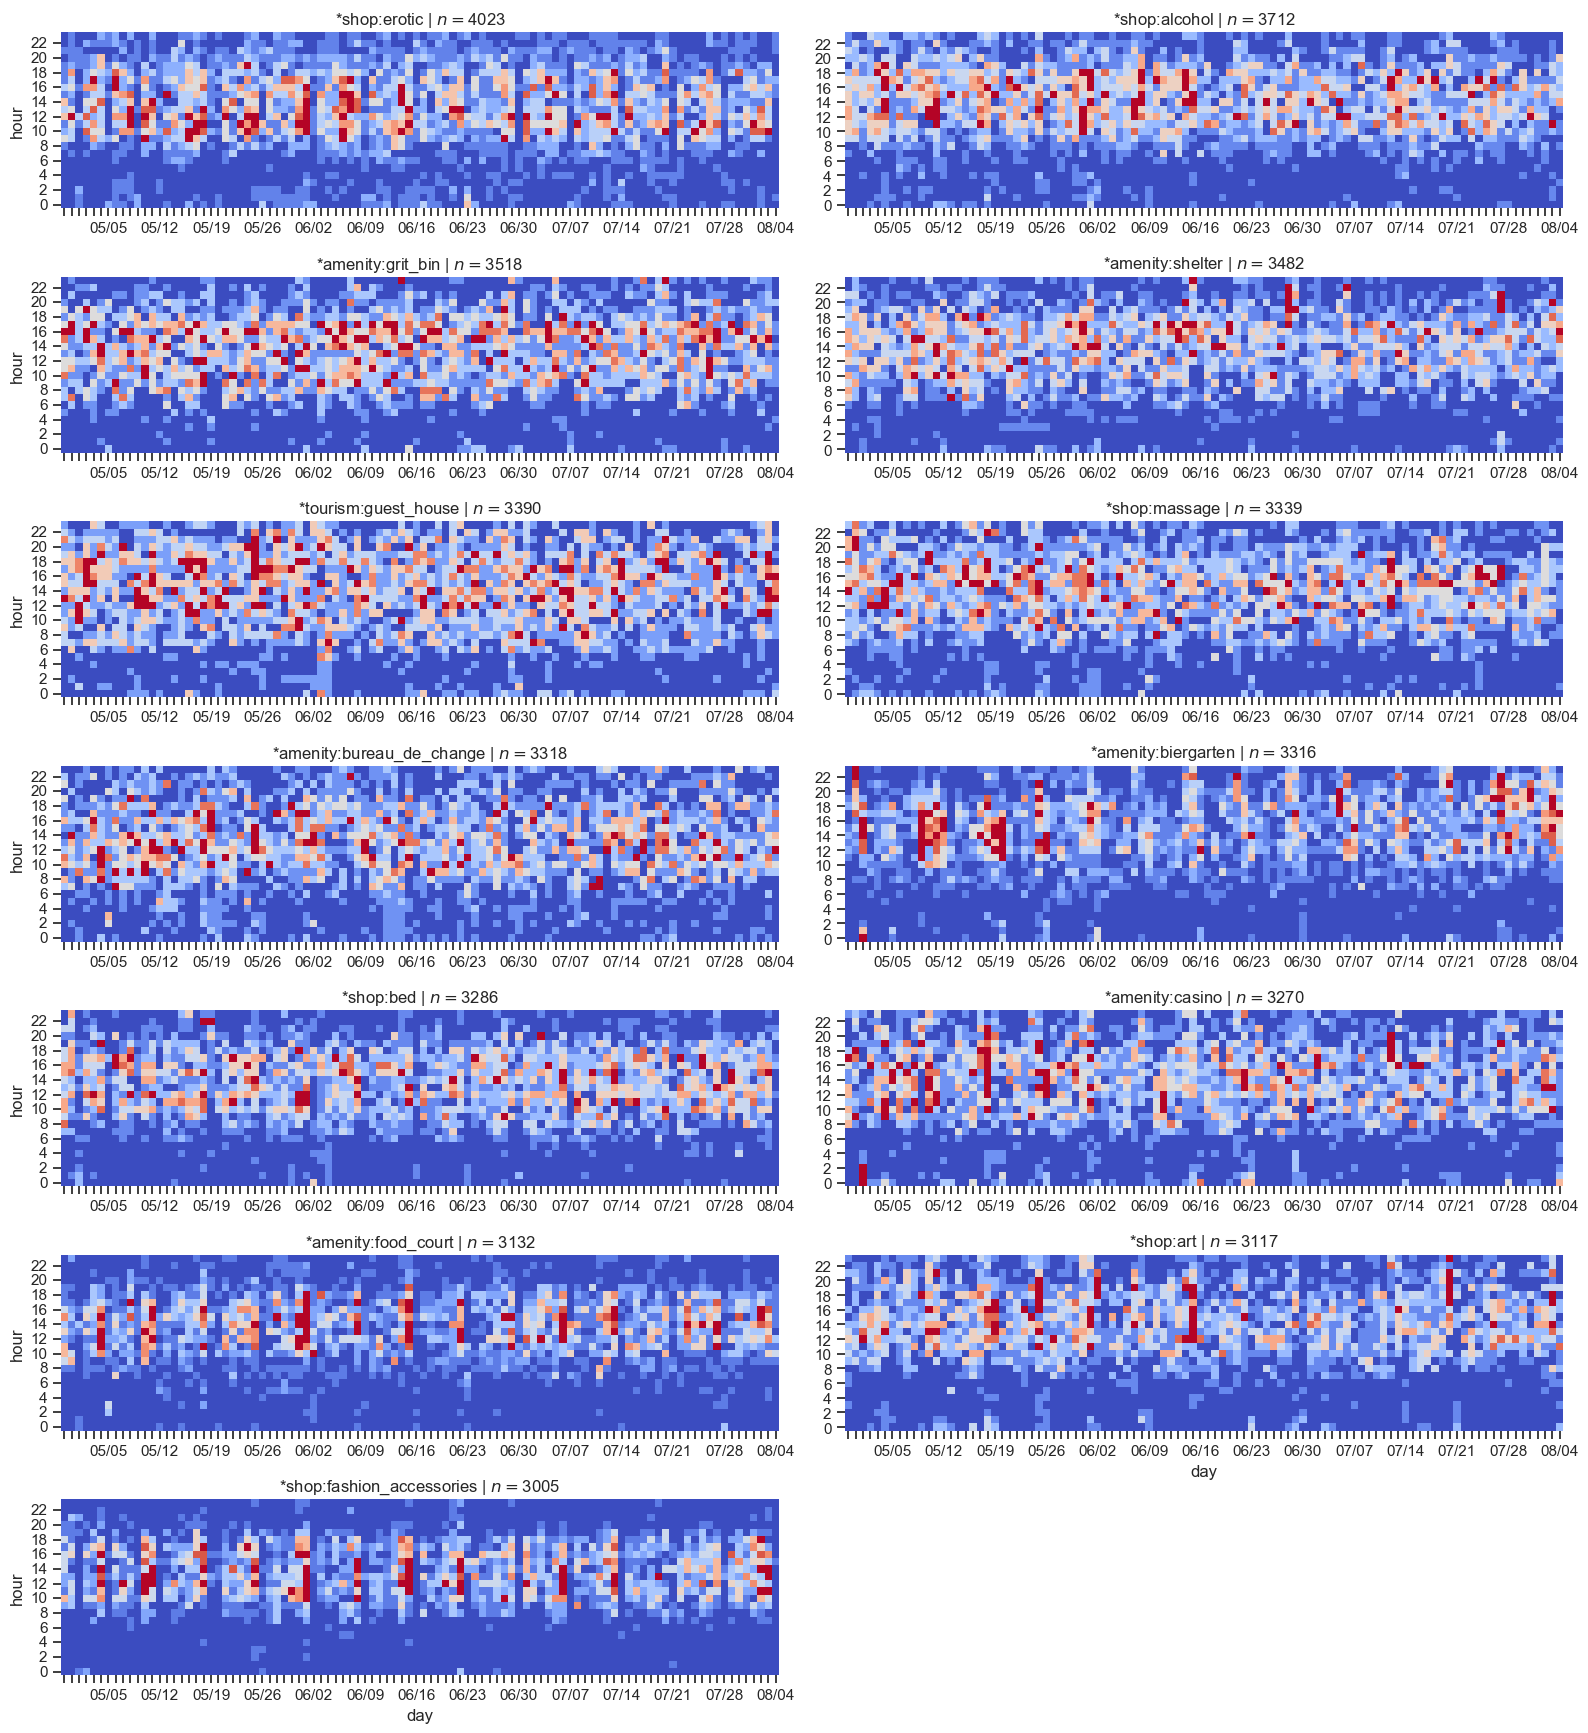

In [24]:
sns.set_theme(style="ticks")

# Function to plot a heatmap inside each facet
def heatmap_func(data, **kwargs):
    pivoted = data.pivot(index="hour", columns="day", values="pair")  # Reshape
    sns.heatmap(pivoted.loc[::-1], cmap="coolwarm", cbar=False, robust=True, square=True, **kwargs)

npan = 18
for idxcnt, (idxi, idxf) in enumerate(zip(range(0,len(mtypes_big),npan), range(npan,len(mtypes_big)+npan,npan))):
    mtypes_here = mtypes_big[idxi:idxf]

    # Create a FacetGrid, grouping by 'category'
    g = sns.FacetGrid(for_heatmap[for_heatmap.venue.isin(mtypes_here)].reset_index().fillna(0),
                      col="venue", margin_titles=True, height=2.5, aspect=3.6, col_wrap=2,
                      col_order=mtypes_here)#['dining','outing','fanzone','shopping'])
    
    # Map the custom heatmap function to each facet
    g.map_dataframe(heatmap_func)
    
    # Set yticks for all subplots
    g.set(yticks=[24-x-.5 for x in range(0,24,2)], xticks=[x+.5 for x in range(len(set(data.day)))])
    g.set_yticklabels(list(range(0,24,2)), rotation=0)
    g.set_xticklabels([str(d.month).zfill(2)+'/'+str(d.day).zfill(2) if d.weekday()==6 else '' for d in sorted(set(data.day))], rotation=0)
    
    for ax, venue in zip(g.axes.flat, mtypes_here):
        ncnt = for_heatmap[for_heatmap.venue==venue].fillna(0).pivot(index="hour", columns="day", values="pair").sum().sum()
        ax.set_title(venue+f' | $n=${int(ncnt)}')
        ax.tick_params(axis="x", labelbottom=True)
        ax.tick_params(axis="y", labelleft=True)
    
    # Modify margin titles
    #g.set_titles(row_template="{row_name}")#, col_template="{col_name}", size=14, fontweight='bold')
    
    g.tight_layout()
    plt.subplots_adjust(wspace=-0.2)
    plt.savefig(f'plots/fig7/contacts_nationwide_poi_heatmap_{idxcnt+1}.jpg', bbox_inches='tight', dpi=300)
    plt.savefig(f'plots/fig7/contacts_nationwide_poi_heatmap_{idxcnt+1}.pdf', bbox_inches='tight')
    plt.show()

In [27]:
dheres = [date(2024,7,5)]

for_to_cluster2 = []
for_base, for_here = [], []
for vtype in mtypes_big[:]:
    
    dist_base = for_heatmap[(for_heatmap.venue==vtype) & (for_heatmap.day>=date(2024,6,10))].copy(deep=True)
    dist_base['wd'] = [d.weekday() for d in dist_base.day]
    dist_base = dist_base.fillna(0).groupby(['wd','hour']).pair.mean().reset_index().rename(columns={'pair':'pair_avg'})

    for_heatmap3 = for_heatmap[(for_heatmap.venue==vtype)].copy(deep=True)
    for_heatmap3['wd'] = [d.weekday() for d in for_heatmap3.day]
    for_heatmap3 = for_heatmap3.merge(dist_base, on=['wd','hour']).fillna(0)
    for_heatmap3['diff'] = (for_heatmap3.pair - for_heatmap3.pair_avg)# / for_heatmap3.pair_avg#.abs()

    for_to_cluster2.append(for_heatmap3[for_heatmap3.day.isin(dheres)].reset_index().rename(columns={'diff':vtype}).sort_values('hour')[vtype])
    for_base.append(for_heatmap3[for_heatmap3.day.isin(dheres)].reset_index().rename(columns={'pair_avg':vtype}).sort_values('hour')[vtype])
    for_here.append(for_heatmap3[for_heatmap3.day.isin(dheres)].reset_index().rename(columns={'pair':vtype}).sort_values('hour')[vtype])

to_cluster2, base, here = pd.concat(for_to_cluster2, axis=1), pd.concat(for_base, axis=1), pd.concat(for_here, axis=1)
to_cluster2.index.name, base.index.name, here.index.name = 'hour', 'hour', 'hour'
to_cluster2

*amenity:restaurant  *shop:bakery  *amenity:fast_food  *shop:clothes  \
hour                                                                         
0                   1.625        -1.375              -3.125         -2.000   
1                   1.000        -0.500              -0.750         -0.375   
2                  -0.500        -0.250               0.000          0.000   
3                  -1.375         2.125              -0.250          0.375   
4                   0.500        -0.875               0.125         -0.625   
5                   5.375        -1.125              -2.000         -1.125   
6                  -3.625         4.000              -0.500         -3.250   
7                   7.500         5.250               6.625          3.250   
8                  -5.250         2.500               3.625         -1.125   
9                   1.625         9.125              -4.750          2.000   
10                 -5.500        -4.375              -0.375         -3.250   
11                  6.625        -7.000              -3.875         16.875   
12                 -5.375       -10.500              -7.250          4.875   
13                 -5.750        -2.250              10.125         -4.625   
14                 -0.375         6.750               1.875        -12.375   
15                 10.625        15.875              17.000          9.625   
16                 15.250       -18.375             -15.750          0.625   
17                 21.625       -34.375             -15.750        -23.750   
18                -20.625       -49.875             -40.625        -31.750   
19                -16.875       -20.625             -31.750        -21.500   
20                  5.375       -10.875              -1.500         -8.000   
21                  8.375        -4.375               6.500         11.500   
22                 -8.000        -6.250              -1.875         -6.250   
23                  4.000         5.750              13.125          3.250   

      *amenity:atm  *shop:supermarket  *amenity:toilets  *amenity:cafe  \
hour                                                                     
0            1.250              1.125             0.000         -1.875   
1            1.375              1.750             0.875          2.625   
2            1.875              1.500             2.500          3.750   
3            1.000              2.375            -0.125          0.500   
4           -0.375              0.750            -0.750         -0.750   
5            1.000              0.125            -0.375          1.250   
6           -1.250             -3.250            -2.750          0.250   
7            6.125              4.875             2.625          2.250   
8           10.625              4.125            12.500          2.500   
9           -4.625             19.125            -7.125          6.500   
10          -0.875              6.000             1.625          5.750   
11         -14.375             12.250           -10.375         12.750   
12         -12.125             -5.000            -5.000          5.875   
13          -4.250              8.250           -22.375         -9.375   
14          -6.625             -5.125           -12.375         -2.125   
15           9.250              9.000            15.125        -14.125   
16          -8.000             -0.375            -4.125         -1.750   
17           4.125            -21.500            -5.875          4.750   
18         -12.750            -46.875           -18.375        -18.625   
19           9.250            -20.000           -12.000         -2.500   
20           5.000             -2.250           -10.625         -1.500   
21           3.250              6.750            -8.375          7.875   
22          -3.625             -2.500            -5.000         -1.875   
23          -3.375             -1.375             1.375          4.375   

      *amenity:vending_machine  *amenity:pharmacy  .

In [30]:
# normalize the vectors
scaler = StandardScaler()
normalized = scaler.fit_transform(to_cluster2)
to_cluster3 = pd.DataFrame(normalized, index=to_cluster2.index, columns=to_cluster2.columns)
to_cluster3

*amenity:restaurant  *shop:bakery  *amenity:fast_food  *shop:clothes  \
hour                                                                         
0                0.104839      0.265343           -0.012967       0.076971   
1                0.035714      0.328217            0.177770       0.229931   
2               -0.130185      0.346181            0.238003       0.265230   
3               -0.226959      0.516838            0.217925       0.300528   
4               -0.019585      0.301271            0.248042       0.206399   
5                0.519587      0.283307            0.077382       0.159334   
6               -0.475808      0.651568            0.197848      -0.040691   
7                0.754611      0.741388            0.770059       0.571151   
8               -0.655532      0.543784            0.529128       0.159334   
9                0.104839      1.019830           -0.143471       0.453489   
10              -0.683182      0.049775            0.207887      -0.040691   
11               0.657836     -0.138847           -0.073199       1.853667   
12              -0.669357     -0.390342           -0.344247       0.724112   
13              -0.710832      0.202469            1.051145      -0.170120   
14              -0.116360      0.849172            0.388585      -0.899624   
15               1.100234      1.504857            1.603278       1.171227   
16               1.611757     -0.956207           -1.026884       0.324061   
17               2.316828     -2.105902           -1.026884      -1.970348   
18              -2.355999     -3.219668           -3.024603      -2.723385   
19              -1.941251     -1.117883           -2.311849      -1.758557   
20               0.519587     -0.417288            0.117537      -0.487807   
21               0.851385      0.049775            0.760020       1.347720   
22              -0.959681     -0.084955            0.087421      -0.323080   
23               0.367513      0.777316            1.292076       0.571151   

      *amenity:atm  *shop:supermarket  *amenity:toilets  *amenity:cafe  \
hour                                                                     
0         0.301732           0.187209          0.445881      -0.321906   
1         0.320542           0.236260          0.551089       0.353159   
2         0.395779           0.216640          0.746476       0.521926   
3         0.264114           0.285310          0.430852       0.034378   
4         0.057212           0.157779          0.355703      -0.153140   
5         0.264114           0.108729          0.400792       0.146889   
6        -0.074453          -0.156144          0.115228      -0.003125   
7         1.035295           0.481512          0.761505       0.296904   
8         1.712429           0.422652          1.948853       0.334408   
9        -0.582304           1.599863         -0.410812       0.934466   
10       -0.018026           0.569803          0.641268       0.821955   
11       -2.049429           1.060308         -0.801585       1.872058   
12       -1.710862          -0.293485         -0.155307       0.840707   
13       -0.525876           0.746385         -2.244437      -1.447016   
14       -0.883253          -0.303295         -1.042060      -0.359410   
15        1.505527           0.805245          2.264477      -2.159586   
16       -1.090155           0.069488         -0.050099      -0.303155   
17        0.734346          -1.588418         -0.260515       0.671941   
18       -1.804908          -3.579867         -1.763486      -2.834652   
19        1.505527          -1.470697         -0.996971      -0.415666   
20        0.866011          -0.077663         -0.831644      -0.265651   
21        0.602681           0.628664         -0.561109       1.140736   
22       -0.431830          -0.097283         -0.155307      -0.321906   
23       -0.394211          -0.008993          0.611208       0.615685   

      *amenity:vending_machine  *amenity:pharmacy  .

C:\Users\steven.schulz\AppData\Local\anaconda3\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
C:\Users\steven.schulz\AppData\Local\anaconda3\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


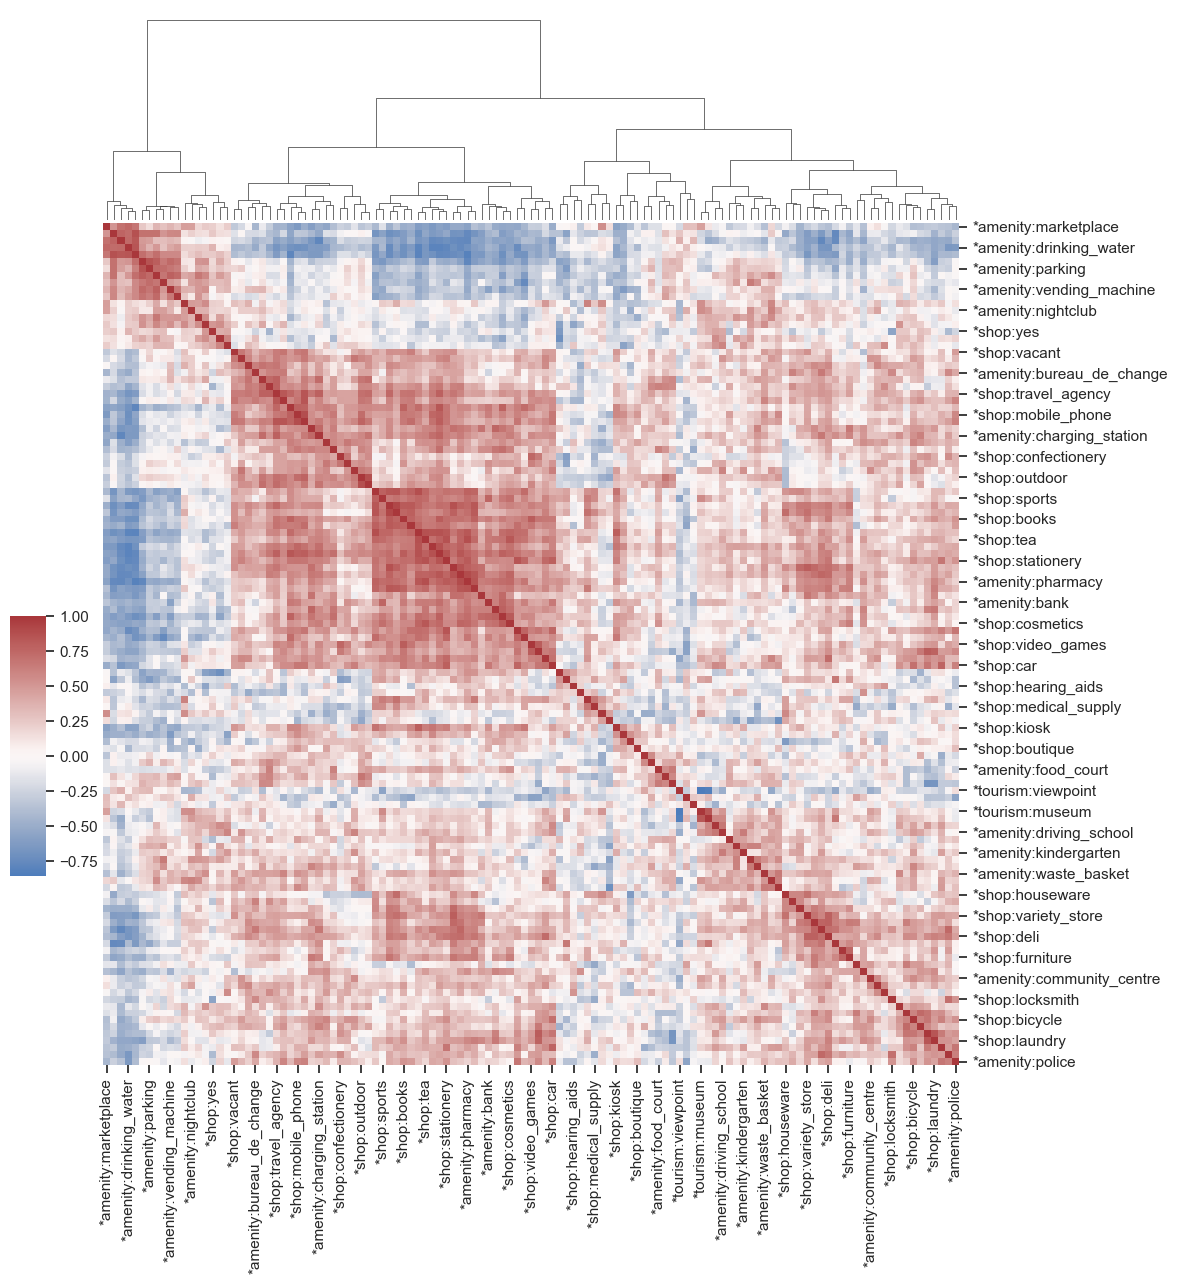

In [31]:
# Draw the full plot
sns.set_theme(style="ticks")
g = sns.clustermap(to_cluster3.corr(), center=0, cmap="vlag",
                   method='ward',# 'average','single','complete','weighted','centroid','median','ward'
                   metric='euclidean',# 'euclidean','cityblock','cosine','correlation','hamming','jaccard','chebyshev','canberra','braycurtis','matching'
                   #row_colors=row_cols, col_colors=row_cols,
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(.02, .32, .03, .2),
                   linewidths=0., figsize=(12, 13))

g.ax_row_dendrogram.remove()

In [34]:
# get clusters at desired dendrogram depth
depth = 3# no. of clusters
linkagemat = g.dendrogram_row.linkage
cluster_labels = fcluster(linkagemat, t=depth, criterion='maxclust')# Map the cluster labels to the original row labels
row_labels = pd.DataFrame(pd.Series(cluster_labels, index=to_cluster3.corr().index), columns=['cluster'])
#row_cats = pd.DataFrame(row_cols).rename(columns={'day':'category'})
cats_clus = row_labels.reset_index(names='venue')#.join(row_cats).rename(columns={'cat_label':'color'}).reset_index()
cats_clus

venue  cluster
0          *amenity:restaurant        3
1                 *shop:bakery        2
2           *amenity:fast_food        2
3                *shop:clothes        2
4                 *amenity:atm        3
..                         ...      ...
116                  *shop:bed        3
117            *amenity:casino        3
118        *amenity:food_court        3
119                  *shop:art        3
120  *shop:fashion_accessories        2

[121 rows x 2 columns]

In [35]:
for cl_h in range(1,1+depth):
    print(cl_h)
    mtypes_h = cats_clus[cats_clus.cluster==cl_h].venue.tolist()
    print(' '.join(sorted([str(y).split(':')[1] if ':' in str(y) else str(y) for y in mtypes_h])))
    print()

1
artwork bar bench bicycle_parking biergarten drinking_water fanzone fountain ice_cream information marketplace massage nightclub parking pub telephone vending_machine yes

2
alcohol bag bakery bank beauty books bureau_de_change butcher car car_rental charging_station chemist clothes confectionery cosmetics dentist doityourself dry_cleaning electronics fashion_accessories fast_food florist gift greengrocer guest_house hairdresser jewelry mobile_phone newsagent optician outdoor parking_entrance perfumery pet pharmacy post_office shoes sports stationery supermarket tea toilets toys travel_agency vacant video_games

3
art atm attraction bed beverages bicycle bicycle_rental boutique cafe car_repair car_wash casino cinema clock coffee community_centre compressed_air computer convenience deli department_store doctors driving_school erotic food_court fuel furniture grit_bin hearing_aids hotel houseware interior_decoration kindergarten kiosk laundry library locksmith medical_supply museum pho

In [36]:
weights = for_heatmap[for_heatmap.day.isin(dheres)].groupby(['venue','day']).pair.sum().reset_index()
for cl_h in range(1,1+depth):
    print(cl_h)
    mtypes_h = cats_clus[cats_clus.cluster==cl_h].venue.tolist()
    for _, row in weights[weights.venue.isin(mtypes_h)].sort_values('pair', ascending=False).iterrows():
        print(row.venue, row.pair)
    print()

1
*amenity:bench 1002.0
*amenity:vending_machine 929.0
*amenity:bicycle_parking 888.0
*tourism:information 768.0
*amenity:telephone 639.0
*amenity:parking 565.0
*tourism:artwork 369.0
*amenity:pub 321.0
*amenity:fountain 319.0
*amenity:ice_cream 310.0
fanzone 237.0
*amenity:bar 220.0
*shop:yes 153.0
*amenity:drinking_water 127.0
*amenity:marketplace 71.0
*amenity:biergarten 65.0
*amenity:nightclub 51.0
*shop:massage 48.0

2
*shop:bakery 1348.0
*shop:supermarket 1155.0
*amenity:fast_food 1126.0
*shop:clothes 1037.0
*amenity:pharmacy 941.0
*amenity:toilets 825.0
*shop:hairdresser 803.0
*shop:shoes 614.0
*shop:chemist 609.0
*shop:optician 454.0
*amenity:bank 447.0
*shop:florist 411.0
*amenity:post_office 385.0
*shop:mobile_phone 376.0
*shop:butcher 371.0
*shop:travel_agency 336.0
*shop:electronics 310.0
*shop:books 310.0
*shop:jewelry 302.0
*shop:beauty 283.0
*amenity:charging_station 256.0
*shop:sports 248.0
*shop:gift 226.0
*shop:stationery 220.0
*amenity:parking_entrance 206.0
*shop:ne

In [37]:
cats = [cats_clus[cats_clus.venue==s].cluster.iloc[0] for s in to_cluster3.columns.tolist()]
cl_labels = ['socializing', 'shopping', 'routine']
clist = sns.husl_palette(depth, s=1.)
cat2col = dict(zip(list(set(cats)), clist))
row_cols2 = pd.DataFrame(cats, index=to_cluster3.columns, columns=['venue']).venue.map(cat2col)
for c in clist:
    print([255*n for n in c])
clist

[254.26340297044828, 106.37566455569254, 134.30077726974963]
[67.04651351911077, 178.45102737518908, 9.115772063822778]
[13.411396690758155, 164.05488527735656, 244.72605259440647]


[(0.9971113841978364, 0.4171594688458531, 0.5266697147833319),
 (0.2629275039965128, 0.6998079504909376, 0.03574812574048148),
 (0.05259371251277708, 0.6433524912837513, 0.959710010174143)]

C:\Users\steven.schulz\AppData\Local\anaconda3\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
C:\Users\steven.schulz\AppData\Local\anaconda3\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


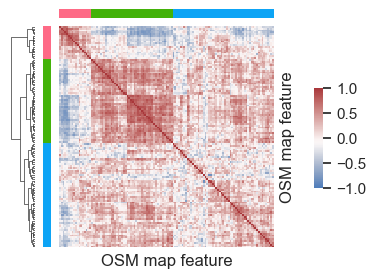

In [41]:
# Draw the full plot
cnorm = TwoSlopeNorm(vmin=-1., vcenter=0., vmax=1.)
g = sns.clustermap(to_cluster3.corr(), center=0, cmap="vlag", norm=cnorm,
                   method='ward',# 'average','single','complete','weighted','centroid','median','ward'
                   metric='euclidean',# 'euclidean','cityblock','cosine','correlation','hamming','jaccard','chebyshev','canberra','braycurtis','matching'
                   row_colors=row_cols2, col_colors=row_cols2,
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(.7,.475,.02,.2),#(.775, .425, .02, .2),#cbar_pos=(.02, .32, .03, .2),
                   linewidths=0., figsize=(4.6,5),#(7,7.55),# square=True, 
                  )

#g.ax_row_dendrogram.remove()
g.ax_col_dendrogram.remove()
g.ax_heatmap.set_xticks([])
g.ax_heatmap.set_yticks([])
g.ax_heatmap.set_xlabel('OSM map feature')
g.ax_heatmap.set_ylabel('OSM map feature')
g.ax_row_colors.set_xticks([])
g.ax_col_colors.set_yticks([])
g.cax.set_ylim([-1,1])
g.cax.set_yticks([-1,-.5,0,.5,1])

plt.savefig(f'plots/fig7/contacts_nationwide_poi_clustering.jpg', bbox_inches='tight', dpi=300)
plt.savefig(f'plots/fig7/contacts_nationwide_poi_clustering.pdf', bbox_inches='tight')
plt.show()

In [42]:
changes = pd.DataFrame()
for cl_h, c in zip(range(1,1+depth), sns.color_palette(None, depth)):
    nom = to_cluster2[cats_clus[cats_clus.cluster==cl_h].venue.tolist()].sum(axis=1)
    denom = base[cats_clus[cats_clus.cluster==cl_h].venue.tolist()].sum().sum()
    frac = nom.div(denom)
    print(f'cluster {cl_h}: {frac.sum()}')
    changes_tmp = frac.reset_index().rename(columns={0:'change_rel'})
    changes_tmp['cluster'] = cl_h
    changes = pd.concat([changes, changes_tmp])
changes

cluster 1: 0.19082750068310317
cluster 2: -0.07146459402533449
cluster 3: 0.024764783842101224


hour  change_rel  cluster
0      0   -0.000504        1
1      1    0.001513        1
2      2    0.000315        1
3      3   -0.000378        1
4      4    0.000715        1
..   ...         ...      ...
19    19   -0.009650        3
20    20    0.001928        3
21    21    0.010997        3
22    22    0.000394        3
23    23    0.001862        3

[72 rows x 3 columns]

In [43]:
clus2label = {cl_h: cl_lab for cl_h, cl_lab in zip(range(1,depth+1), cl_labels)}
for_heatmap7 = for_heatmap.merge(cats_clus, on='venue').groupby(['cluster','day','hour']).pair.sum().reset_index()
for_heatmap7['cluster_label'] = for_heatmap7.cluster.map(clus2label)
for_heatmap7

cluster         day  hour   pair cluster_label
0           1  2024-04-29     0    0.0   socializing
1           1  2024-04-29     1    0.0   socializing
2           1  2024-04-29     2   12.0   socializing
3           1  2024-04-29     3   11.0   socializing
4           1  2024-04-29     4   10.0   socializing
...       ...         ...   ...    ...           ...
7051        3  2024-08-04    19  357.0       routine
7052        3  2024-08-04    20  311.0       routine
7053        3  2024-08-04    21  182.0       routine
7054        3  2024-08-04    22   58.0       routine
7055        3  2024-08-04    23   34.0       routine

[7056 rows x 5 columns]

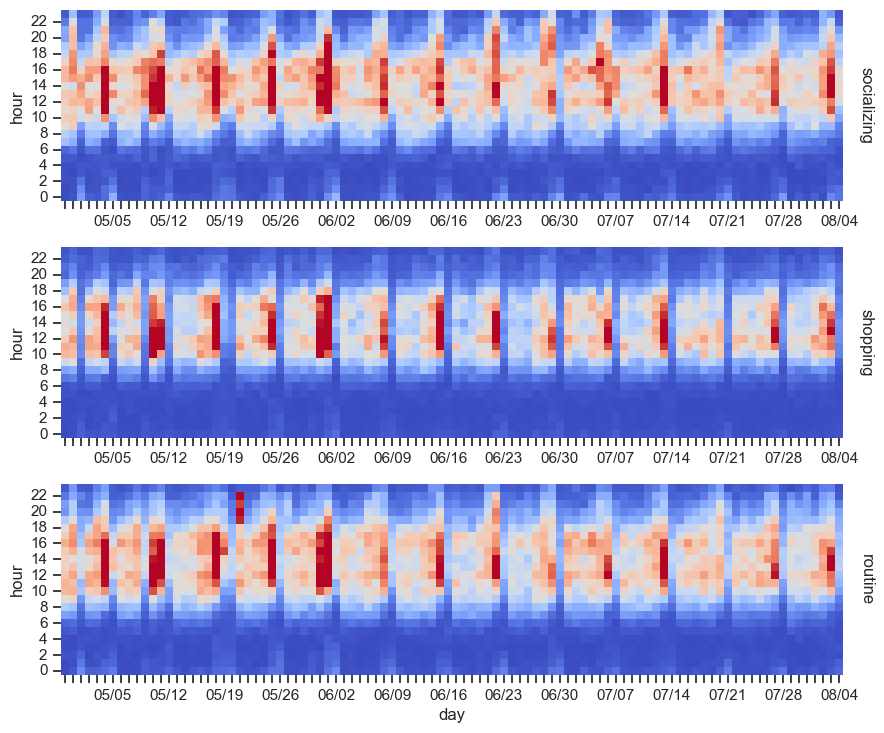

In [44]:
sns.set_theme(style="ticks")

# Function to plot a heatmap inside each facet
def heatmap_func(data, **kwargs):
    pivoted = data.pivot(index="hour", columns="day", values="pair")  # Reshape
    sns.heatmap(pivoted.loc[::-1], cmap="coolwarm", cbar=False, robust=True, square=True, **kwargs)

# Create a FacetGrid, grouping by 'category'
g = sns.FacetGrid(for_heatmap7.reset_index().fillna(0), row="cluster_label", margin_titles=True, height=2.5, aspect=3.6,
                 )#row_order=mtypes_big)#['dining','outing','fanzone','shopping'])

# Map the custom heatmap function to each facet
g.map_dataframe(heatmap_func)

# Set yticks for all subplots
g.set(yticks=[24-x-.5 for x in range(0,24,2)], xticks=[x+.5 for x in range(len(set(data.day)))])
g.set_yticklabels(list(range(0,24,2)), rotation=0)
g.set_xticklabels([str(d.month).zfill(2)+'/'+str(d.day).zfill(2) if d.weekday()==6 else '' for d in sorted(set(data.day))], rotation=0)

for ax in g.axes.flat:
    #ax.set_title(ax.get_title().split('=')[1][1:])
    ax.tick_params(axis="x", labelbottom=True)

# Modify margin titles
g.set_titles(row_template="{row_name}")#, col_template="{col_name}", size=14, fontweight='bold')

g.tight_layout()
plt.savefig(f'plots/fig7/contacts_nationwide_poi_clustering2.jpg', bbox_inches='tight', dpi=300)
plt.savefig(f'plots/fig7/contacts_nationwide_poi_clustering2.pdf', bbox_inches='tight')
plt.show()

In [45]:
for_andrzej = for_heatmap7.copy(deep=True)
for_andrzej['pair'] = for_andrzej.pair.astype(int)
#for_andrzej.to_csv('output/07_poi_contacts_clustered_for_andrzej.csv', index=False)
for_andrzej

cluster         day  hour  pair cluster_label
0           1  2024-04-29     0     0   socializing
1           1  2024-04-29     1     0   socializing
2           1  2024-04-29     2    12   socializing
3           1  2024-04-29     3    11   socializing
4           1  2024-04-29     4    10   socializing
...       ...         ...   ...   ...           ...
7051        3  2024-08-04    19   357       routine
7052        3  2024-08-04    20   311       routine
7053        3  2024-08-04    21   182       routine
7054        3  2024-08-04    22    58       routine
7055        3  2024-08-04    23    34       routine

[7056 rows x 5 columns]

In [46]:
3*98*24

7056

In [92]:
dist_base8 = for_heatmap7[(for_heatmap7.day>=date(2024,6,10)) & (for_heatmap7.day!=date(2024,7,5))].copy(deep=True)
dist_base8['wd'] = [d.weekday() for d in dist_base8.day]
dist_base9 = dist_base8.copy(deep=True)
dist_base8 = dist_base8.fillna(0).groupby(['cluster','wd','hour']).pair.mean().reset_index().rename(columns={'pair':'pair_avg'})
#dist_base9 = dist_base9.fillna(0).groupby(['cluster','wd','hour']).pair.std().reset_index().rename(columns={'pair':'pair_std'})
dist_base8

cluster  wd  hour  pair_avg
0          1   0     0    21.625
1          1   0     1    10.500
2          1   0     2     9.500
3          1   0     3     5.500
4          1   0     4    11.750
..       ...  ..   ...       ...
499        3   6    19   306.000
500        3   6    20   269.000
501        3   6    21   188.875
502        3   6    22   103.125
503        3   6    23    53.375

[504 rows x 4 columns]

In [93]:
for_heatmap8 = for_heatmap7.copy(deep=True)
for_heatmap8['wd'] = [d.weekday() for d in for_heatmap8.day]
for_heatmap8 = for_heatmap8.merge(dist_base8, on=['cluster','wd','hour']).fillna(0)
for_heatmap8['diff'] = (for_heatmap8.pair - for_heatmap8.pair_avg)
for_heatmap8

cluster         day  hour  pair cluster_label  wd  pair_avg    diff
0           1  2024-04-29     0   0.0   socializing   0    21.625 -21.625
1           1  2024-05-06     0  15.0   socializing   0    21.625  -6.625
2           1  2024-05-13     0  20.0   socializing   0    21.625  -1.625
3           1  2024-05-20     0  66.0   socializing   0    21.625  44.375
4           1  2024-05-27     0  15.0   socializing   0    21.625  -6.625
...       ...         ...   ...   ...           ...  ..       ...     ...
7051        3  2024-07-07    23  57.0       routine   6    53.375   3.625
7052        3  2024-07-14    23  78.0       routine   6    53.375  24.625
7053        3  2024-07-21    23  37.0       routine   6    53.375 -16.375
7054        3  2024-07-28    23  44.0       routine   6    53.375  -9.375
7055        3  2024-08-04    23  34.0       routine   6    53.375 -19.375

[7056 rows x 8 columns]

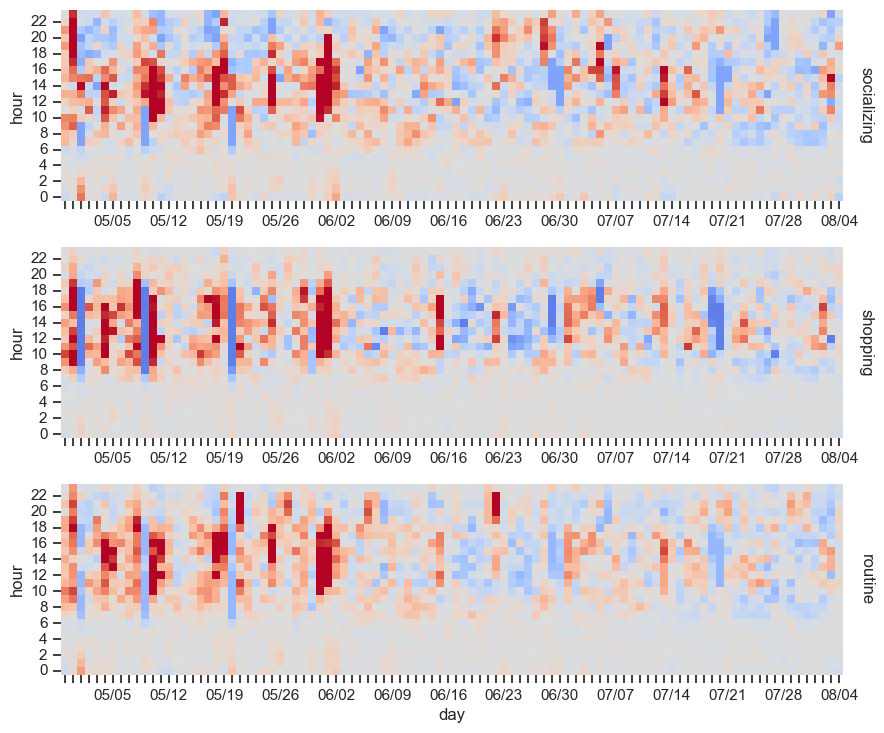

In [94]:
sns.set_theme(style="ticks")

# Function to plot a heatmap inside each facet
def heatmap_func(data, **kwargs):
    pivoted = data.pivot(index="hour", columns="day", values="diff")  # Reshape
    sns.heatmap(pivoted.loc[::-1], cmap="coolwarm", cbar=False, robust=True, square=True, center=0, **kwargs)

# Create a FacetGrid, grouping by 'category'
g = sns.FacetGrid(for_heatmap8.reset_index().fillna(0), row="cluster_label", margin_titles=True, height=2.5, aspect=3.6,
                 )#row_order=mtypes_big)#['dining','outing','fanzone','shopping'])

# Map the custom heatmap function to each facet
g.map_dataframe(heatmap_func)

# Set yticks for all subplots
g.set(yticks=[24-x-.5 for x in range(0,24,2)], xticks=[x+.5 for x in range(len(set(data.day)))])
g.set_yticklabels(list(range(0,24,2)), rotation=0)
g.set_xticklabels([str(d.month).zfill(2)+'/'+str(d.day).zfill(2) if d.weekday()==6 else '' for d in sorted(set(data.day))], rotation=0)

for ax in g.axes.flat:
    #ax.set_title(ax.get_title().split('=')[1][1:])
    ax.tick_params(axis="x", labelbottom=True)

# Modify margin titles
g.set_titles(row_template="{row_name}")#, col_template="{col_name}", size=14, fontweight='bold')

g.tight_layout()
#plt.savefig(f'plots/fig7/contacts_nationwide_poi_clustering4.jpg', bbox_inches='tight', dpi=300)
#plt.savefig(f'plots/fig7/contacts_nationwide_poi_clustering4.pdf', bbox_inches='tight')
plt.show()

In [103]:
norm_h = for_heatmap8[(for_heatmap8.day>=date(2024,6,10))].groupby(['cluster_label','wd','hour'])\
            .pair.mean().reset_index().rename(columns={'pair':'pair_avgsum'}).groupby(['cluster_label','wd']).pair_avgsum.sum().reset_index()
for_heatmap9 = for_heatmap8.merge(norm_h, on=['cluster_label','wd'])
for_heatmap9['rel_diff'] = for_heatmap9['diff'] / for_heatmap9.pair_avgsum
for_heatmap9 = for_heatmap9[(for_heatmap9.day >= date(2024,6,10))]# & (for_heatmap9.day <= date(2024,7,14))]
for_heatmap9

cluster         day  hour  pair cluster_label  wd  pair_avg    diff  \
6           1  2024-06-10     0  36.0   socializing   0    21.625  14.375   
7           1  2024-06-17     0  24.0   socializing   0    21.625   2.375   
8           1  2024-06-24     0  26.0   socializing   0    21.625   4.375   
9           1  2024-07-01     0  12.0   socializing   0    21.625  -9.625   
10          1  2024-07-08     0  17.0   socializing   0    21.625  -4.625   
...       ...         ...   ...   ...           ...  ..       ...     ...   
7051        3  2024-07-07    23  57.0       routine   6    53.375   3.625   
7052        3  2024-07-14    23  78.0       routine   6    53.375  24.625   
7053        3  2024-07-21    23  37.0       routine   6    53.375 -16.375   
7054        3  2024-07-28    23  44.0       routine   6    53.375  -9.375   
7055        3  2024-08-04    23  34.0       routine   6    53.375 -19.375   

      pair_avgsum  rel_diff  
6         4282.25  0.003357  
7         4282.25  0.000555  
8         4282.25  0.001022  
9         4282.25 -0.002248  
10        4282.25 -0.001080  
...           ...       ...  
7051      5440.00  0.000666  
7052      5440.00  0.004527  
7053      5440.00 -0.003010  
7054      5440.00 -0.001723  
7055      5440.00 -0.003562  

[4032 rows x 10 columns]

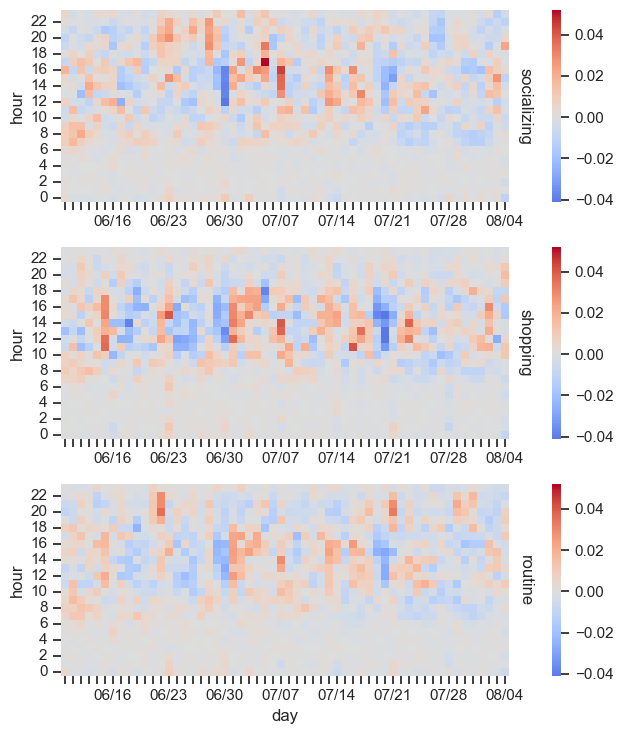

In [104]:
sns.set_theme(style="ticks")

# Function to plot a heatmap inside each facet
def heatmap_func(data, **kwargs):
    pivoted = data.pivot(index="hour", columns="day", values="rel_diff")  # Reshape
    sns.heatmap(pivoted.loc[::-1], cmap="coolwarm", cbar=True, robust=False, square=True, center=0,
                vmin=.9*for_heatmap9.rel_diff.min(), vmax=.9*for_heatmap9.rel_diff.max(),
                **kwargs)

# Create a FacetGrid, grouping by 'category'
g = sns.FacetGrid(for_heatmap9.reset_index().fillna(0), row="cluster_label", margin_titles=True, height=2.5, aspect=3.6,
                 )#row_order=mtypes_big)#['dining','outing','fanzone','shopping'])

# Map the custom heatmap function to each facet
g.map_dataframe(heatmap_func)

# Set yticks for all subplots
g.set(yticks=[24-x-.5 for x in range(0,24,2)], xticks=[x+.5 for x in range(len(set(for_heatmap9.day)))])
g.set_yticklabels(list(range(0,24,2)), rotation=0)
g.set_xticklabels([str(d.month).zfill(2)+'/'+str(d.day).zfill(2) if d.weekday()==6 else '' for d in sorted(set(for_heatmap9.day))], rotation=0)

for ax in g.axes.flat:
    #ax.set_title(ax.get_title().split('=')[1][1:])
    ax.tick_params(axis="x", labelbottom=True)

# Modify margin titles
g.set_titles(row_template="{row_name}")#, col_template="{col_name}", size=14, fontweight='bold')

g.tight_layout()
#plt.savefig(f'plots/fig7/contacts_nationwide_poi_clustering4_extract.jpg', bbox_inches='tight', dpi=300)
#plt.savefig(f'plots/fig7/contacts_nationwide_poi_clustering4_extract.pdf', bbox_inches='tight')
plt.show()

In [105]:
for_heatmap9[for_heatmap9.day==date(2024,7,5)].groupby(['cluster_label','day']).rel_diff.sum()#.apply(len)

cluster_label  day       
routine        2024-07-05    0.028303
shopping       2024-07-05   -0.081674
socializing    2024-07-05    0.218089
Name: rel_diff, dtype: float64

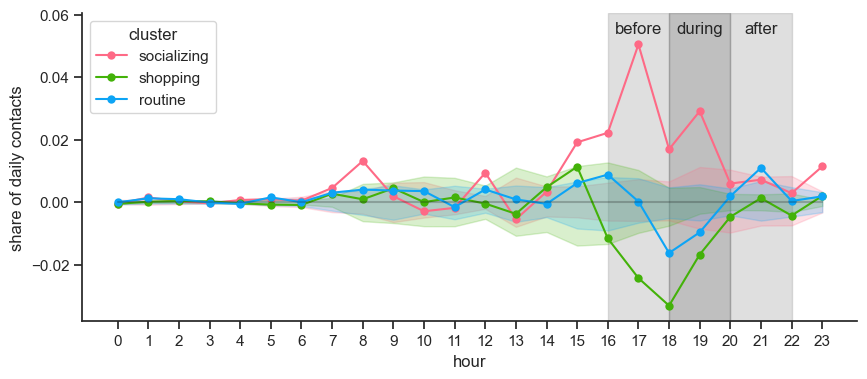

In [106]:
fig, ax = plt.subplots(figsize=[10,4])

# Plot the responses for different events and regions
g = sns.lineplot(data=changes, x="hour", y="change_rel", hue="cluster",# style="event",
                 marker="o", palette=clist, markeredgecolor='none',
                )
g = sns.lineplot(data=for_heatmap9[(for_heatmap9.day!=date(2024,7,5)) & (for_heatmap9.wd==4)], x="hour", y="rel_diff",
                 hue="cluster", palette=clist, # style="event",
                 marker="o", markeredgecolor='none', legend=False, errorbar=('ci',95),
                 lw=0, ms=0, err_style='band',
                )
ax.plot([0,23], [0,0], c='k', alpha=.25)
yu, yo = changes.change_rel.min()-.005, changes.change_rel.max()+.01
ax.fill_between([16,18], [yu,yu], [yo,yo], color='gray', zorder=0, alpha=.25)
ax.fill_between([18,20], [yu,yu], [yo,yo], color='gray', zorder=0, alpha=.5)
ax.fill_between([20,22], [yu,yu], [yo,yo], color='gray', zorder=0, alpha=.25)
ax.text(17, yo-.005, 'before', va='center', ha='center')#, fontsize=8)
ax.text(19, yo-.005, 'during', va='center', ha='center')#, fontsize=8)
ax.text(21, yo-.005, 'after', va='center', ha='center')#, fontsize=8)

g.set(ylabel='share of daily contacts')
g.set(xticks=range(24), ylim=[yu,yo])
sns.despine()

# Get the legend object
ax.legend(loc='upper left', title='cluster')
legend = ax.get_legend()
for text, new_label in zip(legend.texts, cl_labels):
    text.set_text(new_label)

#plt.savefig(f'plots/fig7/contacts_nationwide_poi_clustering3.jpg', bbox_inches='tight', dpi=300)
#plt.savefig(f'plots/fig7/contacts_nationwide_poi_clustering3.pdf', bbox_inches='tight')
plt.show()

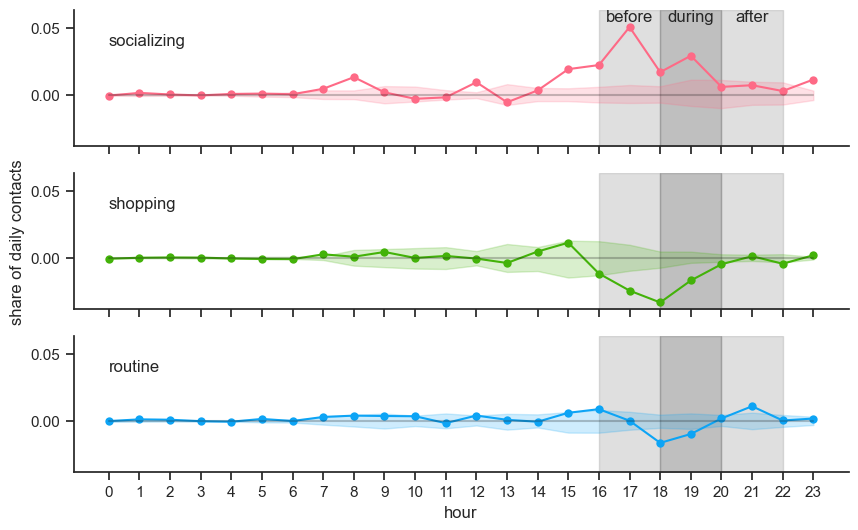

In [109]:
fig, ax = plt.subplots(figsize=[10,2*depth], nrows=depth)

for r in range(depth):
    # Plot the responses for different events and regions
    changes_r = changes[changes.cluster==r+1]
    for_heatmap9_r = for_heatmap9[(for_heatmap9.day!=date(2024,7,5)) & (for_heatmap9.wd==4) & (for_heatmap9.cluster==r+1)]
    g = sns.lineplot(ax=ax[r], data=changes_r, x="hour", y="change_rel", hue="cluster",# style="event",
                     marker="o", palette=[clist[r]], markeredgecolor='none', legend=False,
                    )
    g = sns.lineplot(ax=ax[r], data=for_heatmap9_r, x="hour", y="rel_diff",
                     hue="cluster", palette=[clist[r]], # style="event",
                     marker="o", markeredgecolor='none', legend=False, errorbar=('ci',95),
                     lw=0, ms=0, err_style='band',
                    )
    ax[r].plot([0,23], [0,0], c='k', alpha=.25)
    yu, yo = changes.change_rel.min()-.005, changes.change_rel.max()+.0125
    ax[r].fill_between([16,18], [yu,yu], [yo,yo], color='gray', zorder=0, alpha=.25)
    ax[r].fill_between([18,20], [yu,yu], [yo,yo], color='gray', zorder=0, alpha=.5)
    ax[r].fill_between([20,22], [yu,yu], [yo,yo], color='gray', zorder=0, alpha=.25)
    if r==0:
        ax[r].text(17, yo-.005, 'before', va='center', ha='center')#, fontsize=8)
        ax[r].text(19, yo-.005, 'during', va='center', ha='center')#, fontsize=8)
        ax[r].text(21, yo-.005, 'after', va='center', ha='center')#, fontsize=8)

    if r==1:
        g.set(ylabel='share of daily contacts')
    else:
        g.set(ylabel='')
    g.set(xticks=range(24), ylim=[yu,yo])
    if r<depth-1:
        g.set(xlabel='', xticklabels=[])
    sns.despine()
    
    # Get the legend object
    ax[r].text(0, .04, cl_labels[r], ha='left', va='center')
    #ax[r].legend(loc='upper left', title='cluster')
    #legend = ax[r].get_legend()
    #for text, new_label in zip(legend.texts, cl_labels):
    #    text.set_text(new_label)

plt.savefig(f'plots/fig7/contacts_nationwide_poi_clustering5.jpg', bbox_inches='tight', dpi=300)
plt.savefig(f'plots/fig7/contacts_nationwide_poi_clustering5.pdf', bbox_inches='tight')
plt.show()

In [112]:
for_heatmap9[for_heatmap9.day!=date(2024,7,5)].groupby(['cluster','wd']).rel_diff.sum().reset_index()

cluster  wd      rel_diff
0         1   0 -9.324139e-18
1         1   1 -2.168404e-18
2         1   2 -1.127570e-17
3         1   3  3.903128e-18
4         1   4  4.727121e-17
5         1   5 -1.734723e-18
6         1   6 -1.127570e-17
7         2   0  1.301043e-18
8         2   1  8.673617e-19
9         2   2  0.000000e+00
10        2   3 -8.673617e-19
11        2   4 -3.008661e-17
12        2   5  6.071532e-18
13        2   6 -8.673617e-18
14        3   0  0.000000e+00
15        3   1 -2.081668e-17
16        3   2 -4.336809e-19
17        3   3  5.421011e-18
18        3   4 -6.071532e-18
19        3   5  0.000000e+00
20        3   6  2.602085e-18

In [111]:
# Example
value = changes[(changes.cluster==1) & (changes.hour==17)].change_rel.iloc[0]
distribution = for_heatmap9[(for_heatmap9.day!=date(2024,7,5)) & (for_heatmap9.wd==4) & (for_heatmap9.cluster==1) & (for_heatmap9.hour==17)].rel_diff.tolist()
 
# Two-sided empirical p-value
p_empirical = (np.sum(np.abs(distribution - np.median(distribution)) >= np.abs(value - np.median(distribution))) + 1) / (len(distribution) + 1)
print(f"Empirical two-sided p-value: {p_empirical:.4f}")

Empirical two-sided p-value: 0.1250
